In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visuals_df= pd.read_excel('sleep_df for visuals 4.25.25.xlsx')

visuals_df.head()

Unnamed: 0 subject visit  day_of_participation train_cat ot_status  \
0           0  ORC_02     2                     2       CON       CON   
1           1  ORC_02     3                     3       CON       CON   
2           2  ORC_02     4                     4       CON       CON   
3           3  ORC_02     5                     5       CON       CON   
4           4  ORC_02     6                     6       CON       CON   

  visit_date  sleep_duration24  tst_24  sleep1_date_time24  ...  \
0 2021-06-23               598     539                 NaT  ...   
1 2021-06-24               485     456                 NaT  ...   
2 2021-06-25               494     462 2021-06-24 14:00:00  ...   
3 2021-06-26               468     431 2021-06-25 12:00:00  ...   
4 2021-06-27               413     381 2021-06-26 23:04:00  ...   

  sleep_offset_MAD  sleep_mid_MAD tst_absolute_var  \
0             24.5           20.5              NaN   
1             24.5           20.5             83.0   
2             24.5           20.5              6.0   
3             24.5           20.5             31.0   
4             24.5           20.5             50.0   

  sleep_efficiency_absolute_var sleep_onset_absolute_var  \
0                           NaN                      NaN   
1                          3.89                      NaN   
2                          0.50                      NaN   
3                          1.43                     59.0   
4                          0.16                     55.0   

  sleep_offset_absolute_var  sleep_mid_absolute_var sleep_duration24_h  \
0                       NaN                     NaN           9.966667   
1                       NaN                     NaN           8.083333   
2                       NaN                     NaN           8.233333   
3                      35.0                    47.0           7.800000   
4                      75.0                    65.0           6.883333   

   tst_24_h  sleep_duration_24_h  
0  8.983333             9.966667  
1  7.600000             8.083333  
2  7.700000             8.233333  
3  7.183333             7.800000  
4  6.350000             6.883333  

[5 rows x 70 columns]

In [3]:
wurss_df= pd.read_excel('WURSS_data 12.20.24.xlsx').reset_index(drop=True)
wurss_df.columns= wurss_df.columns.str.lower()

wurss_df.head()

unnamed: 0 subject visit  day_of_participation group training_status  \
0         451  ORC_02     2                     2   Con             Con   
1         452  ORC_02     3                     3   Con             Con   
2         453  ORC_02     4                     4   Con             Con   
3         454  ORC_02     5                     5   Con             Con   
4         455  ORC_02     6                     6   Con             Con   

   wurss illness     phase  week_sync  ... nap   tst_total  net_sleep_total  \
0    4.0      no  Training          1  ...   0  452.992702       409.629944   
1    NaN     NaN  Training          2  ...   0  452.992634       409.630132   
2    NaN     NaN  Training          2  ...   1  494.000000       462.000000   
3    NaN     NaN  Training          2  ...   1  468.000000       431.000000   
4    NaN     NaN  Training          2  ...   0  413.000000       381.000000   

    net_waso  sleep_q_1  fatigue_sleep_1  sleepiness_sleep_1  fatigue_wake_1  \
0  43.362733          4                2                   7               1   
1  43.362412          4                2                   5               4   
2  32.000000          4                4                   5               3   
3  37.000000          3                6                   7               3   
4  32.000000          2                5                   9               3   

   sleepiness_wake_1  day_of_week  
0                  3          2.0  
1                  5          3.0  
2                  4          4.0  
3                  4          5.0  
4                  6          6.0  

[5 rows x 24 columns]

In [4]:
# Merge the dataframes on 'subject' and 'day_of_participation'
visuals_df = visuals_df.merge(
    wurss_df[['subject', 'day_of_participation', 'wurss', 'illness']],
    on=['subject', 'day_of_participation'],
    how='left'  
)


visuals_df.head()


Unnamed: 0 subject visit  day_of_participation train_cat ot_status  \
0           0  ORC_02     2                     2       CON       CON   
1           1  ORC_02     3                     3       CON       CON   
2           2  ORC_02     4                     4       CON       CON   
3           3  ORC_02     5                     5       CON       CON   
4           4  ORC_02     6                     6       CON       CON   

  visit_date  sleep_duration24  tst_24  sleep1_date_time24  ...  \
0 2021-06-23               598     539                 NaT  ...   
1 2021-06-24               485     456                 NaT  ...   
2 2021-06-25               494     462 2021-06-24 14:00:00  ...   
3 2021-06-26               468     431 2021-06-25 12:00:00  ...   
4 2021-06-27               413     381 2021-06-26 23:04:00  ...   

  tst_absolute_var  sleep_efficiency_absolute_var sleep_onset_absolute_var  \
0              NaN                            NaN                      NaN   
1             83.0                           3.89                      NaN   
2              6.0                           0.50                      NaN   
3             31.0                           1.43                     59.0   
4             50.0                           0.16                     55.0   

  sleep_offset_absolute_var sleep_mid_absolute_var sleep_duration24_h  \
0                       NaN                    NaN           9.966667   
1                       NaN                    NaN           8.083333   
2                       NaN                    NaN           8.233333   
3                      35.0                   47.0           7.800000   
4                      75.0                   65.0           6.883333   

   tst_24_h sleep_duration_24_h wurss  illness  
0  8.983333            9.966667   4.0       no  
1  7.600000            8.083333   NaN      NaN  
2  7.700000            8.233333   NaN      NaN  
3  7.183333            7.800000   NaN      NaN  
4  6.350000            6.883333   NaN      NaN  

[5 rows x 72 columns]

In [5]:
# Import merged sleep actigraphy data

use_cols= ['subject', 'visit_date', 'day_of_participation',
       'time_epoch', 'sleep_binary', 'line', 'date', 'time',
       'off-wrist status', 'activity', 'marker', 'sleep_wake',
       'interval_status', 'date_time24', 'subject_raw', 'time_epoch_raw',
       'visit_date_raw', 'SRI_index_raw', 'micro_awakening_epoch',
       'time_epoch_adj', 'visit_date_adj', 'merged_SRI']


actigraphy_df= pd.read_csv('merged_sleep_actigraphy_df 11.15.24.csv', usecols= use_cols, low_memory=False)
actigraphy_df.head()

subject visit_date  day_of_participation  time_epoch  sleep_binary  line  \
0     NaN        NaN                   NaN         NaN           NaN   1.0   
1     NaN        NaN                   NaN         NaN           NaN   2.0   
2     NaN        NaN                   NaN         NaN           NaN   3.0   
3     NaN        NaN                   NaN         NaN           NaN   4.0   
4     NaN        NaN                   NaN         NaN           NaN   5.0   

                  date time  off-wrist status  activity  ...  interval_status  \
0  2021-06-07 00:00:00  NaN               0.0       NaN  ...           ACTIVE   
1  2021-06-07 00:00:00  NaN               1.0       NaN  ...           ACTIVE   
2  2021-06-07 00:00:00  NaN               1.0      19.0  ...           ACTIVE   
3  2021-06-07 00:00:00  NaN               1.0       0.0  ...           ACTIVE   
4  2021-06-07 00:00:00  NaN               1.0       0.0  ...           ACTIVE   

           date_time24 subject_raw time_epoch_raw       visit_date_raw  \
0  2021-06-07 09:53:00      ORE_01          593.0  2021-06-07 00:00:00   
1  2021-06-07 09:54:00      ORE_01          594.0  2021-06-07 00:00:00   
2  2021-06-07 09:55:00      ORE_01          595.0  2021-06-07 00:00:00   
3  2021-06-07 09:56:00      ORE_01          596.0  2021-06-07 00:00:00   
4  2021-06-07 09:57:00      ORE_01          597.0  2021-06-07 00:00:00   

   SRI_index_raw micro_awakening_epoch  time_epoch_adj  visit_date_adj  \
0            0.0                   0.0           593.0      2021-06-07   
1            0.0                   0.0           594.0      2021-06-07   
2            1.0                   0.0           595.0      2021-06-07   
3            1.0                   0.0           596.0      2021-06-07   
4            1.0                   0.0           597.0      2021-06-07   

   merged_SRI  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 22 columns]

In [6]:
visuals_df['ot_status']= pd.Categorical(visuals_df['ot_status'], categories=['CON','AD', 'OR'], ordered=True)
                                        
visuals_df['train_cat']= pd.Categorical(visuals_df['train_cat'], categories=['CON', 'TR'], ordered=True)
    
visuals_df['phase']= pd.Categorical(visuals_df['phase'], categories=['Training', 'Recovery'], ordered=True)

# visuals_df['cum_sleep_debt_h']= visuals_df['cum_sleep_debt']/60
# visuals_df['tst_24_h']= visuals_df['tst_24']/60

In [7]:
visuals_df.columns

Index(['Unnamed: 0', 'subject', 'visit', 'day_of_participation', 'train_cat',
       'ot_status', 'visit_date', 'sleep_duration24', 'tst_24',
       'sleep1_date_time24', 'wake1_date_time24', 'sleep1_duration_dec',
       'sleep2_date_time24', 'wake2_date_time24', 'sleep4_date_time24',
       'wake4_date_time24', 'sleep2_duration_dec', 'sleep3_date_time24',
       'wake3_date_time24', 'sleep3_duration_dec', 'fatigue_sleep_1',
       'sleepiness_sleep_1', 'fatigue_wake_1', 'sleepiness_wake_1',
       'sleep_q_1', 'visit_day_of_week', 'night_before',
       'visit_day_of_week_num', 'night_before_num', 'day_of_week', 'phase',
       'sleep_efficiency', 'day1', 'day2', 'SRI_score', 'sleep1_epoch',
       'wake1_epoch', 'sleep2_epoch', 'wake2_epoch', 'sleep3_epoch',
       'wake3_epoch', 'sleep4_epoch', 'wake4_epoch', 'main_sleep_epoch',
       'main_wake_epoch', 'sleep_mid', 'tst_variation',
       'sleep_efficiency_variation', 'sleep_onset_variation',
       'sleep_offset_variation', 'sle

In [8]:
visuals_df['ot_status'] = visuals_df['ot_status'].replace({'CON':'Control', 'AD':'Adapted', 'OR':'Overreached'})

/var/folders/7d/370678cs0jzdr2slyl3k7m2w0000gn/T/ipykernel_81367/1170765490.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  visuals_df['ot_status'] = visuals_df['ot_status'].replace({'CON':'Control', 'AD':'Adapted', 'OR':'Overreached'})


In [9]:
visuals_df['ot_status'].unique()

['Control', 'Adapted', 'Overreached']
Categories (3, object): ['Control' < 'Adapted' < 'Overreached']

In [10]:
three_order=['Control', 'Adapted', 'Overreached']
two_order=['CON', 'TR']

In [11]:
visuals_df['visit_day_of_week']= pd.Categorical(visuals_df['visit_day_of_week'], categories=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)

visuals_df['night_before']= pd.Categorical(visuals_df['night_before'], categories=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)

In [12]:
from datetime import datetime, timedelta

def get_time_of_day(minutes: int) -> str:
    """
    Convert a number representing minutes relative to midnight into the actual time of day.
    
    Args:
    - minutes (int): Minutes relative to midnight (0 = midnight, negative = minutes before midnight).
    
    Returns:
    - str: The time of day in HH:MM AM/PM format.
    """
    # Base time: midnight on an arbitrary date
    base_time = datetime(2000, 1, 1, 0, 0)  # Using a fixed date
    
    # Calculate the actual time by adding the minutes delta
    actual_time = base_time + timedelta(minutes=minutes)
    
    # Format the resulting time
    return actual_time.strftime('%I:%M %p')


In [13]:

display(get_time_of_day(377))
display(get_time_of_day(423))

# display(get_time_of_day())

'06:17 AM'

'07:03 AM'

In [14]:
visuals_df_groupby = (
    visuals_df
    .groupby(['ot_status', 'phase'], observed=False)['main_wake_epoch']
    .quantile([0.5, 0.25, 0.75])
    .unstack(level=-1)
    .round(1)
    .reset_index()
    .rename(columns={0.25: 'Q1', 0.5: 'Median', 0.75: 'Q3'})
)
col_order= list(visuals_df_groupby.columns.values)
col_order= ['ot_status', 'phase', 'Median','Q1', 'Q3'] ### entered into a new cell, copied the list, then re-ordered to my preferences.
visuals_df_groupby= visuals_df_groupby[col_order]

visuals_df_groupby.head(7)

ot_status     phase  Median     Q1     Q3
0      Control  Training   396.0  357.0  454.2
1      Control  Recovery   416.0  366.0  459.0
2      Adapted  Training   384.0  343.5  425.0
3      Adapted  Recovery   397.5  343.8  456.5
4  Overreached  Training   391.0  352.0  428.0
5  Overreached  Recovery   400.0  376.5  422.8

In [15]:
col_order

['ot_status', 'phase', 'Median', 'Q1', 'Q3']

In [16]:
# fig, ax= plt.subplots(figsize=(12,8))

# sns.boxplot(data=visuals_df, x='night_before', y='SRI_score', hue='ot_status',
#             hue_order=three_order)


# plt.tick_params(axis='both', labelsize=17)
# plt.ylabel('Sleep (min)', fontsize=17)
# plt.xlabel('Week Days', fontsize=17)


# plt.legend(loc='upper left', ncols=3, fontsize=15)
# plt.title('Total Sleep Time by Day of Week (day before visit)', fontsize=18)

# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

In [17]:
tst_grouped= visuals_df.groupby(['subject', 'phase', 'ot_status'], observed=True, as_index=False)\
[['tst_24','SRI_score', 'tst_absolute_var','main_sleep_epoch','sleep_onset_absolute_var', 'main_wake_epoch', 'sleep_offset_absolute_var',
 'sleepiness_sleep_1', 'sleepiness_wake_1', 'fatigue_sleep_1', 'fatigue_wake_1', 'sleep_q_1']].mean().round(2)


In [18]:
tst_grouped.head()

subject     phase ot_status  tst_24  SRI_score  tst_absolute_var  \
0  ORC_02  Training   Control  436.59      89.81             50.62   
1  ORC_02  Recovery   Control  421.71      90.23             68.57   
2  ORC_04  Training   Control  369.18      86.03             51.71   
3  ORC_04  Recovery   Control  374.64      88.75             30.14   
4  ORC_06  Training   Control  415.50      92.21             47.29   

   main_sleep_epoch  sleep_onset_absolute_var  main_wake_epoch  \
0            -65.26                     37.41           401.05   
1            -55.85                     49.50           395.38   
2            -92.14                     37.95           342.90   
3            -54.36                     28.21           389.50   
4            -59.95                     26.35           391.67   

   sleep_offset_absolute_var  sleepiness_sleep_1  sleepiness_wake_1  \
0                      28.24                6.64               4.50   
1                      55.25                6.50               5.29   
2                      85.30                6.95               7.23   
3                      52.57                8.07               7.71   
4                      37.60                6.41               4.05   

   fatigue_sleep_1  fatigue_wake_1  sleep_q_1  
0             4.86            3.41       3.09  
1             4.93            3.57       3.71  
2             4.36            4.41       3.95  
3             4.50            4.43       4.00  
4             3.05            2.45       2.41

# notes for figures to generate

* Figure 1- Performance and POMS scores for CON, AD, OR groups
* Figure 2- sleep onset and offset for CON, AD, and OR groups
* Figure 3- Sleep duration and sleep debt (could be two figures)
* Figure 4- Sleepiness and Fatigue (2x3 plot) for CON, AD, OR groups
* Figure 5- Sleep regularity?
* Figure 6- WURSS scores
* Table 1- (not shown) Sleep Descriptives for CON, AD, OR groups




when doing .groupby() use as_index=False to still be able to use columns for categorical variables. 

# Code for blank set of subplots with customized locations



In [19]:
testing_days=[2,9,16, 23, 28, 35, 42] #Actual days_of_participation in excel for performance visits
testing_labels= ['Baseline', 'Wk 2', 'Wk 3', 'Rec 2', 'Rec 7', 'Rec 14', 'Rec 21']

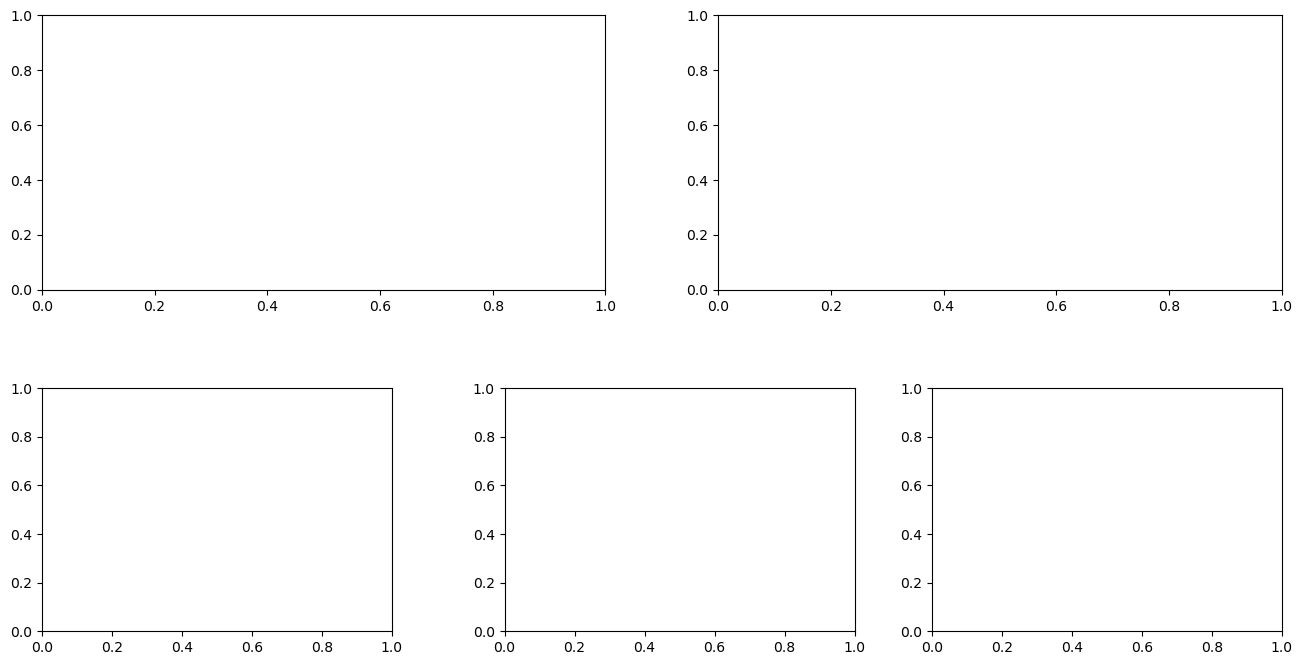

In [20]:
###This works for TST across time + Sleep duration box plots, above trying to limit lines to 1 errorbar each
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# Larger subplot spanning multiple columns and rows
top_left = plt.subplot2grid(shape=(20, 35), loc=(0, 0), colspan=16, rowspan=9)

top_right = plt.subplot2grid(shape=(20, 35), loc=(0, 19), colspan=16, rowspan=9)

# First smaller subplot below the larger subplot
left_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 0), colspan=10, rowspan=9)

# Second smaller subplot below the larger subplot, shifted to the right
middle_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 13), colspan=10, rowspan=9)


# third smaller subplot below the larger subplot, shifted to the right
right_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 25), colspan=10, rowspan=9)

######### Customize plots below

# plt.tight_layout()
plt.show()


## Figure 1 Code

* Figure 1- Performance and POMS scores for CON, AD, OR groups



In [21]:
lab_df= pd.read_excel('df_Imputed lab data (good) 3.8.24.xlsx')

lab_df.columns= lab_df.columns.str.lower()

lab_df.head()

subject gender  age train_cat ot_status     visit     phase  \
0  ORE_25      F   21       Exp        AD  Baseline  Baseline   
1  ORE_25      F   21       Exp        AD    Week 2  Training   
2  ORE_25      F   21       Exp        AD    Week 3  Training   
3  ORE_25      F   21       Exp        AD  post-48H  Training   
4  ORE_25      F   21       Exp        AD    post-7  Recovery   

   predicted_vo2_bl  vo2rel  pcn_predicted_vo2  ...    kcal_kg    cho_kg  \
0             34.81   33.13          95.173801  ...  31.231933  3.914531   
1               NaN   33.74                NaN  ...  16.252507  1.173996   
2               NaN   36.28                NaN  ...  14.558438  0.805463   
3               NaN   36.40                NaN  ...  17.610155  1.149552   
4               NaN   37.25                NaN  ...  12.050556  1.213637   

     pro_kg  poms_tension  poms_depression  poms_vigor  poms_confusion  \
0  1.035845             6                1          16               5   
1  1.149538             3                1          14               2   
2  1.622947             2                1           6               3   
3  0.966113             1                0          14               2   
4  0.551653             1                0          14               2   

   poms_anger  poms_fatigue  poms_total  
0           5             6           7  
1           2             3          -3  
2           1            10          11  
3           1             7          -3  
4           1             7          -3  

[5 rows x 94 columns]

In [22]:
lab_df['ot_status'] = lab_df['ot_status'].replace({'Con':'Control', 'AD':'Adapted', 'OR':'Overreached'})
lab_df['ot_status'].unique()

array(['Adapted', 'Overreached', 'Control'], dtype=object)

In [23]:
lab_df['visit']=pd.Categorical(lab_df['visit'], categories=['Baseline', 'Week 2', 'Week 3', 'post-48H', 'post-7', 'post-14', 'post-21'], ordered=True)

#call list for x ticks
visit_list=lab_df['visit'].unique()

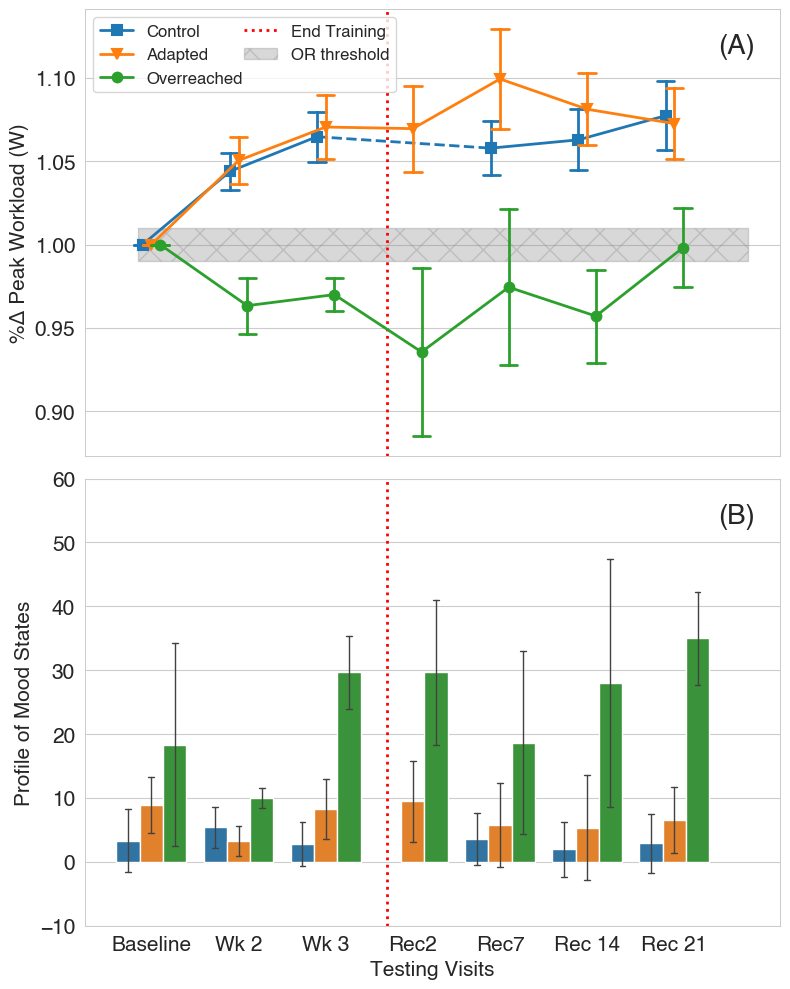

In [24]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "Helvetica",
    "font.size": 10,              # within 8–12 pt range
    "axes.linewidth": 0.75,       # match line width spec
    "lines.linewidth": 0.75
})

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Helvetica"

order=['Control', 'Adapted', 'Overreached']

fig, ax=plt.subplots(2,1, sharex=True,figsize=(8,10))

ax1=sns.pointplot(data=lab_df, x='visit', y='pcn_pwl', hue='ot_status', hue_order=order, markers=['s', 'v', 'o'], 
                  markersize=7, errorbar='se', dodge=0.2, capsize=.2, lw=2,ax=ax[0], zorder=10)
ax2=sns.barplot(data=lab_df, x='visit', y='poms_total', hue='ot_status',hue_order=order,
                errorbar='se', capsize=0.2, ax=ax[1], err_kws={'lw':1})

ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

#create y ticks for ax1
ticks = np.arange(0.70, 1.16, 0.05)

ax1.set_ylabel('%Δ Peak Workload (W)', fontsize=15)
ax2.set_ylabel('Profile of Mood States', fontsize=15)
####################Control data points between week 3 and post-7  Plot 1: Pcn_PWL
x_values = [1.9, 3.9]
y_values = [1.0647, 1.0578]
# Plot the two points
ax1.scatter(x_values, y_values, color='C0', zorder=1)
# Connect the points with a dashed line to connect Con data
ax[0].plot(x_values, y_values, linestyle='--', color='C0', lw=2, zorder=1)

# ####################Control data points between week 3 and post-7  Plot 2: POMS
# x_values = [2, 3.9]
# y_values = [2.8, 3.6]
# # Plot the two points
# # ax2.scatter(x_values, y_values, color='C0', zorder=1)
# # Connect the points with a dashed line to connect Con data
# ax[1].plot(x_values, y_values, linestyle='--', color='C0', lw=2, zorder=1)

# ax[0].set_yticks(ticks=np.arange(0.85,1.16, 0.05), labels=[' ','',  '-5%', '0', '5%', '10%', '15%'])
ax[1].set_xticks(ticks=np.arange(0,6.1,1), labels=visit_list)
# ax[1].set_yticks(ticks=np.arange(-10,40.1, 5))

# ax2.set_yticklabels([' ', ' ',  '-10', '-5 ', '0', '5', '10', '15', '20', '25', '30', '35', '40'])
ax1.axvline(x=2.70, ymin=0, ymax=1, label='End Training', color='red', ls=':', lw=2)
ax2.axvline(x=2.70, ymin=0, ymax=1, label='End Training', color='red', ls=':', lw=2)

ax[0].fill_between(x=np.arange(-0.15,7,1), y1=1.01, y2= 0.99, color='grey', hatch="X", alpha=0.3,label='OR threshold',data=visuals_df)


sleep_xlabels=['Baseline', 'Wk 2', 'Wk 3', 'Rec2', 'Rec7', 'Rec 14', 'Rec 21']
ax[1].set_xticks(ticks=np.arange(0,6.1), labels=sleep_xlabels)

ax2.set_xlabel('Testing Visits', fontsize=15)

# ax2.axvline(x=2.70, ymin=0, ymax=1, label='End Training', color='red', ls='--')

ax1.legend(title=None, loc='upper left', ncol=2, fontsize=12, title_fontsize=12, columnspacing=0.05)
ax2.get_legend().remove()

# ax1.set_yticks(ticks=np.arange(0.85, 1.16, 0.05), labels=['-15%','-10%', '-5%', '0', '5%', '10%', '15%'])
ax2.set_yticks(np.arange(-10, 61,10))

# ax1.set_title('Exercise Performance', fontsize=20)
# ax2.set_title('Profile of Mood States', fontsize=20)

# ax1.set_title('(A)', fontsize=20, pad=10)
# ax2.set_title('(B)', fontsize=20, pad=10)

ax1.annotate('(A)', xy=(6, 1.12), xytext=(6.5,1.115), fontsize=20)
ax2.annotate('(B)', xy=(6, 53), xytext=(6.5,53), fontsize=20)

plt.tight_layout()
plt.show()

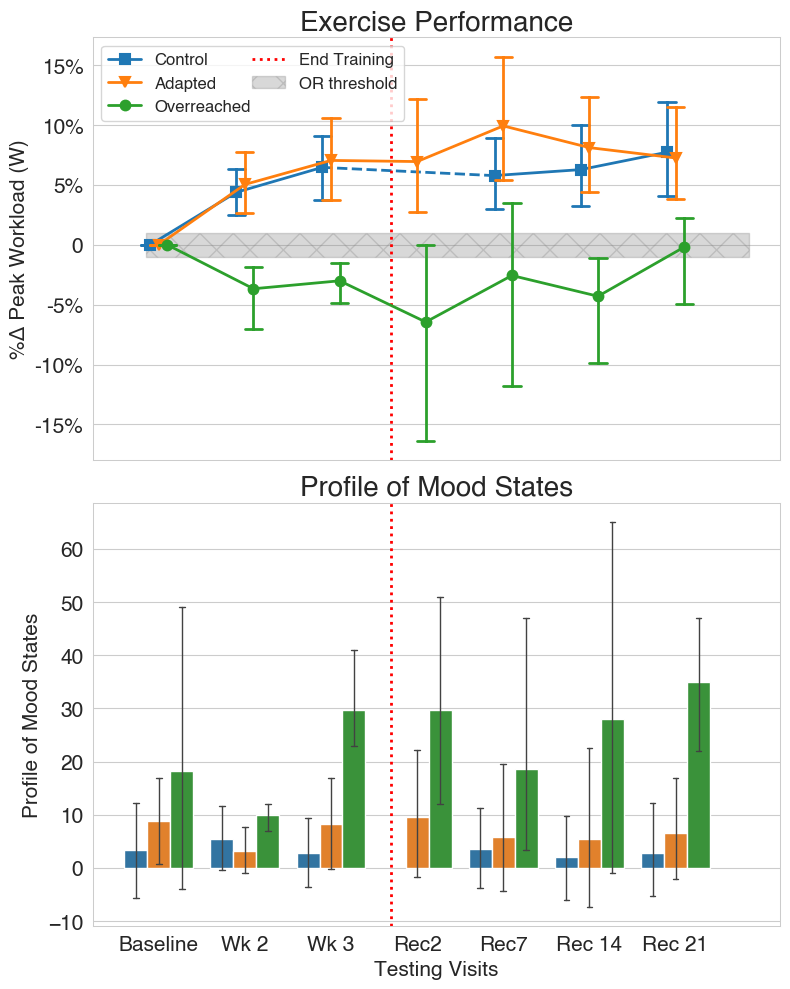

In [25]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "Helvetica",
    "font.size": 10,              # within 8–12 pt range
    "axes.linewidth": 0.75,       # match line width spec
    "lines.linewidth": 0.75
})

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Helvetica"

order=['Control', 'Adapted', 'Overreached']

fig, ax=plt.subplots(2,1, sharex=True,figsize=(8,10))

ax1=sns.pointplot(data=lab_df, x='visit', y='pcn_pwl', hue='ot_status', hue_order=order, markers=['s', 'v', 'o'], 
                  markersize=7, errorbar=('ci', 95), dodge=0.2, capsize=.2, lw=2,ax=ax[0], zorder=10)
ax2=sns.barplot(data=lab_df, x='visit', y='poms_total', hue='ot_status',hue_order=order,
                errorbar=('ci', 95), capsize=0.2, ax=ax[1], err_kws={'lw':1})

ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

#create y ticks for ax1
ticks = np.arange(0.70, 1.16, 0.05)

ax1.set_ylabel('%Δ Peak Workload (W)', fontsize=15)
ax2.set_ylabel('Profile of Mood States', fontsize=15)
####################Control data points between week 3 and post-7  Plot 1: Pcn_PWL
x_values = [1.9, 3.9]
y_values = [1.0647, 1.0578]
# Plot the two points
ax1.scatter(x_values, y_values, color='C0', zorder=1)
# Connect the points with a dashed line to connect Con data
ax[0].plot(x_values, y_values, linestyle='--', color='C0', lw=2, zorder=1)

# ####################Control data points between week 3 and post-7  Plot 2: POMS
# x_values = [2, 3.9]
# y_values = [2.8, 3.6]
# # Plot the two points
# # ax2.scatter(x_values, y_values, color='C0', zorder=1)
# # Connect the points with a dashed line to connect Con data
# ax[1].plot(x_values, y_values, linestyle='--', color='C0', lw=2, zorder=1)

# ax[0].set_yticks(ticks=np.arange(0.85,1.16, 0.05), labels=[' ','',  '-5%', '0', '5%', '10%', '15%'])
ax[1].set_xticks(ticks=np.arange(0,6.1,1), labels=visit_list)
ax[1].set_yticks(ticks=np.arange(-10,40.1, 5))

# ax2.set_yticklabels([' ', ' ',  '-10', '-5 ', '0', '5', '10', '15', '20', '25', '30', '35', '40'])
ax1.axvline(x=2.70, ymin=0, ymax=1, label='End Training', color='red', ls=':', lw=2)
ax2.axvline(x=2.70, ymin=0, ymax=1, label='End Training', color='red', ls=':', lw=2)

ax[0].fill_between(x=np.arange(-0.15,7,1), y1=1.01, y2= 0.99, color='grey', hatch="X", alpha=0.3,label='OR threshold',data=visuals_df)


sleep_xlabels=['Baseline', 'Wk 2', 'Wk 3', 'Rec2', 'Rec7', 'Rec 14', 'Rec 21']
ax[1].set_xticks(ticks=np.arange(0,6.1), labels=sleep_xlabels)

ax2.set_xlabel('Testing Visits', fontsize=15)

# ax2.axvline(x=2.70, ymin=0, ymax=1, label='End Training', color='red', ls='--')

ax1.legend(title=None, loc='upper left', ncol=2, fontsize=12, title_fontsize=12, columnspacing=0.05)
ax2.get_legend().remove()

ax1.set_yticks(ticks=np.arange(0.85, 1.16, 0.05), labels=['-15%','-10%', '-5%', '0', '5%', '10%', '15%'])
ax2.set_yticks(np.arange(-10, 61,10))

ax1.set_title('Exercise Performance', fontsize=20)
ax2.set_title('Profile of Mood States', fontsize=20)



plt.tight_layout()
plt.show()

## Figure 2 Code

* Figure 2- sleep onset and offset for CON, AD, and OR groups


## Figure 3 Code


* Figure 3- Sleep duration and sleep debt (could be two figures)


In [26]:
visuals_df['sleep_debt'] = visuals_df['tst_24'] - 420
visuals_df['cum_sleep_debt'] = visuals_df.groupby(['subject'], observed=False)['sleep_debt'].cumsum()

visuals_df['cum_sleep_debt_h'] = visuals_df['cum_sleep_debt']/60
visuals_df['cum_sleep_debt_h'].head()

0    1.983333
1    2.583333
2    3.283333
3    3.466667
4    2.816667
Name: cum_sleep_debt_h, dtype: float64

In [27]:
visuals_df_grouped= visuals_df.groupby(['day_of_participation', 'ot_status'], observed=False, as_index=False)['cum_sleep_debt_h'].describe()
visuals_df_grouped['iqr'] = visuals_df_grouped['75%'] - visuals_df_grouped['25%']
visuals_df_grouped['lower'] = visuals_df_grouped['50%'] - (visuals_df_grouped['iqr']/2)
visuals_df_grouped['upper'] = visuals_df_grouped['50%'] + (visuals_df_grouped['iqr']/2)

CON_visuals_df_grouped = visuals_df_grouped[visuals_df_grouped['ot_status']=='Control'].copy()
AD_visuals_df_grouped = visuals_df_grouped[visuals_df_grouped['ot_status']=='Adapted'].copy()
OR_visuals_df_grouped = visuals_df_grouped[visuals_df_grouped['ot_status']=='Overreached'].copy()


OR_visuals_df_grouped.head()

day_of_participation    ot_status  count      mean       std       min  \
2                      2  Overreached    3.0  0.227778  0.683604 -0.550000   
5                      3  Overreached    3.0  0.738889  2.110643 -1.683333   
8                      4  Overreached    3.0  0.755556  2.315067 -1.866667   
11                     5  Overreached    3.0 -0.138889  4.318061 -5.066667   
14                     6  Overreached    3.0 -0.577778  5.693669 -7.116667   

         25%       50%       75%       max       iqr     lower     upper  
2  -0.025000  0.500000  0.616667  0.733333  0.641667  0.179167  0.820833  
5   0.016667  1.716667  1.950000  2.183333  1.933333  0.750000  2.683333  
8  -0.125000  1.616667  2.066667  2.516667  2.191667  0.520833  2.712500  
11 -1.700000  1.666667  2.325000  2.983333  4.025000 -0.345833  3.679167  
14 -2.508333  2.100000  2.691667  3.283333  5.200000 -0.500000  4.700000

In [28]:
tst_df_grouped= visuals_df.groupby(['day_of_participation', 'ot_status'], observed=False, as_index=False)['tst_24_h'].describe()
tst_df_grouped['iqr'] = tst_df_grouped['75%'] - tst_df_grouped['25%']
tst_df_grouped['lower'] = tst_df_grouped['50%'] - (tst_df_grouped['iqr']/2)
tst_df_grouped['upper'] = tst_df_grouped['50%'] + (tst_df_grouped['iqr']/2)

CON_tst_df_grouped = tst_df_grouped[tst_df_grouped['ot_status']=='Control'].copy()
AD_tst_df_grouped = tst_df_grouped[tst_df_grouped['ot_status']=='Adapted'].copy()
OR_tst_df_grouped = tst_df_grouped[tst_df_grouped['ot_status']=='Overreached'].copy()


OR_tst_df_grouped.head()

day_of_participation    ot_status  count      mean       std       min  \
2                      2  Overreached    3.0  7.227778  0.683604  6.450000   
5                      3  Overreached    3.0  7.511111  1.428901  5.866667   
8                      4  Overreached    3.0  7.016667  0.704943  6.433333   
11                     5  Overreached    3.0  6.105556  2.283658  3.800000   
14                     6  Overreached    3.0  6.561111  1.396855  4.950000   

         25%       50%       75%       max       iqr     lower     upper  
2   6.975000  7.500000  7.616667  7.733333  0.641667  7.179167  7.820833  
5   7.041667  8.216667  8.333333  8.450000  1.291667  7.570833  8.862500  
8   6.625000  6.816667  7.308333  7.800000  0.683333  6.475000  7.158333  
11  4.975000  6.150000  7.258333  8.366667  2.283333  5.008333  7.291667  
14  6.125000  7.300000  7.366667  7.433333  1.241667  6.679167  7.920833

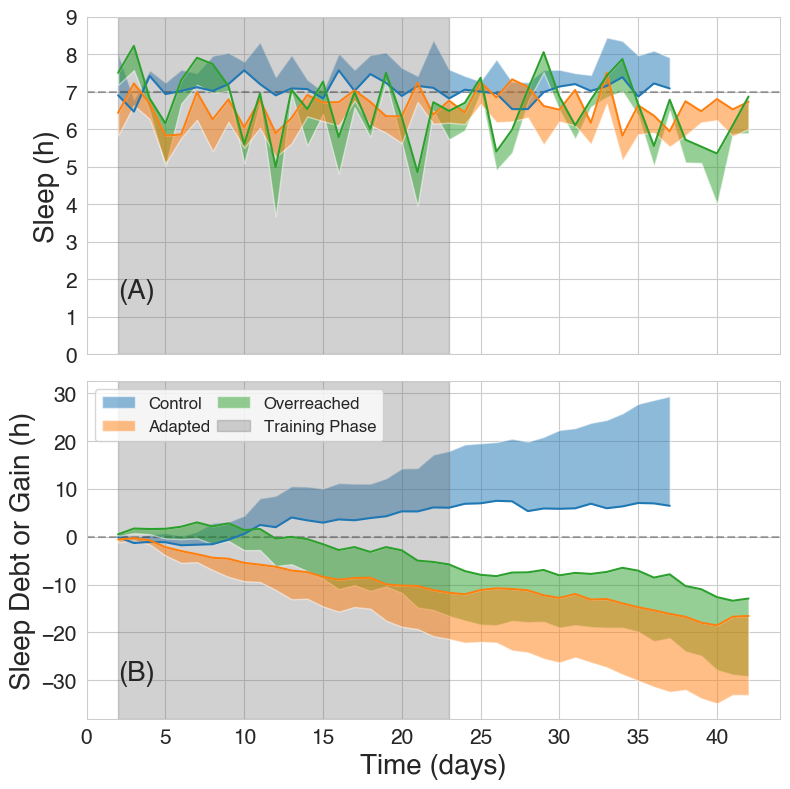

In [29]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "Helvetica",
    "font.size": 10,              # within 8–12 pt range
    "axes.linewidth": 0.75,       # match line width spec
    "lines.linewidth": 0.75
})

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Helvetica"

fig, ax= plt.subplots(2,1, sharex=True, figsize=(8,8))
########################### Plot 1 ######################################################
ax1= sns.lineplot(data=tst_df_grouped, x='day_of_participation', y='50%', hue='ot_status', ax=ax[0], lw=1.5,
                  legend=False, zorder=11)
ax[0].fill_between(data=CON_tst_df_grouped, x='day_of_participation', y1=CON_tst_df_grouped['upper'],
                 y2=CON_tst_df_grouped['50%'], alpha=0.5, label='Control')
## AD data
ax[0].fill_between(data=AD_tst_df_grouped, x='day_of_participation', y1=AD_tst_df_grouped['lower'],
                 y2=AD_tst_df_grouped['50%'], alpha=0.5, label='Adapted', zorder=10) # hatch='..'

## OR data
ax[0].fill_between(data=OR_tst_df_grouped, x='day_of_participation', y1=OR_tst_df_grouped['lower'],
                 y2=OR_tst_df_grouped['50%'], alpha=0.5, label='Overreached', zorder=9) #hatch='//'
########################### Plot 2 ######################################################
ax2= sns.lineplot(data=visuals_df_grouped, x='day_of_participation', y='50%', hue='ot_status', ax=ax[1], lw=1.5,
                  legend=False,zorder=11)
# ## CON data
plt.fill_between(data=CON_visuals_df_grouped, x='day_of_participation', y1=CON_visuals_df_grouped['50%'],
                 y2=CON_visuals_df_grouped['upper'], alpha=0.5, label='Control')
## AD data
plt.fill_between(data=AD_visuals_df_grouped, x='day_of_participation', y1=AD_visuals_df_grouped['50%'],
                 y2=AD_visuals_df_grouped['lower'], alpha=0.5, label='Adapted', zorder=10) # hatch='..'
## OR data
plt.fill_between(data=OR_visuals_df_grouped, x='day_of_participation', y1=OR_visuals_df_grouped['50%'],
                 y2=OR_visuals_df_grouped['lower'], alpha=0.5, label='Overreached', zorder=9)  # hatch='//'
########################### Formatting ######################################################
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

ax1.set_ylabel('Sleep (h)', fontsize=20)
ax2.set_ylabel('Sleep Debt or Gain (h)', fontsize=20)

ax1.set_yticks(np.arange(0,9.1, 1))
ax2.set_yticks(np.arange(-30, 31, 10))

ax2.set_xlabel('Time (days)', fontsize=20)

# ax1.set_title('(A) Total Sleep Time', fontsize=17)
# ax2.set_title('(B) Sleep Debt', fontsize=17)

ax1.axhline(y=7, xmin=0, xmax=1, ls='--', lw=1.5, color='black', alpha=0.3)
ax2.axhline(y=0, xmin=0, xmax=1, ls='--', lw=1.5, color='black', alpha=0.3)

ax1.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.3, label='Training Phase')
ax2.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.3, label='Training Phase')

# ax1.legend(title='Group', loc='lower center', ncol=2)
ax2.legend(loc='upper left', ncol=2, fontsize=12, title_fontsize=12, columnspacing=0.4)
plt.tight_layout()



# Save as high-resolution EPS
# plt.savefig("TST and Sleep debt.eps",     ### Python doesn't support TIFF files apparently
#             format='eps',
#             dpi=1200,
#             bbox_inches='tight',
#             pil_kwargs={"compression": "tiff_lzw"})


ax1.annotate('(A)', xy=(40, 1.12), xytext=(2,1.5), fontsize=20)
ax2.annotate('(B)', xy=(40, 25), xytext=(2,-30), fontsize=20)

plt.savefig('TST and sleep debt.png')  ### call before plt.show()
plt.show()

## Figure 4 Code

* Figure 4- Sleepiness and Fatigue (2x3 plot) for CON, AD, OR groups



In [30]:
####################### generate sleepiness_sleep dfs #######################
sleepiness_sleep_df_grouped= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['sleepiness_sleep_1'].describe()
sleepiness_sleep_df_grouped['iqr'] = sleepiness_sleep_df_grouped['75%'] - sleepiness_sleep_df_grouped['25%']
sleepiness_sleep_df_grouped['upper'] = sleepiness_sleep_df_grouped['50%'] + (sleepiness_sleep_df_grouped['iqr']/2)
sleepiness_sleep_df_grouped['lower'] = sleepiness_sleep_df_grouped['50%'] - (sleepiness_sleep_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_sleepiness_sleep_df_grouped = sleepiness_sleep_df_grouped[sleepiness_sleep_df_grouped['ot_status']=='Control'].copy()
AD_sleepiness_sleep_df_grouped = sleepiness_sleep_df_grouped[sleepiness_sleep_df_grouped['ot_status']=='Adapted'].copy()
OR_sleepiness_sleep_df_grouped = sleepiness_sleep_df_grouped[sleepiness_sleep_df_grouped['ot_status']=='Overreached'].copy()
####################### generate sleepiness_wake dfs #######################
sleepiness_wake_df_grouped= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['sleepiness_wake_1'].describe()
sleepiness_wake_df_grouped['iqr'] = sleepiness_wake_df_grouped['75%'] - sleepiness_wake_df_grouped['25%']
sleepiness_wake_df_grouped['upper'] = sleepiness_wake_df_grouped['50%'] + (sleepiness_wake_df_grouped['iqr']/2)
sleepiness_wake_df_grouped['lower'] = sleepiness_wake_df_grouped['50%'] - (sleepiness_wake_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_sleepiness_wake_df_grouped = sleepiness_wake_df_grouped[sleepiness_wake_df_grouped['ot_status']=='Control'].copy()
AD_sleepiness_wake_df_grouped = sleepiness_wake_df_grouped[sleepiness_wake_df_grouped['ot_status']=='Adapted'].copy()
OR_sleepiness_wake_df_grouped = sleepiness_wake_df_grouped[sleepiness_wake_df_grouped['ot_status']=='Overreached'].copy()
####################### generate fatigue_sleep dfs #######################
fatigue_sleep_df_grouped= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['fatigue_sleep_1'].describe()
fatigue_sleep_df_grouped['iqr'] = fatigue_sleep_df_grouped['75%'] - fatigue_sleep_df_grouped['25%']
fatigue_sleep_df_grouped['upper'] = fatigue_sleep_df_grouped['50%'] + (fatigue_sleep_df_grouped['iqr']/2)
fatigue_sleep_df_grouped['lower'] = fatigue_sleep_df_grouped['50%'] - (fatigue_sleep_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_fatigue_sleep_df_grouped = fatigue_sleep_df_grouped[fatigue_sleep_df_grouped['ot_status']=='Control'].copy()
AD_fatigue_sleep_df_grouped = fatigue_sleep_df_grouped[fatigue_sleep_df_grouped['ot_status']=='Adapted'].copy()
OR_fatigue_sleep_df_grouped = fatigue_sleep_df_grouped[fatigue_sleep_df_grouped['ot_status']=='Overreached'].copy()
####################### generate fatigue_wake dfs #######################
fatigue_wake_df_grouped= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['fatigue_wake_1'].describe()
fatigue_wake_df_grouped['iqr'] = fatigue_wake_df_grouped['75%'] - fatigue_wake_df_grouped['25%']
fatigue_wake_df_grouped['upper'] = fatigue_wake_df_grouped['50%'] + (fatigue_wake_df_grouped['iqr']/2)
fatigue_wake_df_grouped['lower'] = fatigue_wake_df_grouped['50%'] - (fatigue_wake_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_fatigue_wake_df_grouped = fatigue_wake_df_grouped[fatigue_wake_df_grouped['ot_status']=='Control'].copy()
AD_fatigue_wake_df_grouped = fatigue_wake_df_grouped[fatigue_wake_df_grouped['ot_status']=='Adapted'].copy()
OR_fatigue_wake_df_grouped = fatigue_wake_df_grouped[fatigue_wake_df_grouped['ot_status']=='Overreached'].copy()

### Good to go!

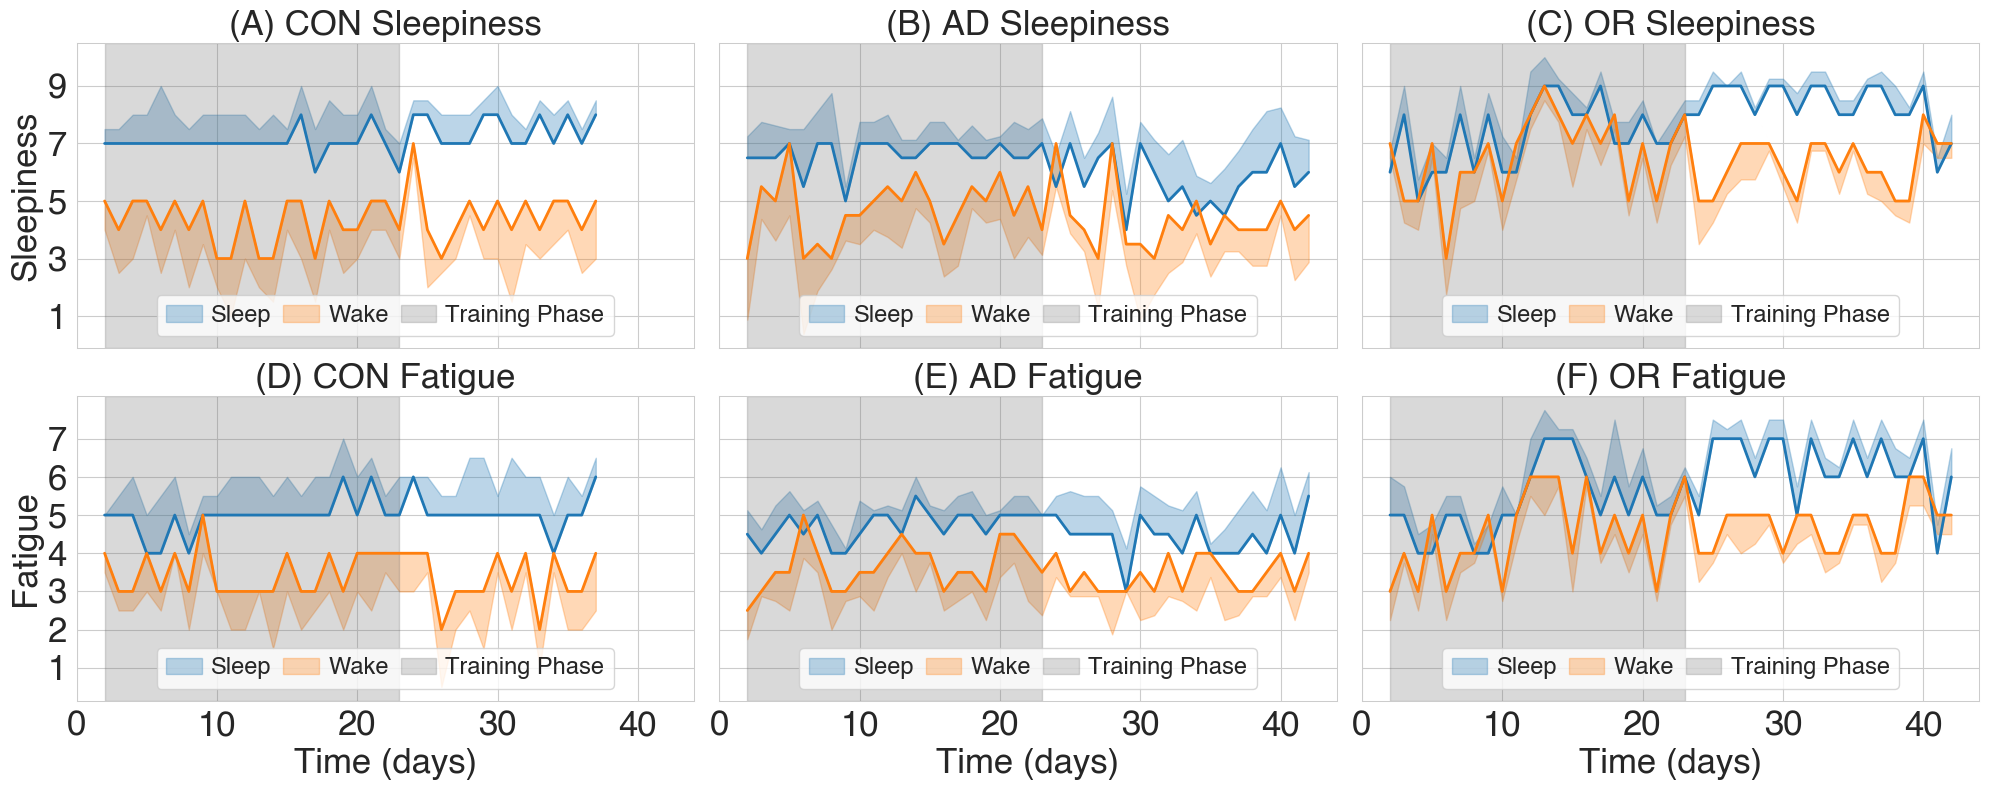

In [31]:
sns.set_style("whitegrid")
# plt.rcParams.update({
#     "font.family": "Helvetica",
#     # "font.size": 10,              # within 8–12 pt range
#     # "axes.linewidth": 0.75,       # match line width spec
#     # "lines.linewidth": 0.75
# })
plt.rcParams["font.family"] = "Helvetica"
palette= sns.color_palette()
fig, ax = plt.subplots(2, 3, sharex=True, sharey='row',figsize=(20, 8))
############################## CON sleepiness data ##############################
ax1= sns.lineplot(data=CON_sleepiness_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,0], color=palette[0])
ax2= sns.lineplot(data=CON_sleepiness_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,0], color=palette[1])

ax[0,0].fill_between(data=CON_sleepiness_sleep_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Sleep')
ax[0,0].fill_between(data=CON_sleepiness_wake_df_grouped, x='day_of_participation', y1='lower', y2='50%', alpha=0.3, color=palette[1],label='Wake')
############################## AD sleepiness data ##############################
ax3= sns.lineplot(data=AD_sleepiness_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,1], color=palette[0])
ax4= sns.lineplot(data=AD_sleepiness_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,1], color=palette[1])

ax[0,1].fill_between(data=AD_sleepiness_sleep_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0],label='Sleep')
ax[0,1].fill_between(data=AD_sleepiness_wake_df_grouped, x='day_of_participation', y1='lower', y2='50%', alpha=0.3, color=palette[1],label='Wake')
############################## OR sleepiness data ##############################
ax5= sns.lineplot(data=OR_sleepiness_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,2], color=palette[0])
ax6= sns.lineplot(data=OR_sleepiness_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,2], color=palette[1])

ax[0,2].fill_between(data=OR_sleepiness_sleep_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0],label='Sleep')
ax[0,2].fill_between(data=OR_sleepiness_wake_df_grouped, x='day_of_participation', y1='lower', y2='50%', alpha=0.3, color=palette[1],label='Wake')
########################################################################################################################
############################## CON Fatigue data ##############################
ax7= sns.lineplot(data=CON_fatigue_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,0], color=palette[0])
ax8= sns.lineplot(data=CON_fatigue_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,0], color=palette[1])

ax[1,0].fill_between(data=CON_fatigue_sleep_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0],label='Sleep')
ax[1,0].fill_between(data=CON_fatigue_wake_df_grouped, x='day_of_participation', y1='lower', y2='50%', alpha=0.3, color=palette[1],label='Wake')
############################## AD Fatigue data ##############################
ax9= sns.lineplot(data=AD_fatigue_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,1], color=palette[0])
ax10= sns.lineplot(data=AD_fatigue_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,1], color=palette[1])

ax[1,1].fill_between(data=AD_fatigue_sleep_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Sleep')
ax[1,1].fill_between(data=AD_fatigue_wake_df_grouped, x='day_of_participation', y1='lower', y2='50%', alpha=0.3, color=palette[1],label='Wake')
############################## OR Fatigue data ##############################
ax11= sns.lineplot(data=OR_fatigue_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,2], color=palette[0])
ax12= sns.lineplot(data=OR_fatigue_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,2], color=palette[1])

ax[1,2].fill_between(data=OR_fatigue_sleep_df_grouped, x='day_of_participation',y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Sleep')
ax[1,2].fill_between(data=OR_fatigue_wake_df_grouped, x='day_of_participation', y1='lower', y2='50%', alpha=0.3, color=palette[1], label='Wake')
############################## Parameters ##############################
ax1.set_yticks(np.arange(1,9.1,2))
ax7.set_yticks(np.arange(1,7.1,1))

# ax7.set_xticks(np.arange(0,46,7))
# ax9.set_xticks(np.arange(0,46,7))
# ax11.set_xticks(np.arange(0,46,7))

ax1.tick_params(axis='both', labelsize=25)
ax3.tick_params(axis='both', labelsize=25)
ax5.tick_params(axis='both', labelsize=25)
ax7.tick_params(axis='both', labelsize=25)
ax9.tick_params(axis='both', labelsize=25)
ax11.tick_params(axis='both', labelsize=25)

ax1.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax4.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax5.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax7.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax9.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax11.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')

ax1.set_title('(A) CON Sleepiness', fontsize=25)
ax3.set_title('(B) AD Sleepiness', fontsize=25)
ax5.set_title('(C) OR Sleepiness', fontsize=25)
ax7.set_title('(D) CON Fatigue', fontsize=25)
ax9.set_title('(E) AD Fatigue', fontsize=25)
ax11.set_title('(F) OR Fatigue', fontsize=25)

ax1.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
ax3.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
ax5.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
ax7.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
ax9.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
ax11.legend(fontsize='17', ncol=3,loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)


ax7.set_xlabel('Time (days)', fontsize=25)
ax9.set_xlabel('Time (days)', fontsize=25)
ax11.set_xlabel('Time (days)', fontsize=25)
ax1.set_ylabel('Sleepiness', fontsize=25)
ax7.set_ylabel('Fatigue', fontsize=25)


plt.tight_layout()
plt.show()

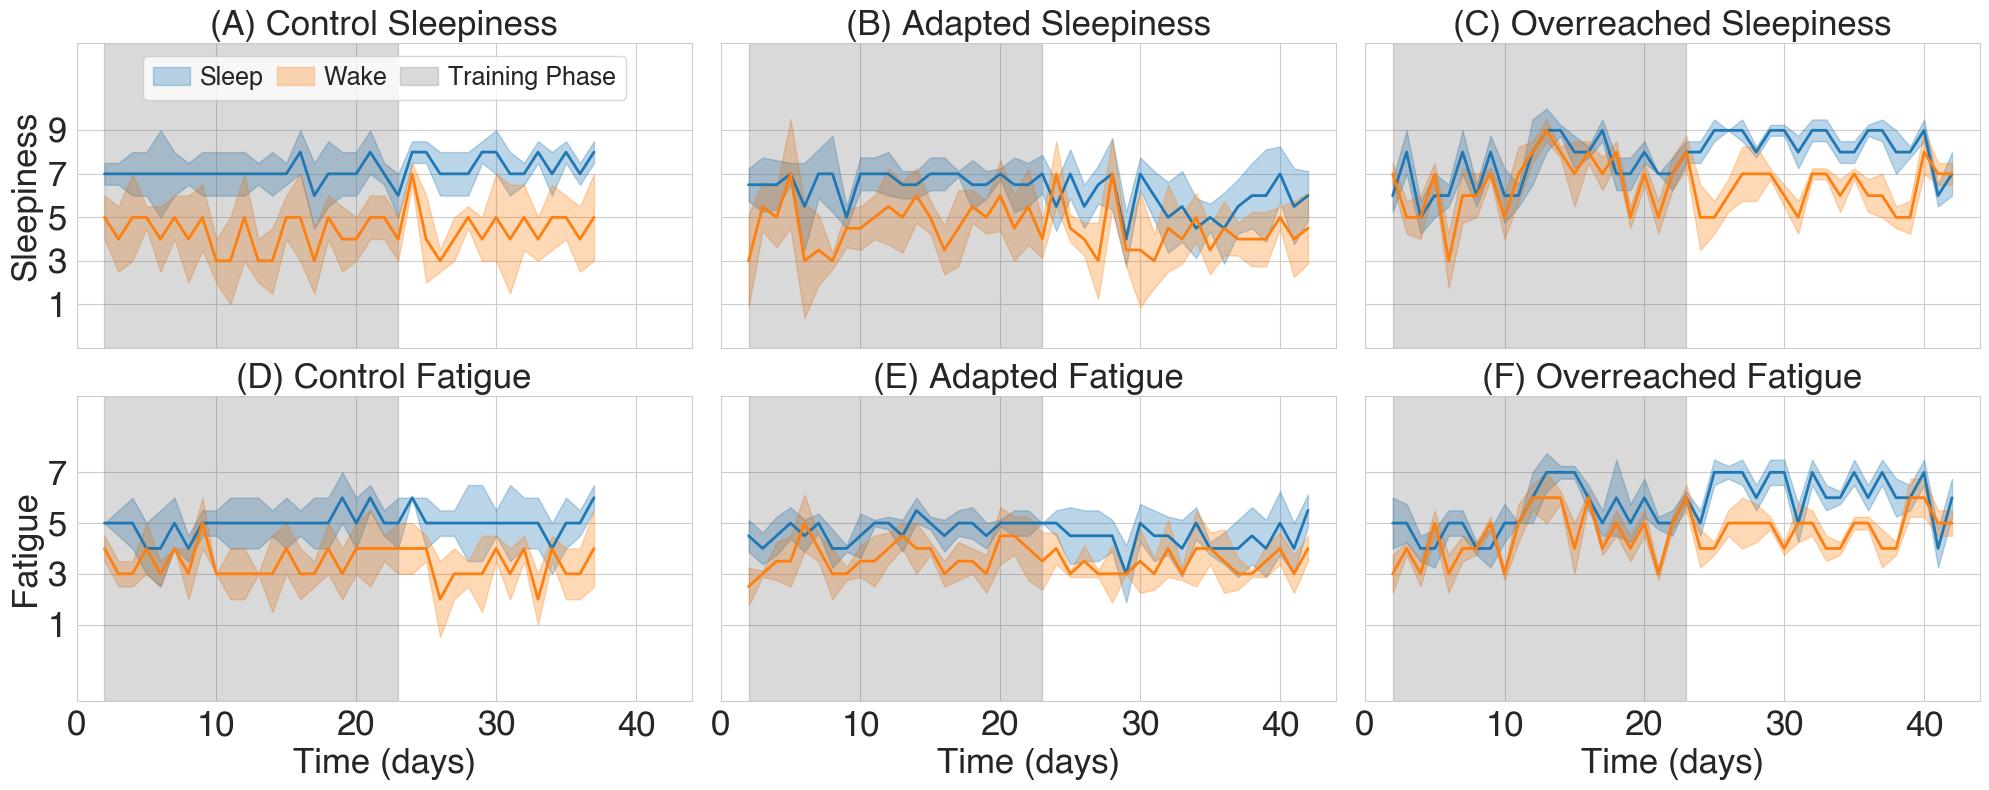

In [32]:
sns.set_style("whitegrid")
# plt.rcParams.update({
#     "font.family": "Helvetica",
#     # "font.size": 10,              # within 8–12 pt range
#     # "axes.linewidth": 0.75,       # match line width spec
#     # "lines.linewidth": 0.75
# })
plt.rcParams["font.family"] = "Helvetica"
palette= sns.color_palette()
fig, ax = plt.subplots(2, 3, sharex=True, sharey='row',figsize=(20, 8))
############################## CON sleepiness data ##############################
ax1= sns.lineplot(data=CON_sleepiness_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,0], color=palette[0])
ax2= sns.lineplot(data=CON_sleepiness_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,0], color=palette[1])

ax[0,0].fill_between(data=CON_sleepiness_sleep_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[0], label='Sleep')
ax[0,0].fill_between(data=CON_sleepiness_wake_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[1],label='Wake')
############################## AD sleepiness data ##############################
ax3= sns.lineplot(data=AD_sleepiness_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,1], color=palette[0])
ax4= sns.lineplot(data=AD_sleepiness_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,1], color=palette[1])

ax[0,1].fill_between(data=AD_sleepiness_sleep_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[0],label='Sleep')
ax[0,1].fill_between(data=AD_sleepiness_wake_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[1],label='Wake')
############################## OR sleepiness data ##############################
ax5= sns.lineplot(data=OR_sleepiness_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,2], color=palette[0])
ax6= sns.lineplot(data=OR_sleepiness_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[0,2], color=palette[1])

ax[0,2].fill_between(data=OR_sleepiness_sleep_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[0],label='Sleep')
ax[0,2].fill_between(data=OR_sleepiness_wake_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[1],label='Wake')
########################################################################################################################
############################## CON Fatigue data ##############################
ax7= sns.lineplot(data=CON_fatigue_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,0], color=palette[0])
ax8= sns.lineplot(data=CON_fatigue_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,0], color=palette[1])

ax[1,0].fill_between(data=CON_fatigue_sleep_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[0],label='Sleep')
ax[1,0].fill_between(data=CON_fatigue_wake_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[1],label='Wake')
############################## AD Fatigue data ##############################
ax9= sns.lineplot(data=AD_fatigue_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,1], color=palette[0])
ax10= sns.lineplot(data=AD_fatigue_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,1], color=palette[1])

ax[1,1].fill_between(data=AD_fatigue_sleep_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[0], label='Sleep')
ax[1,1].fill_between(data=AD_fatigue_wake_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[1],label='Wake')
############################## OR Fatigue data ##############################
ax11= sns.lineplot(data=OR_fatigue_sleep_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,2], color=palette[0])
ax12= sns.lineplot(data=OR_fatigue_wake_df_grouped, x='day_of_participation', y='50%',lw=2, ax=ax[1,2], color=palette[1])

ax[1,2].fill_between(data=OR_fatigue_sleep_df_grouped, x='day_of_participation',y1='lower', y2='upper', alpha=0.3, color=palette[0], label='Sleep')
ax[1,2].fill_between(data=OR_fatigue_wake_df_grouped, x='day_of_participation', y1='lower', y2='upper', alpha=0.3, color=palette[1], label='Wake')
############################## Parameters ##############################
# ax1.set_yticks(np.arange(1,12,2))
ax1.set_yticks(np.arange(1, 9.1, 2))  # You can go higher here if you like

# Set y-axis limits to increase the vertical range
ax1.set_ylim(-1, 13)  # This creates space above your values for annotations

# # Optional: add annotation
# ax1.annotate('Note', xy=(5, 9.2), xytext=(5, 11),
#              arrowprops=dict(facecolor='black', shrink=0.05))
ax7.set_yticks(np.arange(1,7.1,2))
ax7.set_ylim(-2, 10) 
# ax7.set_xticks(np.arange(0,46,7))
# ax9.set_xticks(np.arange(0,46,7))
# ax11.set_xticks(np.arange(0,46,7))

ax1.tick_params(axis='both', labelsize=25)
ax3.tick_params(axis='both', labelsize=25)
ax5.tick_params(axis='both', labelsize=25)
ax7.tick_params(axis='both', labelsize=25)
ax9.tick_params(axis='both', labelsize=25)
ax11.tick_params(axis='both', labelsize=25)

ax1.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax4.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax5.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax7.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax9.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
ax11.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')

ax1.set_title('(A) Control Sleepiness', fontsize=25)
ax3.set_title('(B) Adapted Sleepiness', fontsize=25)
ax5.set_title('(C) Overreached Sleepiness', fontsize=25)
ax7.set_title('(D) Control Fatigue', fontsize=25)
ax9.set_title('(E) Adapted Fatigue', fontsize=25)
ax11.set_title('(F) Overreached Fatigue', fontsize=25)

ax1.legend(fontsize='18', ncol=3, loc='upper center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
# ax3.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
# ax5.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
# ax7.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
# ax9.legend(fontsize='17', ncol=3, loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
# ax11.legend(fontsize='17', ncol=3,loc='lower center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)


ax7.set_xlabel('Time (days)', fontsize=25)
ax9.set_xlabel('Time (days)', fontsize=25)
ax11.set_xlabel('Time (days)', fontsize=25)
ax1.set_ylabel('Sleepiness', fontsize=25)
ax7.set_ylabel('Fatigue', fontsize=25)


plt.tight_layout()
plt.show()

## Figure 5 Code


* Figure 5- Sleep regularity?


In [33]:
####################### generate SRI_score dfs #######################
SRI_score_df_grouped= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['SRI_score'].describe()
SRI_score_df_grouped['iqr'] = SRI_score_df_grouped['75%'] - SRI_score_df_grouped['25%']
SRI_score_df_grouped['upper'] = SRI_score_df_grouped['50%'] + (SRI_score_df_grouped['iqr']/2)
SRI_score_df_grouped['lower'] = SRI_score_df_grouped['50%'] - (SRI_score_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_SRI_score_df_grouped = SRI_score_df_grouped[SRI_score_df_grouped['ot_status']=='Control'].copy()
AD_SRI_score_df_grouped = SRI_score_df_grouped[SRI_score_df_grouped['ot_status']=='Adapted'].copy()
OR_SRI_score_df_grouped = SRI_score_df_grouped[SRI_score_df_grouped['ot_status']=='Overreached'].copy()
# ####################### generate tst_av dfs #######################
tst_av_df_grouped = visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['tst_absolute_var'].describe()
tst_av_df_grouped['iqr'] = tst_av_df_grouped['75%'] - tst_av_df_grouped['25%']
tst_av_df_grouped['upper'] = tst_av_df_grouped['50%'] + (tst_av_df_grouped['iqr']/2)
tst_av_df_grouped['lower'] = tst_av_df_grouped['50%'] - (tst_av_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_tst_av_df_grouped = tst_av_df_grouped[tst_av_df_grouped['ot_status']=='Control'].copy()
AD_tst_av_df_grouped = tst_av_df_grouped[tst_av_df_grouped['ot_status']=='Adapted'].copy()
OR_tst_av_df_grouped = tst_av_df_grouped[tst_av_df_grouped['ot_status']=='Overreached'].copy()
# ####################### generate sleep_efficiency dfs #######################
sleepeff_av_df_grouped = visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['sleep_efficiency_absolute_var'].describe()
sleepeff_av_df_grouped['iqr'] = sleepeff_av_df_grouped['75%'] - sleepeff_av_df_grouped['25%']
sleepeff_av_df_grouped['upper'] = sleepeff_av_df_grouped['50%'] + (sleepeff_av_df_grouped['iqr']/2)
sleepeff_av_df_grouped['lower'] = sleepeff_av_df_grouped['50%'] - (sleepeff_av_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_sleepeff_av_df_grouped = sleepeff_av_df_grouped[sleepeff_av_df_grouped['ot_status']=='Control'].copy()
AD_sleepeff_av_df_grouped = sleepeff_av_df_grouped[sleepeff_av_df_grouped['ot_status']=='Adapted'].copy()
OR_sleepeff_av_df_grouped = sleepeff_av_df_grouped[sleepeff_av_df_grouped['ot_status']=='Overreached'].copy()
# ####################### generate sleep_onset dfs #######################
sleep_onset_av_df_grouped= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['sleep_onset_absolute_var'].describe()
sleep_onset_av_df_grouped['iqr'] = sleep_onset_av_df_grouped['75%'] - sleep_onset_av_df_grouped['25%']
sleep_onset_av_df_grouped['upper'] = sleep_onset_av_df_grouped['50%'] + (sleep_onset_av_df_grouped['iqr']/2)
sleep_onset_av_df_grouped['lower'] = sleep_onset_av_df_grouped['50%'] - (sleep_onset_av_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_sleep_onset_av_df_grouped = sleep_onset_av_df_grouped[sleep_onset_av_df_grouped['ot_status']=='Control'].copy()
AD_sleep_onset_av_df_grouped = sleep_onset_av_df_grouped[sleep_onset_av_df_grouped['ot_status']=='Adapted'].copy()
OR_sleep_onset_av_df_grouped = sleep_onset_av_df_grouped[sleep_onset_av_df_grouped['ot_status']=='Overreached'].copy()

# ####################### generate sleep_offset av #######################
sleep_offset_av_df_grouped= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['sleep_offset_absolute_var'].describe()
sleep_offset_av_df_grouped['iqr'] = sleep_offset_av_df_grouped['75%'] - sleep_offset_av_df_grouped['25%']
sleep_offset_av_df_grouped['upper'] = sleep_offset_av_df_grouped['50%'] + (sleep_offset_av_df_grouped['iqr']/2)
sleep_offset_av_df_grouped['lower'] = sleep_offset_av_df_grouped['50%'] - (sleep_offset_av_df_grouped['iqr']/2)
# Indiviudal group dfs
CON_sleep_offset_av_df_grouped = sleep_offset_av_df_grouped[sleep_offset_av_df_grouped['ot_status']=='Control'].copy()
AD_sleep_offset_av_df_grouped = sleep_offset_av_df_grouped[sleep_offset_av_df_grouped['ot_status']=='Adapted'].copy()
OR_sleep_offset_av_df_grouped = sleep_offset_av_df_grouped[sleep_offset_av_df_grouped['ot_status']=='Overreached'].copy()

# OR_sleep_offset_av_df_grouped.head()
# ### Good to go!

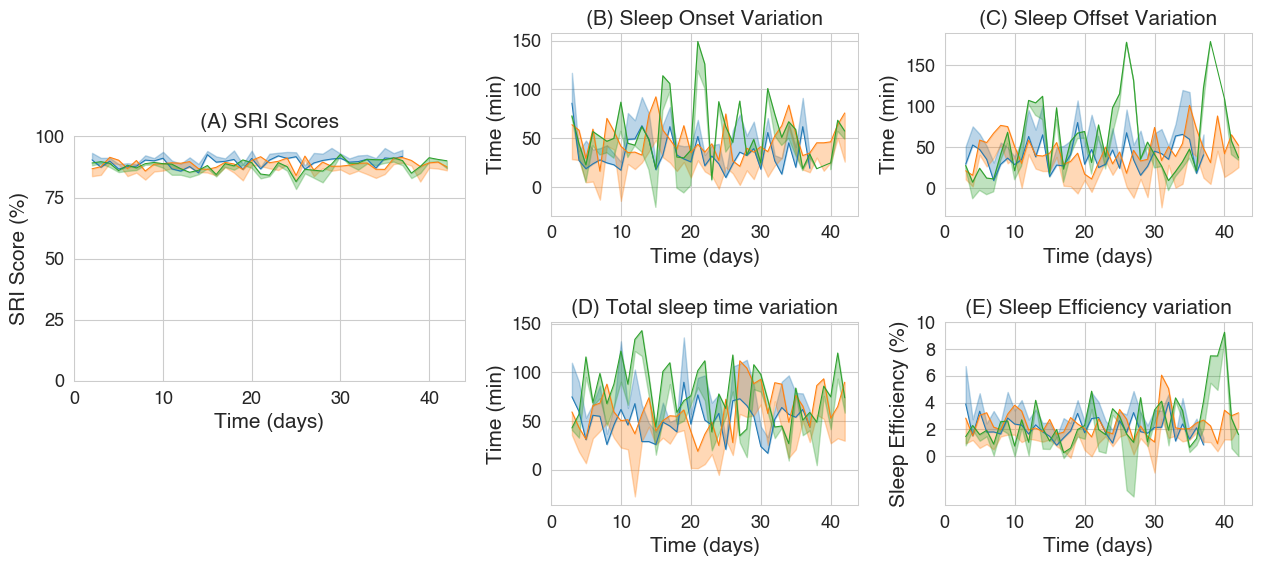

In [34]:
### Figure for all sleep regularity metrics
## figure layout
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# First smaller subplot below the larger subplot
main_plot = plt.subplot2grid(shape=(30, 60), loc=(5, 0), colspan=19, rowspan=12)
# Second smaller subplot below the larger subplot, shifted to the right
UL_plot = plt.subplot2grid(shape=(30, 60), loc=(0, 23), colspan=15, rowspan=9)
LL_plot = plt.subplot2grid(shape=(30, 60), loc=(14, 23), colspan=15, rowspan=9)
UR_plot = plt.subplot2grid(shape=(30, 60), loc=(0, 42), colspan=15, rowspan=9)
LR_plot= plt.subplot2grid(shape=(30, 60), loc=(14, 42), colspan=15, rowspan=9)

########################### SRI plots ###########################
ax1= sns.lineplot(data=CON_SRI_score_df_grouped, x='day_of_participation', y='50%', color=palette[0], errorbar=None, ax=main_plot)
ax1= sns.lineplot(data=AD_SRI_score_df_grouped, x='day_of_participation', y='50%', color=palette[1], errorbar=None, ax=main_plot)
ax1= sns.lineplot(data=OR_SRI_score_df_grouped, x='day_of_participation', y='50%', color=palette[2], errorbar=None, ax=main_plot)

main_plot.fill_between(data=CON_SRI_score_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Control')
main_plot.fill_between(data=AD_SRI_score_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[1], label='Adapted')
main_plot.fill_between(data=OR_SRI_score_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[2], label='Overreached')
########################### Sleep onset plots ###########################
ax2= sns.lineplot(data=CON_sleep_onset_av_df_grouped, x='day_of_participation', y='50%', color=palette[0], errorbar=None, ax=UL_plot)
ax2= sns.lineplot(data=AD_sleep_onset_av_df_grouped, x='day_of_participation', y='50%', color=palette[1], errorbar=None, ax=UL_plot)
ax2= sns.lineplot(data=OR_sleep_onset_av_df_grouped, x='day_of_participation', y='50%', color=palette[2], errorbar=None, ax=UL_plot)

UL_plot.fill_between(data=CON_sleep_onset_av_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Control')
UL_plot.fill_between(data=AD_sleep_onset_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[1], label='Adapted')
UL_plot.fill_between(data=OR_sleep_onset_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[2], label='Overreached')
########################### Sleep offset plots ###########################
ax3 = sns.lineplot(data=CON_sleep_offset_av_df_grouped, x='day_of_participation', y='50%', color=palette[0], errorbar=None, ax=UR_plot)
ax3 = sns.lineplot(data=AD_sleep_offset_av_df_grouped, x='day_of_participation', y='50%', color=palette[1], errorbar=None, ax=UR_plot)
ax3 = sns.lineplot(data=OR_sleep_offset_av_df_grouped, x='day_of_participation', y='50%', color=palette[2], errorbar=None, ax=UR_plot)

UR_plot.fill_between(data=CON_sleep_offset_av_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Control')
UR_plot.fill_between(data=AD_sleep_offset_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[1], label='Adapted')
UR_plot.fill_between(data=OR_sleep_offset_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[2], label='Overreached')

########################### tst_plots plots ###########################
ax4 = sns.lineplot(data= CON_tst_av_df_grouped, x='day_of_participation', y='50%', color=palette[0], errorbar=None, ax=LL_plot)
ax4 = sns.lineplot(data=AD_tst_av_df_grouped, x='day_of_participation', y='50%', color=palette[1], errorbar=None, ax=LL_plot)
ax4 = sns.lineplot(data=OR_tst_av_df_grouped, x='day_of_participation', y='50%', color=palette[2], errorbar=None, ax=LL_plot)

LL_plot.fill_between(data=CON_tst_av_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Control')
LL_plot.fill_between(data=AD_tst_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[1], label='Adapted')
LL_plot.fill_between(data=OR_tst_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[2], label='Overreached')

########################### sleep_efficiency_av plots ###########################
ax5 = sns.lineplot(data= CON_sleepeff_av_df_grouped, x='day_of_participation', y='50%', color=palette[0], errorbar=None, ax=LR_plot)
ax5 = sns.lineplot(data=AD_sleepeff_av_df_grouped, x='day_of_participation', y='50%', color=palette[1], errorbar=None, ax=LR_plot)
ax5 = sns.lineplot(data=OR_sleepeff_av_df_grouped, x='day_of_participation', y='50%', color=palette[2], errorbar=None, ax=LR_plot)

LR_plot.fill_between(data=CON_sleepeff_av_df_grouped, x='day_of_participation', y1='50%', y2='upper', alpha=0.3, color=palette[0], label='Control')
LR_plot.fill_between(data=AD_sleepeff_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[1], label='Adapted')
LR_plot.fill_between(data=OR_sleepeff_av_df_grouped, x='day_of_participation', y1='50%', y2='lower', alpha=0.3, color=palette[2], label='Overreached')

############### Plot settings below #############################################
ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax4.tick_params(axis='both', labelsize=13)
ax5.tick_params(axis='both', labelsize=13)

# ax1.set_xticks(testing_days, testing_labels)
# ax2.set_xticks(testing_days, testing_labels)
# ax3.set_xticks(testing_days, testing_labels)
# ax4.set_xticks(testing_days, testing_labels)
# ax5.set_xticks(testing_days, testing_labels)

ax1.set_xticks(np.arange(0,45,10))
ax2.set_xticks(np.arange(0,45,10))
ax3.set_xticks(np.arange(0,45,10))
ax4.set_xticks(np.arange(0,45,10))
ax5.set_xticks(np.arange(0,45,10))

ax1.set_yticks(np.arange(0,125,25))
# ax2.set_xticks(np.arange(0,45,10))
# ax3.set_xticks(np.arange(0,45,10))
# ax4.set_xticks(np.arange(0,45,10))
ax5.set_yticks(np.arange(0,11,2))

ax1.set_ylabel('SRI Score (%)', fontsize=15)
ax2.set_ylabel('Time (min)', fontsize=15)
ax3.set_ylabel('Time (min)', fontsize=15)
ax4.set_ylabel('Time (min)', fontsize=15)
ax5.set_ylabel('Sleep Efficiency (%)', fontsize=15)

ax1.set_xlabel('Time (days)', fontsize=15)
ax2.set_xlabel('Time (days)', fontsize=15)
ax3.set_xlabel('Time (days)', fontsize=15)
ax4.set_xlabel('Time (days)', fontsize=15)
ax5.set_xlabel('Time (days)', fontsize=15)

ax1.set_title('(A) SRI Scores', fontsize=15)
ax2.set_title('(B) Sleep Onset Variation', fontsize=15)
ax3.set_title('(C) Sleep Offset Variation', fontsize=15)
ax4.set_title('(D) Total sleep time variation', fontsize=15)
ax5.set_title('(E) Sleep Efficiency variation', fontsize=15)


# plt.tight_layout()
plt.show()


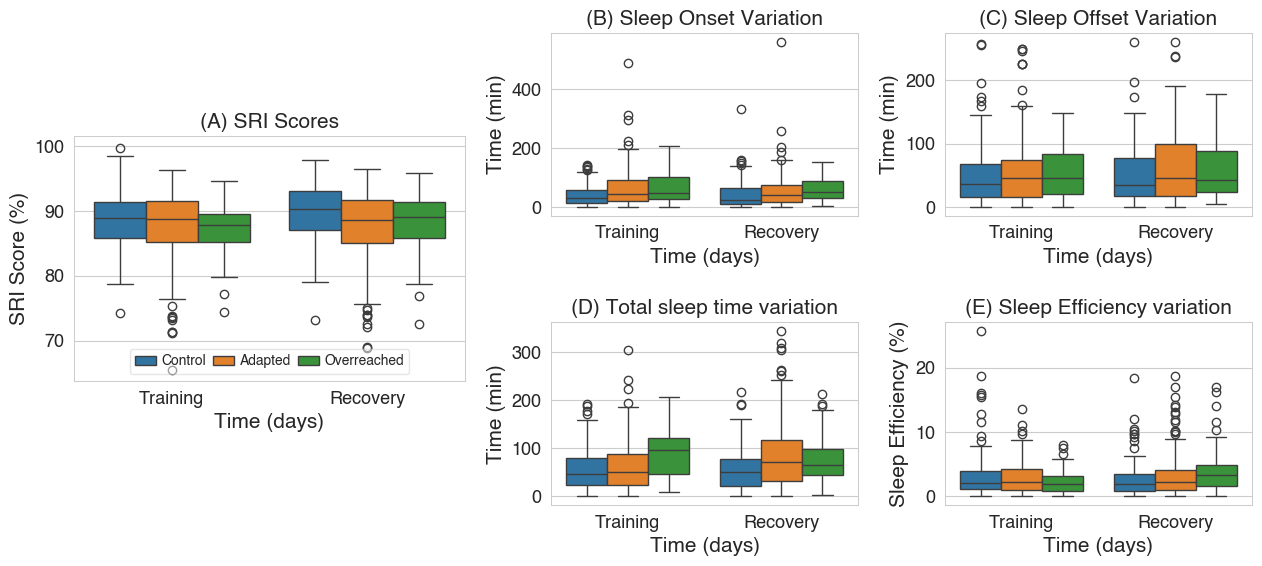

In [35]:
### Figure for all sleep regularity metrics
## figure layout
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# First smaller subplot below the larger subplot
main_plot = plt.subplot2grid(shape=(30, 60), loc=(5, 0), colspan=19, rowspan=12)
# Second smaller subplot below the larger subplot, shifted to the right
UL_plot = plt.subplot2grid(shape=(30, 60), loc=(0, 23), colspan=15, rowspan=9)
LL_plot = plt.subplot2grid(shape=(30, 60), loc=(14, 23), colspan=15, rowspan=9)
UR_plot = plt.subplot2grid(shape=(30, 60), loc=(0, 42), colspan=15, rowspan=9)
LR_plot= plt.subplot2grid(shape=(30, 60), loc=(14, 42), colspan=15, rowspan=9)

########################### SRI plots ###########################
ax1= sns.boxplot(data= visuals_df, x='phase', y='SRI_score', hue='ot_status', ax=main_plot)
# ,showmeans=True, meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":8}
########################### Sleep onset plots ###########################
ax2= sns.boxplot(data= visuals_df, x='phase', y='sleep_onset_absolute_var', hue='ot_status', ax=UL_plot, legend=None)

########################### Sleep offset plots ###########################
ax3 = sns.boxplot(data= visuals_df, x='phase', y='sleep_offset_absolute_var', hue='ot_status', ax=UR_plot, legend=None)

########################### tst_plots plots ###########################
ax4 = sns.boxplot(data= visuals_df, x='phase', y='tst_absolute_var', hue='ot_status', ax=LL_plot, legend=None)

########################### sleep_efficiency_av plots ###########################
ax5 = sns.boxplot(data= visuals_df, x='phase', y='sleep_efficiency_absolute_var', hue='ot_status', ax=LR_plot, legend=None)

############### Plot settings below #############################################
ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax4.tick_params(axis='both', labelsize=13)
ax5.tick_params(axis='both', labelsize=13)

# ax1.set_xticks(testing_days, testing_labels)
# ax2.set_xticks(testing_days, testing_labels)
# ax3.set_xticks(testing_days, testing_labels)
# ax4.set_xticks(testing_days, testing_labels)
# ax5.set_xticks(testing_days, testing_labels)

# ax1.set_xticks(np.arange(0,45,10))
# ax2.set_xticks(np.arange(0,45,10))
# ax3.set_xticks(np.arange(0,45,10))
# ax4.set_xticks(np.arange(0,45,10))
# ax5.set_xticks(np.arange(0,45,10))

# ax1.set_yticks(np.arange(0,125,25))
# # ax2.set_xticks(np.arange(0,45,10))
# # ax3.set_xticks(np.arange(0,45,10))
# # ax4.set_xticks(np.arange(0,45,10))
# ax5.set_yticks(np.arange(0,11,2))

ax1.set_ylabel('SRI Score (%)', fontsize=15)
ax2.set_ylabel('Time (min)', fontsize=15)
ax3.set_ylabel('Time (min)', fontsize=15)
ax4.set_ylabel('Time (min)', fontsize=15)
ax5.set_ylabel('Sleep Efficiency (%)', fontsize=15)

ax1.set_xlabel('Time (days)', fontsize=15)
ax2.set_xlabel('Time (days)', fontsize=15)
ax3.set_xlabel('Time (days)', fontsize=15)
ax4.set_xlabel('Time (days)', fontsize=15)
ax5.set_xlabel('Time (days)', fontsize=15)

ax1.set_title('(A) SRI Scores', fontsize=15)
ax2.set_title('(B) Sleep Onset Variation', fontsize=15)
ax3.set_title('(C) Sleep Offset Variation', fontsize=15)
ax4.set_title('(D) Total sleep time variation', fontsize=15)
ax5.set_title('(E) Sleep Efficiency variation', fontsize=15)

ax1.legend(loc='lower center', ncol=3, fontsize=10, framealpha=0.5,handlelength=1.5, handletextpad=.4, columnspacing=0.5)
# ax2.legend(loc='lower center', ncol=3)
# ax3.legend(loc='lower center', ncol=3)
# ax4.legend(loc='lower center', ncol=3)
# ax5.legend(loc='upper right', ncol=3)

# plt.tight_layout()
plt.show()


In [36]:
### add in actigraphy_df and provide demo of what SRI looks like. 
actigraphy_df.columns


S09_actigraphy_df = actigraphy_df[actigraphy_df['subject']=='ORE_09'].copy()
S06_actigraphy_df = actigraphy_df[actigraphy_df['subject']=='ORC_06'].copy()
S09_actigraphy_df.head()

subject  visit_date  day_of_participation  time_epoch  sleep_binary  \
242527  ORE_09  2022-01-28                   2.0      -720.0           0.0   
242528  ORE_09  2022-01-28                   2.0      -719.0           0.0   
242529  ORE_09  2022-01-28                   2.0      -718.0           0.0   
242530  ORE_09  2022-01-28                   2.0      -717.0           0.0   
242531  ORE_09  2022-01-28                   2.0      -716.0           0.0   

         line                 date time  off-wrist status  activity  ...  \
242527  103.0  2022-01-27 00:00:00  NaN               1.0       0.0  ...   
242528  104.0  2022-01-27 00:00:00  NaN               1.0       0.0  ...   
242529  105.0  2022-01-27 00:00:00  NaN               1.0       0.0  ...   
242530  106.0  2022-01-27 00:00:00  NaN               1.0       0.0  ...   
242531  107.0  2022-01-27 00:00:00  NaN               1.0       0.0  ...   

        interval_status          date_time24 subject_raw time_epoch_raw  \
242527           ACTIVE  2022-01-27 12:00:00      ORE_09          720.0   
242528           ACTIVE  2022-01-27 12:01:00      ORE_09          721.0   
242529           ACTIVE  2022-01-27 12:02:00      ORE_09          722.0   
242530           ACTIVE  2022-01-27 12:03:00      ORE_09          723.0   
242531           ACTIVE  2022-01-27 12:04:00      ORE_09          724.0   

             visit_date_raw  SRI_index_raw micro_awakening_epoch  \
242527  2022-01-27 00:00:00            1.0                   0.0   
242528  2022-01-27 00:00:00            1.0                   0.0   
242529  2022-01-27 00:00:00            1.0                   0.0   
242530  2022-01-27 00:00:00            1.0                   0.0   
242531  2022-01-27 00:00:00            1.0                   0.0   

        time_epoch_adj  visit_date_adj  merged_SRI  
242527          -720.0      2022-01-28           0  
242528          -719.0      2022-01-28           0  
242529          -718.0      2022-01-28           0  
242530          -717.0      2022-01-28           0  
242531          -716.0      2022-01-28           0  

[5 rows x 22 columns]

In [37]:
hi= visuals_df.groupby(['subject'], observed=True)['SRI_score'].describe()
hi['iqr'] = hi['75%'] - hi['25%']

hi.sort_values(by='mean', ascending=True)
## Subject 09 has lowest average SRI score of 82.82 +/- 6.04 (median = 84.17 +/- 10.76)
## subject 06 has highest average SRI score of 92.13 +/- 2.70 (median = 91.14 +/- 4.06)

count       mean       std        min        25%        50%  \
subject                                                                
ORE_09    41.0  82.826806  6.049020  72.080000  76.460000  84.170000   
ORE_24    41.0  84.493897  7.335657  65.490000  81.600000  86.580000   
ORE_18    41.0  85.832582  5.315574  71.320000  84.620000  87.430000   
ORE_11    41.0  86.519790  5.468935  72.500000  84.170000  87.150000   
ORC_04    36.0  87.086130  4.378503  78.750000  83.047500  87.900000   
ORC_15    36.0  87.286846  4.457919  79.860000  83.831758  87.869795   
ORE_19    41.0  87.362791  3.285047  77.500000  85.380000  87.360000   
ORE_10    41.0  87.854987  3.420899  79.025528  85.854453  87.920000   
ORC_20    36.0  88.008910  4.693784  73.190000  85.935000  88.090000   
ORC_22    36.0  88.070457  5.207514  74.170000  84.790000  88.160371   
ORE_03    41.0  88.294130  3.303612  81.390000  87.010000  89.030000   
ORC_27    36.0  88.396204  3.589923  80.900000  85.805000  88.890000   
ORE_23    41.0  88.879485  5.322296  71.370000  86.320000  89.310000   
ORC_12    36.0  88.968881  3.101074  83.190000  86.705000  89.305000   
ORC_02    36.0  89.973681  3.655464  81.740000  88.175000  90.590000   
ORE_25    41.0  90.156203  4.842630  73.610000  87.810000  92.010000   
ORE_01    41.0  90.393270  3.060548  81.180000  89.580000  91.460000   
ORC_21    36.0  90.431404  4.460485  80.280000  88.805000  91.875000   
ORE_05    41.0  90.516658  3.351158  80.742959  88.400000  90.580000   
ORC_06    36.0  92.128179  2.695852  85.830000  90.315384  92.135000   

               75%        max        iqr  
subject                                   
ORE_09   87.220000  92.649972  10.760000  
ORE_24   89.510000  96.110000   7.910000  
ORE_18   89.100000  93.890000   4.480000  
ORE_11   89.699252  95.845655   5.529252  
ORC_04   89.510000  96.530000   6.462500  
ORC_15   89.982500  99.774342   6.150742  
ORE_19   90.140000  91.810000   4.760000  
ORE_10   90.620000  92.710000   4.765547  
ORC_20   91.722500  95.000000   5.787500  
ORC_22   90.812500  98.420855   6.022500  
ORE_03   90.620000  94.650000   3.610000  
ORC_27   90.898588  94.410000   5.093588  
ORE_23   92.850000  96.490000   6.530000  
ORC_12   90.995000  95.660000   4.290000  
ORC_02   92.657500  97.922052   4.482500  
ORE_25   93.540000  95.690000   5.730000  
ORE_01   92.220000  94.860000   2.640000  
ORC_21   93.305000  96.740000   4.500000  
ORE_05   92.500000  96.250000   4.100000  
ORC_06   94.380000  97.260000   4.064616

In [38]:
# Function to convert epoch to time string (HH:MM)
def epoch_to_time(epoch):
    hours = epoch // 60
    minutes = epoch % 60
    time_str = f"{hours:+02d}:{abs(minutes):02d}"
    return time_str


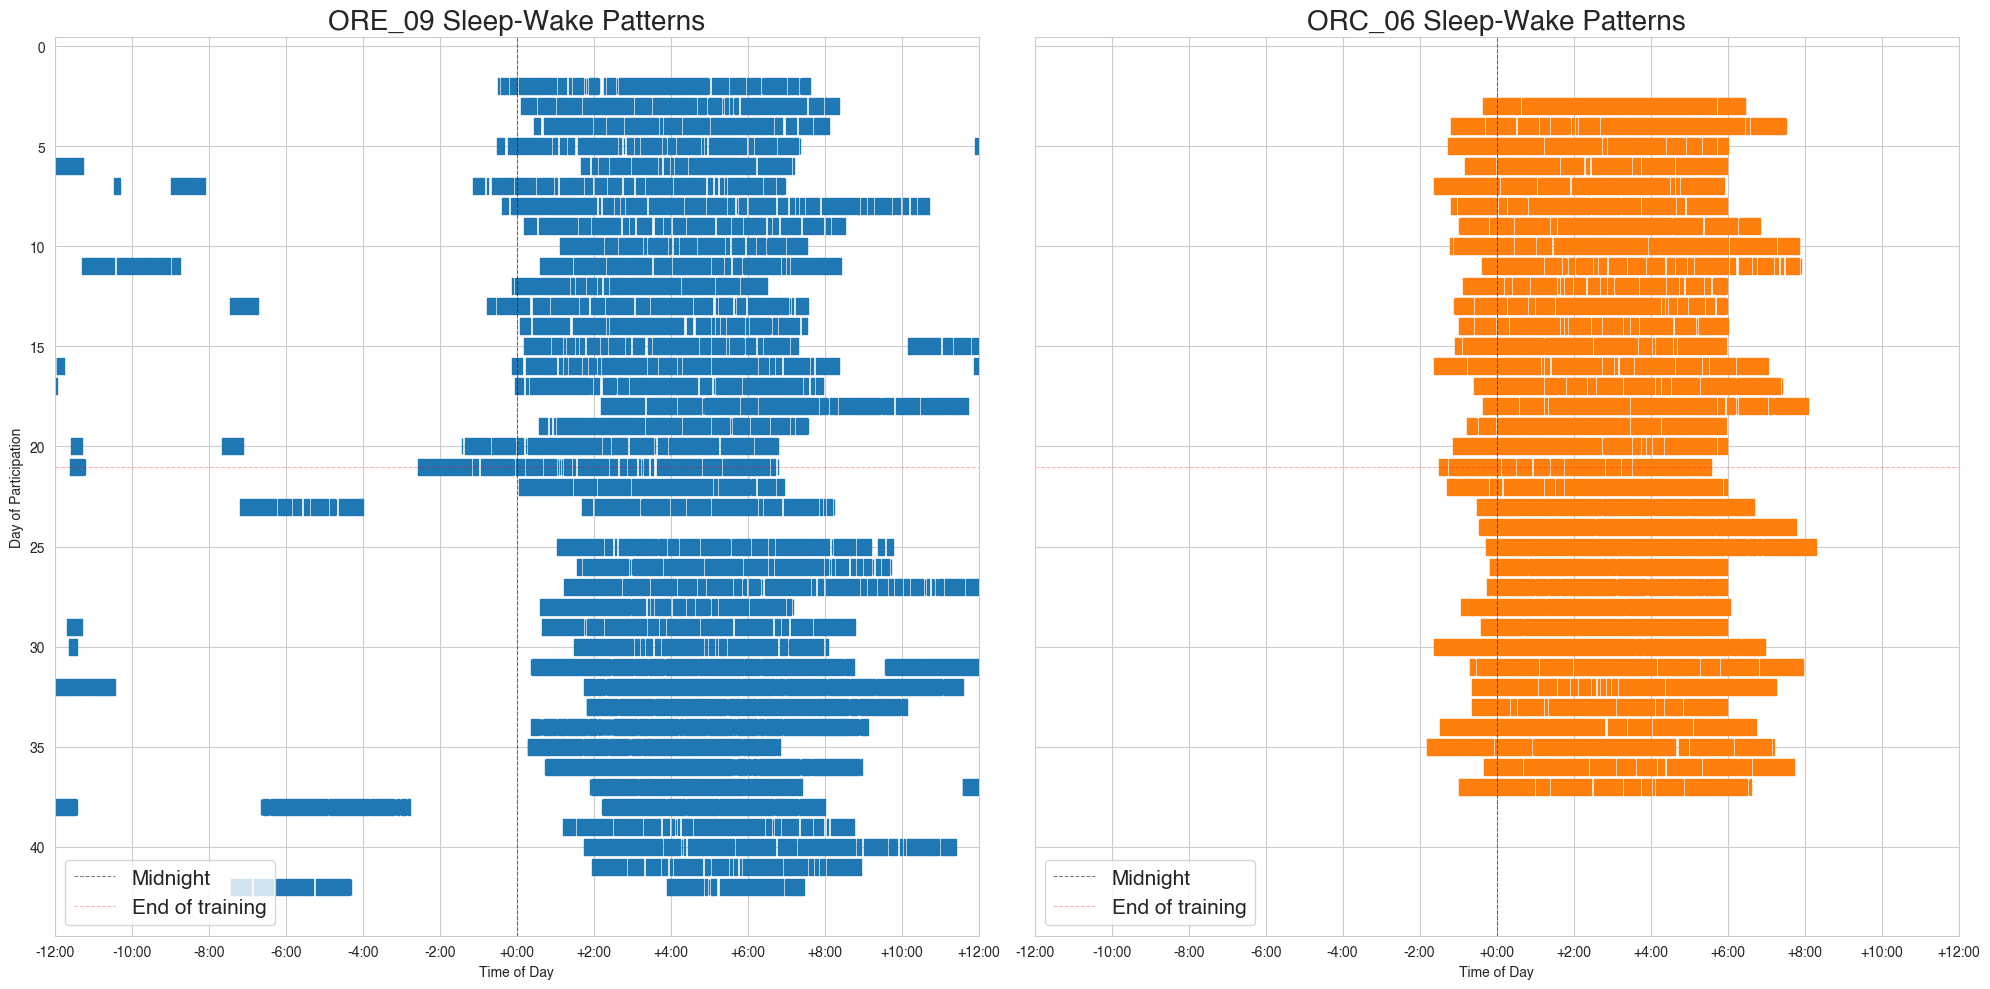

In [39]:
## testing visual to see both before/after

# Create x-ticks from -720 to 720 with 120-epoch intervals (every 2 hours)
x_ticks = np.arange(-720, 721, 120)

# Generate corresponding time labels for these ticks
x_tick_labels = [epoch_to_time(epoch) for epoch in x_ticks]

################## First Plot ##################

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

# Loop through each day of participation and plot
for day in S09_actigraphy_df['day_of_participation'].unique():
    day_df = S09_actigraphy_df[S09_actigraphy_df['day_of_participation'] == day]
    ax[0].fill_between(day_df['time_epoch'], day - 0.4, day + 0.4, where=day_df['merged_SRI'] == 1, color=palette[0], alpha=1)

################## Customize the first subplot ##################
ax[0].axvline(x=0, color='black', linestyle='--', label="Midnight", alpha=0.5)  # Annotate midnight at center
ax[0].axhline(xmin=0, xmax=1, y=21, ls='--', color='red', label='End of training', alpha=0.3)
ax[0].set_xlim(-720, 720)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_tick_labels)
ax[0].set_xlabel("Time of Day")
ax[0].set_title("ORE_09 Sleep-Wake Patterns", fontsize=20)

################## Second Plot ##################

for day in S06_actigraphy_df['day_of_participation'].unique():
    day_df = S06_actigraphy_df[S06_actigraphy_df['day_of_participation'] == day]
    ax[1].fill_between(day_df['time_epoch'], day - 0.4, day + 0.4, where=day_df['merged_SRI'] ==1, color=palette[1], alpha=1)

################## Customize the second subplot ##################
ax[1].axvline(x=0, color='black', linestyle='--', label="Midnight", alpha=0.5)  # Annotate midnight at center
ax[1].axhline(xmin=0, xmax=1, y=21, ls='--', color='red', label='End of training', alpha=0.3)
ax[1].set_xlim(-720, 720)
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_tick_labels)
ax[1].set_xlabel("Time of Day")
ax[1].set_title("ORC_06 Sleep-Wake Patterns", fontsize=20)

# Invert the y-axis to have Day 1 on top for both subplots
ax[0].invert_yaxis()

# Set y-axis label for the first subplot (shared with the second)
ax[0].set_ylabel("Day of Participation")

# Add legends to both subplots
ax[0].legend(loc='lower left', fontsize=15)
ax[1].legend(loc='lower left', fontsize=15)

# Show the plot
plt.tight_layout()


plt.show()

In [40]:
tst_grouped_df = visuals_df.groupby(['subject', 'ot_status'], observed=True, as_index=False)[['tst_24_h', 'SRI_score']].mean()

# tst_grouped_df.head()

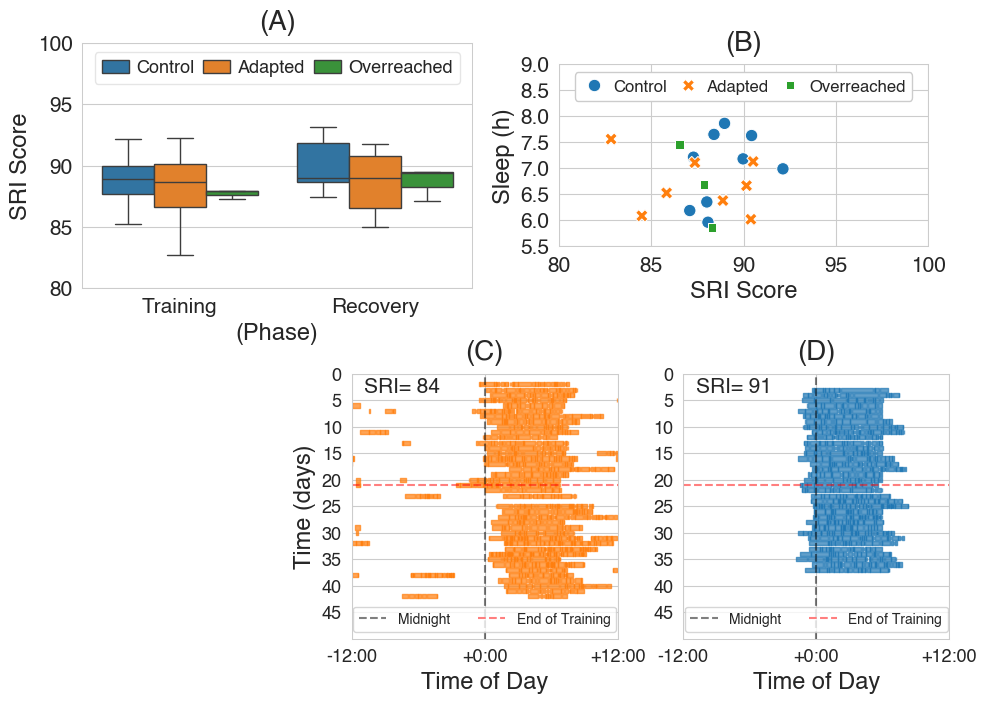

In [41]:
# sns.set_style("whitegrid")
# # plt.rcParams.update({
# #     "font.family": "Helvetica",
# #     # "font.size": 10,              # within 8–12 pt range
# #     # "axes.linewidth": 0.75,       # match line width spec
# #     # "lines.linewidth": 0.75
# # })

# plt.rcParams["font.family"] = "Helvetica"
palette= sns.color_palette()
# # 
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# Main plot of SRI score
main_plot = plt.subplot2grid(shape=(30, 60), loc=(0, 0), colspan=19, rowspan=12)
# Scatterplot of SRI and TST
UL_plot = plt.subplot2grid(shape=(30, 60), loc=(1, 23), colspan=18, rowspan=9)
### examples of SRI scores for highest and lowest participants.
LL_plot = plt.subplot2grid(shape=(30, 60), loc=(16, 13), colspan=13, rowspan=13)
LR_plot= plt.subplot2grid(shape=(30, 60), loc=(16, 29), colspan=13, rowspan=13)
########################### SRI plots ###########################
SRI_grouped = visuals_df.groupby(['subject','ot_status', 'phase'], observed=True, as_index=False)['SRI_score'].median().copy()

ax1 = sns.boxplot(data= SRI_grouped, x='phase', y='SRI_score', hue='ot_status', ax=main_plot)
markers = {"Control": "s", "Adapted": "x", "Overreached": "o"}


ax2 = sns.scatterplot(data= tst_grouped_df, x='SRI_score', y='tst_24_h', hue='ot_status',markers=True,s=80, style='ot_status', ax=UL_plot)

ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

ax1.set_yticks(np.arange(80, 101, 5))
ax2.set_yticks(np.arange(5.5,9.5, 0.5))
ax2.set_xticks(np.arange(80,101,5))

ax1.set_xlabel('(Phase)', fontsize=17)
ax1.set_ylabel('SRI Score', fontsize=17)
ax2.set_xlabel('SRI Score', fontsize=17)
ax2.set_ylabel('Sleep (h)', fontsize=17)

ax1.set_title('(A)', fontsize=20, pad=10)
ax2.set_title('(B)', fontsize=20, pad=10)

ax1.legend(loc='upper center', ncol=3, fontsize=13, framealpha=0.5,handlelength=1.5, handletextpad=.4, columnspacing=0.5)
ax2.legend(loc='upper center', ncol=3, fontsize=12, framealpha=1,handlelength=1.5, handletextpad=.4, columnspacing=0.5)

################################# Everything after this line relates to the actigraphy graphs #################################
## testing visual to see both before/after
# Create x-ticks from -720 to 720 with 120-epoch intervals (every 2 hours)
x_ticks = np.arange(-720, 721, 720)
# Generate corresponding time labels for these ticks
x_tick_labels = [epoch_to_time(epoch) for epoch in x_ticks]
################## First Plot ##################
# fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

# Loop through each day of participation and plot
for day in S09_actigraphy_df['day_of_participation'].unique():
    day_df = S09_actigraphy_df[S09_actigraphy_df['day_of_participation'] == day]
    LL_plot.fill_between(day_df['time_epoch'], day - 0.4, day + 0.4, where=day_df['merged_SRI'] == 1, color=palette[1], alpha=0.7)

################## Customize the first subplot ##################
LL_plot.axvline(x=0, color='black', linestyle='--',lw=1.5, label="Midnight", alpha=0.5)  # Annotate midnight at center
LL_plot.axhline(xmin=0, xmax=1, y=21, ls='--', lw=1.5, color='red', label='End of Training', alpha=0.5)

LL_plot.set_xlim(-720, 720)
LL_plot.set_xticks(x_ticks)
LL_plot.set_xticklabels(x_tick_labels)
LL_plot.set_xlabel("Time of Day")
LL_plot.set_title("(C)", fontsize=20, pad=10)
LL_plot.set_ylim(0,50)
# ################## Second Plot ##################
for day in S06_actigraphy_df['day_of_participation'].unique():
    day_df = S06_actigraphy_df[S06_actigraphy_df['day_of_participation'] == day]
    LR_plot.fill_between(day_df['time_epoch'], day - 0.4, day + 0.4, where=day_df['merged_SRI'] ==1, color=palette[0], alpha=0.7)
# ################## Customize the second subplot ##################
LR_plot.axvline(x=0, color='black', linestyle='--',lw=1.5, label="Midnight", alpha=0.5)  # Annotate midnight at center
LR_plot.axhline(xmin=0, xmax=1, y=21, ls='--', lw=1.5, color='red', label='End of Training', alpha=0.5)

LR_plot.set_xlim(-720, 720)
LR_plot.set_ylim(0,50)
LR_plot.set_xticks(x_ticks)
LR_plot.set_xticklabels(x_tick_labels)
# LR_plot.set_xlabel("Time of Day")
LR_plot.set_title("(D)", fontsize=20, pad=10)

# # Invert the y-axis to have Day 1 on top for both subplots
LL_plot.invert_yaxis()
LR_plot.invert_yaxis()

LL_plot.set_xlabel('Time of Day', fontsize=17)
LR_plot.set_xlabel('Time of Day', fontsize=17)
LL_plot.set_ylabel('Time (days)', fontsize=17)

LL_plot.set_yticks(np.arange(0,50,5))
LR_plot.set_yticks(np.arange(0,50,5))
LL_plot.tick_params(axis='both', labelsize=13)
LR_plot.tick_params(axis='both', labelsize=13)

LR_plot.annotate(text='SRI= 91',xy=(20,10), xytext=(-650,3.5), fontsize=15)
LL_plot.annotate(text='SRI= 84',xy=(20,10), xytext=(-650,3.5), fontsize=15)

LL_plot.legend(loc='lower center', ncol=2)
LR_plot.legend(loc='lower center', ncol=2)
plt.show()


## Figure 6 Code

* Figure 6- WURSS scores



In [42]:
####################### generate sleepiness_sleep dfs #######################
wurss_df_grouped = visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['wurss'].describe()
wurss_df_grouped['iqr'] = wurss_df_grouped['75%'] - wurss_df_grouped['25%']
wurss_df_grouped['upper'] = wurss_df_grouped['50%'] + (wurss_df_grouped['iqr']/2)
wurss_df_grouped['lower'] = wurss_df_grouped['50%'] - (wurss_df_grouped['iqr']/2)

CON_wurss_df_grouped = wurss_df_grouped[wurss_df_grouped['ot_status']=='Control'].copy()
AD_wurss_df_grouped = wurss_df_grouped[wurss_df_grouped['ot_status']=='Adapted'].copy()
OR_wurss_df_grouped = wurss_df_grouped[wurss_df_grouped['ot_status']=='Overreached'].copy()

In [43]:
TR_df_grouped = wurss_df_grouped[wurss_df_grouped['ot_status']!='Control'].copy().reset_index(drop=True)

TR_df_grouped.head()

ot_status  day_of_participation  count      mean       std  min   25%  50%  \
0   Adapted                     2    6.0  4.500000  4.679744  0.0  0.25  4.0   
1   Adapted                     3    7.0  2.142857  3.338092  0.0  0.00  0.0   
2   Adapted                     4    7.0  3.428571  7.114706  0.0  0.00  0.0   
3   Adapted                     5    6.0  2.166667  4.355074  0.0  0.00  0.5   
4   Adapted                     6    7.0  4.285714  5.822780  0.0  0.00  0.0   

   75%   max   iqr  upper  lower  
0  8.5  10.0  8.25  8.125 -0.125  
1  3.0   9.0  3.00  1.500 -1.500  
2  2.5  19.0  2.50  1.250 -1.250  
3  1.0  11.0  1.00  1.000  0.000  
4  8.0  14.0  8.00  4.000 -4.000

In [44]:
CON_df = visuals_df[visuals_df['ot_status']=='Control'].copy()
TR_df = visuals_df[visuals_df['train_cat']=='TR'].copy()

CON_df['wurss'].describe()

count    52.000000
mean      2.576923
std       5.395518
min       0.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      31.000000
Name: wurss, dtype: float64

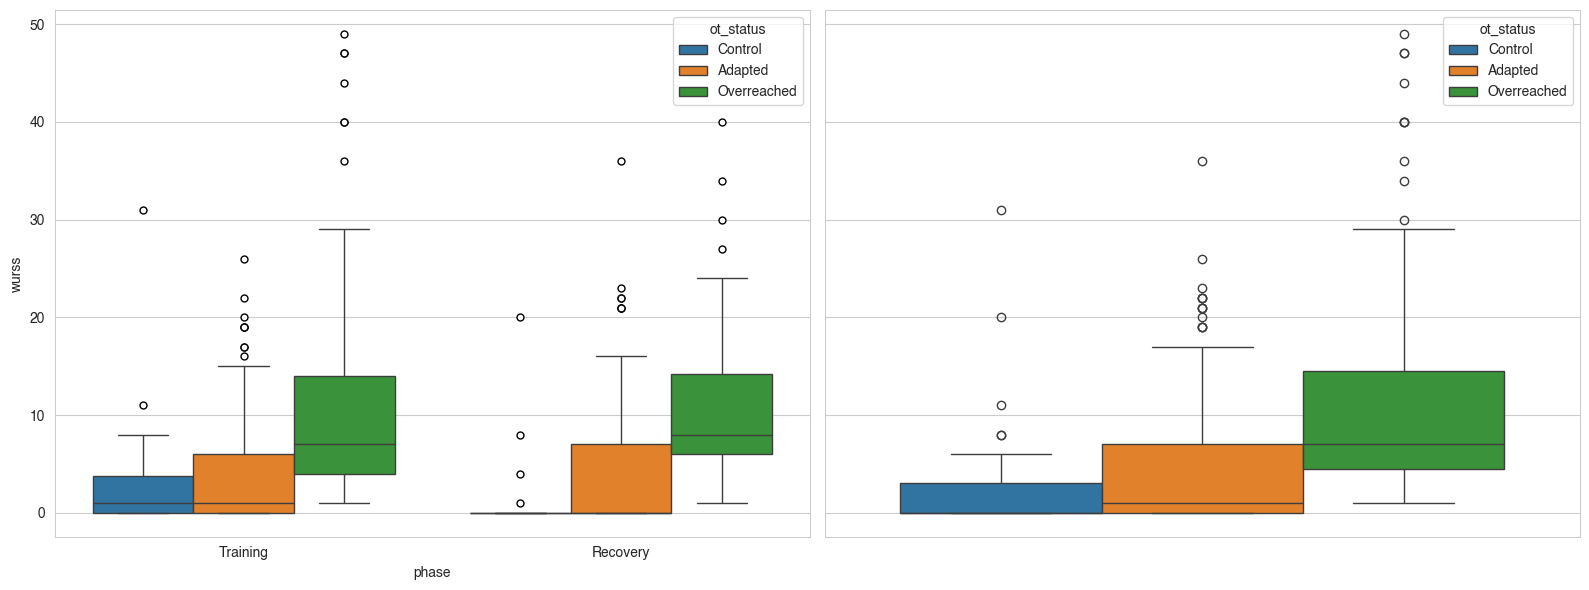

In [45]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,6))

ax1= sns.boxplot(data=visuals_df,x='phase',y='wurss', hue='ot_status',
                 flierprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", 'markersize':5}, ax=ax[0])

ax2= sns.boxplot(data=visuals_df,y='wurss', hue='ot_status', ax=ax[1])

plt.tight_layout()
plt.show()

In [46]:
visuals_df_grouped = visuals_df.groupby(['subject', 'ot_status','phase'], observed=True, as_index=False)['wurss'].mean()

visuals_df_grouped.head()

subject ot_status     phase     wurss
0  ORC_02   Control  Training  2.333333
1  ORC_02   Control  Recovery  0.000000
2  ORC_04   Control  Training  4.250000
3  ORC_04   Control  Recovery  4.000000
4  ORC_06   Control  Training  0.000000

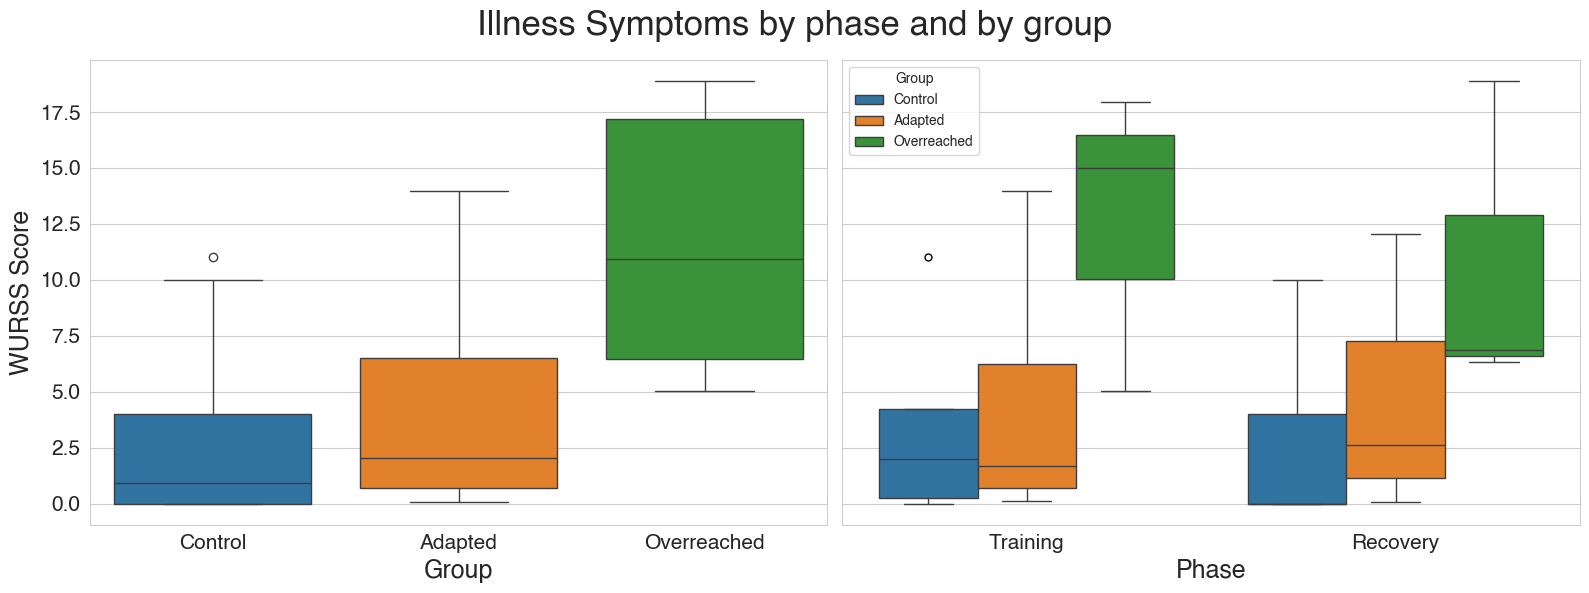

In [47]:
## More representative of data as each participant only has one data point (mean WURSS) in each box plot, vs. all data points (all visits) being used to determine distribution of boxplot

fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,6))

ax1= sns.boxplot(data=visuals_df_grouped,y='wurss', x='ot_status', hue='ot_status', ax=ax[0])


ax2= sns.boxplot(data=visuals_df_grouped,x='phase',y='wurss', hue='ot_status',
                 flierprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", 'markersize':5}, ax=ax[1])
### subplot settings ###
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

ax1.set_xlabel('Group', fontsize=18)
ax1.set_ylabel('WURSS Score', fontsize=18)
ax2.set_xlabel('Phase', fontsize=18)

ax2.legend(title='Group')
plt.suptitle('Illness Symptoms by phase and by group', fontsize=25)

plt.tight_layout()
plt.show()

In [48]:
colors2 = sns.color_palette()[1:3]  # index 1 and 2

# Map your group_status categories to those colors
palette2 = dict(zip(['AD', 'OR'], colors2))


In [49]:
TR_df_grouped.head()

ot_status  day_of_participation  count      mean       std  min   25%  50%  \
0   Adapted                     2    6.0  4.500000  4.679744  0.0  0.25  4.0   
1   Adapted                     3    7.0  2.142857  3.338092  0.0  0.00  0.0   
2   Adapted                     4    7.0  3.428571  7.114706  0.0  0.00  0.0   
3   Adapted                     5    6.0  2.166667  4.355074  0.0  0.00  0.5   
4   Adapted                     6    7.0  4.285714  5.822780  0.0  0.00  0.0   

   75%   max   iqr  upper  lower  
0  8.5  10.0  8.25  8.125 -0.125  
1  3.0   9.0  3.00  1.500 -1.500  
2  2.5  19.0  2.50  1.250 -1.250  
3  1.0  11.0  1.00  1.000  0.000  
4  8.0  14.0  8.00  4.000 -4.000

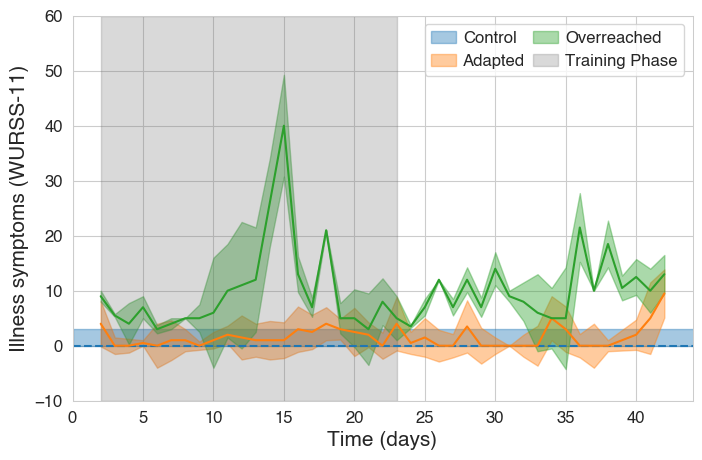

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))

# Use 2nd and 3rd colors from default palette
colors2 = sns.color_palette()[1:3]

# Define your groups and palette
groups = ['Adapted', 'Overreached']
palette2 = dict(zip(groups, colors2))

# Pass both palette and hue_order
ax1= sns.lineplot(
    data=TR_df_grouped,
    x='day_of_participation',
    y='50%',
    hue='ot_status',
    hue_order=groups,  # ensures only AD and OR are expected
    lw=1.5,
    zorder=10,
    palette=palette2,
    legend=None
)
plt.axhline(y=0, xmin=0, xmax=36, lw='1.5', ls='--', color=palette[0])
plt.axhspan(ymin=0, ymax=3, xmin=0, xmax=36, color=palette[0], alpha=0.4, label='Control')

ax2 = plt.fill_between(data=AD_wurss_df_grouped, x='day_of_participation', y1=AD_wurss_df_grouped['lower'], y2=AD_wurss_df_grouped['upper'],
                       color=palette[1], alpha=0.4, label='Adapted')

ax3 = plt.fill_between(data=OR_wurss_df_grouped, x='day_of_participation', y1=OR_wurss_df_grouped['lower'], y2=OR_wurss_df_grouped['upper'],
                       color=palette[2], alpha=0.4, label='Overreached')

plt.ylabel('Illness symptoms (WURSS-11)', fontsize=15)
plt.xlabel('Time (days)', fontsize=15)
plt.tick_params(axis='both', labelsize=12)

ax1.set_ylim(-10, 60)

plt.axvspan(xmin=2, xmax=23, color='dimgrey', alpha=0.25, label='Training Phase')
# ax1.legend(fontsize='18', ncol=3, loc='upper center', handlelength=1.5, handletextpad=.4, columnspacing=0.5)
plt.legend(ncol=2, fontsize=12, handlelength=1.5, handletextpad=0.4,title_fontsize=12, columnspacing=0.5)

# plt.title('Illness Symptoms', fontsize=20)

plt.show()

## 9-30-25 Code above this line was used for conference posters and publications
## Code below this line was kept for posterity and/or to investigate other ways of presenting visual representations of data

In [51]:
#Create confidence interval for Con WURSS to add as bar
from scipy.stats import t
# Number of samples
con_n = 9

# Degrees of freedom
con_dof = con_n - 1
# Confidence level (95% in this case)
confidence_level = 0.95

# Calculate the margin of error
con_WURSS_95CI = t.ppf((1 + confidence_level) / 2, con_dof) * (5.395518/ (con_n**0.5)) #Con WURSS STD

con_WURSS_95CI_upper= 2.576923+ con_WURSS_95CI 


In [52]:
CON_df= visuals_df[visuals_df['ot_status']=='CON'].copy()
AD_df= visuals_df[visuals_df['ot_status']=='AD'].copy()
OR_df= visuals_df[visuals_df['ot_status']=='OR'].copy()



In [53]:
main_sleep_epoch_df = visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['main_sleep_epoch'].describe().round(2)
main_sleep_epoch_df['IQR'] = main_sleep_epoch_df['75%'] - main_sleep_epoch_df['25%']
main_sleep_epoch_df['half_IQR'] = main_sleep_epoch_df['IQR']/2
main_sleep_epoch_df['upper'] = main_sleep_epoch_df['50%'] + main_sleep_epoch_df['half_IQR']
main_sleep_epoch_df['lower'] = main_sleep_epoch_df['50%'] - main_sleep_epoch_df['half_IQR']
main_sleep_epoch_df.head()

CON_main_sleep_epoch_df= main_sleep_epoch_df[main_sleep_epoch_df['ot_status']=='CON'].copy()
AD_main_sleep_epoch_df= main_sleep_epoch_df[main_sleep_epoch_df['ot_status']=='AD'].copy()
OR_main_sleep_epoch_df= main_sleep_epoch_df[main_sleep_epoch_df['ot_status']=='OR'].copy()

CON_main_sleep_epoch_df.head()
## This is good

Empty DataFrame
Columns: [ot_status, day_of_participation, count, mean, std, min, 25%, 50%, 75%, max, IQR, half_IQR, upper, lower]
Index: []

In [54]:
main_wake_epoch_df = visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['main_wake_epoch'].describe().round(2)
main_wake_epoch_df['IQR'] = main_wake_epoch_df['75%'] - main_wake_epoch_df['25%']
main_wake_epoch_df['half_IQR'] = main_wake_epoch_df['IQR']/2
main_wake_epoch_df['upper'] = main_wake_epoch_df['50%'] + main_wake_epoch_df['half_IQR']
main_wake_epoch_df['lower'] = main_wake_epoch_df['50%'] - main_wake_epoch_df['half_IQR']
main_wake_epoch_df.head()

CON_main_wake_epoch_df= main_wake_epoch_df[main_wake_epoch_df['ot_status']=='CON'].copy()
AD_main_wake_epoch_df= main_wake_epoch_df[main_wake_epoch_df['ot_status']=='AD'].copy()
OR_main_wake_epoch_df= main_wake_epoch_df[main_wake_epoch_df['ot_status']=='OR'].copy()

CON_main_wake_epoch_df.head()
## This is good

Empty DataFrame
Columns: [ot_status, day_of_participation, count, mean, std, min, 25%, 50%, 75%, max, IQR, half_IQR, upper, lower]
Index: []

In [55]:

OR_main_sleep_epoch_df = OR_df.groupby(['day_of_participation'], observed=False, as_index=False)['main_sleep_epoch'].describe()

OR_main_sleep_epoch_df.head()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

In [56]:
# Function to convert epoch to time string (HH:MM)
def epoch_to_time(epoch):
    hours = epoch // 60
    minutes = epoch % 60
    time_str = f"{hours:02d}:{abs(minutes):02d}"
    return time_str

### example use

# # Create x-ticks from -720 to 720 with 120-epoch intervals (every 2 hours)
# x_ticks = np.arange(-720, 721, 120)

# # Generate corresponding time labels for these ticks
# x_tick_labels = [epoch_to_time(epoch) for epoch in x_ticks]


In [57]:
# list(visuals_df.columns)

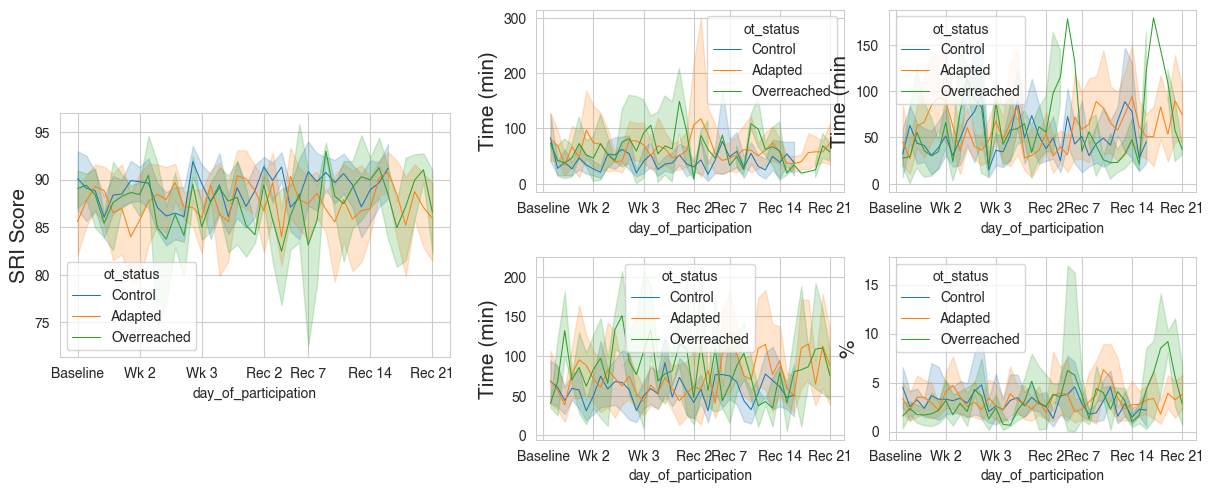

In [58]:
### Figure for all sleep regularity metrics
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

### customize placement of subplots
### far right subplots are too close to one another

# First smaller subplot below the larger subplot
main_plot = plt.subplot2grid(shape=(30, 60), loc=(5, 0), colspan=19, rowspan=12)

# Second smaller subplot below the larger subplot, shifted to the right
UL_plot = plt.subplot2grid(shape=(30, 60), loc=(0, 23), colspan=15, rowspan=9)
LL_plot = plt.subplot2grid(shape=(30, 60), loc=(12, 23), colspan=15, rowspan=9)

UR_plot = plt.subplot2grid(shape=(30, 60), loc=(0, 40), colspan=15, rowspan=9)
LR_plot= plt.subplot2grid(shape=(30, 60), loc=(12, 40), colspan=15, rowspan=9)

######### Customize plots below
ax1= sns.lineplot(data=visuals_df, x='day_of_participation', y='SRI_score', hue='ot_status', ax=main_plot)

## Sleep onset variation
ax2= sns.lineplot(data=visuals_df, x='day_of_participation', y='sleep_onset_absolute_var', hue='ot_status', ax=UL_plot)
## Sleep offset variation
ax3= sns.lineplot(data=visuals_df, x='day_of_participation', y='sleep_offset_absolute_var', hue='ot_status', ax=UR_plot)
## TST variation
ax4= sns.lineplot(data=visuals_df, x='day_of_participation', y='tst_absolute_var', hue='ot_status', ax=LL_plot)
## Sleep % variation
ax5= sns.lineplot(data=visuals_df, x='day_of_participation', y='sleep_efficiency_absolute_var', hue='ot_status', ax=LR_plot)

############### Plot settings below #############################################

ax1.set_xticks(testing_days, testing_labels)
ax2.set_xticks(testing_days, testing_labels)
ax3.set_xticks(testing_days, testing_labels)
ax4.set_xticks(testing_days, testing_labels)
ax5.set_xticks(testing_days, testing_labels)

ax1.set_ylabel('SRI Score', fontsize=15)
ax2.set_ylabel('Time (min)', fontsize=15)
ax3.set_ylabel('Time (min', fontsize=15)
ax4.set_ylabel('Time (min)', fontsize=15)
ax5.set_ylabel('%', fontsize=15)

# plt.tight_layout()
plt.show()


In [59]:
#add these columns with the names that were used in dissertation, just to make repeat code easier

visuals_df['group']= visuals_df['train_cat'].copy()
visuals_df['training_status']= visuals_df['ot_status'].copy()

In [60]:
tst_grouped= visuals_df.groupby(['subject', 'phase', 'train_cat'], observed=True, as_index=False)\
[['tst_24','SRI_score', 'tst_absolute_var','main_sleep_epoch','sleep_onset_absolute_var', 'main_wake_epoch', 'sleep_offset_absolute_var',
 'sleepiness_sleep_1', 'sleepiness_wake_1', 'fatigue_sleep_1', 'fatigue_wake_1', 'sleep_q_1']].mean().round(2)

tst_grouped.head()

subject     phase train_cat  tst_24  SRI_score  tst_absolute_var  \
0  ORC_02  Training       CON  436.59      89.81             50.62   
1  ORC_02  Recovery       CON  421.71      90.23             68.57   
2  ORC_04  Training       CON  369.18      86.03             51.71   
3  ORC_04  Recovery       CON  374.64      88.75             30.14   
4  ORC_06  Training       CON  415.50      92.21             47.29   

   main_sleep_epoch  sleep_onset_absolute_var  main_wake_epoch  \
0            -65.26                     37.41           401.05   
1            -55.85                     49.50           395.38   
2            -92.14                     37.95           342.90   
3            -54.36                     28.21           389.50   
4            -59.95                     26.35           391.67   

   sleep_offset_absolute_var  sleepiness_sleep_1  sleepiness_wake_1  \
0                      28.24                6.64               4.50   
1                      55.25                6.50               5.29   
2                      85.30                6.95               7.23   
3                      52.57                8.07               7.71   
4                      37.60                6.41               4.05   

   fatigue_sleep_1  fatigue_wake_1  sleep_q_1  
0             4.86            3.41       3.09  
1             4.93            3.57       3.71  
2             4.36            4.41       3.95  
3             4.50            4.43       4.00  
4             3.05            2.45       2.41

In [61]:
aggfuncs = [ 'count', 'sum', 'sem', 'skew', 'mean', 'min', 'max', 
'std', 'quantile', 'nunique', 'size','var']

In [62]:
visuals_df_grouped= visuals_df.groupby(['train_cat', 'day_of_participation'], observed=True, as_index=False)['tst_24_h'].agg(aggfuncs)

visuals_df_grouped.head()

visuals_df_grouped['lower']= visuals_df_grouped['mean'] - visuals_df_grouped['sem']

visuals_df_grouped['upper']= visuals_df_grouped['mean'] + visuals_df_grouped['sem']

visuals_df_grouped.head().round(3)

CON_visuals_df_grouped= visuals_df_grouped[visuals_df_grouped['train_cat']=='CON'].copy()

TR_visuals_df_grouped= visuals_df_grouped[visuals_df_grouped['train_cat']=='TR'].copy()


In [63]:
sns.set_theme(style='whitegrid')

In [64]:
CON_df = visuals_df[visuals_df['train_cat']=='CON'].copy()
TR_df = visuals_df[visuals_df['train_cat']=='TR'].copy()
AD_df = visuals_df[visuals_df['ot_status']=='AD'].copy()
OR_df = visuals_df[visuals_df['ot_status']=='OR'].copy()

TR_subjects = TR_df['subject'].unique()
CON_subjects = CON_df['subject'].unique()
AD_subjects = AD_df['subject'].unique()
OR_subjects = OR_df['subject'].unique()

In [65]:
CON_subjects

array(['ORC_02', 'ORC_04', 'ORC_06', 'ORC_12', 'ORC_15', 'ORC_20',
       'ORC_21', 'ORC_22', 'ORC_27'], dtype=object)

In [66]:
# testing_days=[0,7,14, 21, 26, 33, 40] #Lines up x-axis with plots from
testing_days=[2,9,16, 23, 28, 35, 42] #Actual days_of_participation in excel for performance visits
testing_labels= ['Baseline', 'Wk 2', 'Wk 3', 'Rec 2', 'Rec 7', 'Rec 14', 'Rec 21']

In [67]:
box_plots_two_grouped = ['main_sleep_epoch', 'main_wake_epoch', 'sleep_onset_absolute_var', 'sleep_offset_absolute_var', 'SRI_score']

visuals_df_two_grouped= visuals_df.groupby(['subject', 'train_cat'], observed=True, as_index=False)[box_plots_two_grouped].mean()


visuals_df_two_grouped

subject train_cat  main_sleep_epoch  main_wake_epoch  \
0   ORC_02       CON        -61.437500       398.750000   
1   ORC_04       CON        -77.028571       361.542857   
2   ORC_06       CON        -54.371429       400.571429   
3   ORC_12       CON        -71.638889       446.916667   
4   ORC_15       CON       -113.000000       411.892857   
5   ORC_20       CON         87.212121       501.969697   
6   ORC_21       CON       -160.400000       349.085714   
7   ORC_22       CON         25.656250       436.750000   
8   ORC_27       CON       -149.103448       366.827586   
9   ORE_01        TR        -64.414634       344.707317   
10  ORE_03        TR          6.589744       390.923077   
11  ORE_05        TR        -67.853659       398.439024   
12  ORE_09        TR         38.400000       500.307692   
13  ORE_10        TR        -18.545455       419.393939   
14  ORE_11        TR       -127.371429       375.771429   
15  ORE_18        TR       -121.268293       333.926829   
16  ORE_19        TR        -82.414634       397.292683   
17  ORE_23        TR        -73.050000       335.225000   
18  ORE_24        TR        109.024390       516.585366   
19  ORE_25        TR        -21.025641       402.769231   

    sleep_onset_absolute_var  sleep_offset_absolute_var  SRI_score  
0                  42.413793                  39.413793  89.973681  
1                  33.941176                  71.823529  87.086130  
2                  28.029412                  41.294118  92.128179  
3                  47.828571                  39.457143  88.968881  
4                  49.461538                  47.769231  87.286846  
5                  58.931034                  57.000000  88.008910  
6                  24.151515                  48.060606  90.431404  
7                  31.518519                  73.518519  88.070457  
8                  68.440000                  37.640000  88.396204  
9                  27.100000                  41.650000  90.393270  
10                 71.166667                  58.472222  88.294130  
11                 40.725000                  33.750000  90.516658  
12                 56.368421                  78.527778  82.826806  
13                 65.275862                  56.034483  87.854987  
14                 54.531250                  59.156250  86.519790  
15                 52.375000                  64.900000  85.832582  
16                 69.775000                  58.375000  87.362791  
17                 74.500000                  62.052632  88.879485  
18                114.825000                  91.525000  84.493897  
19                 53.243243                  50.486486  90.156203

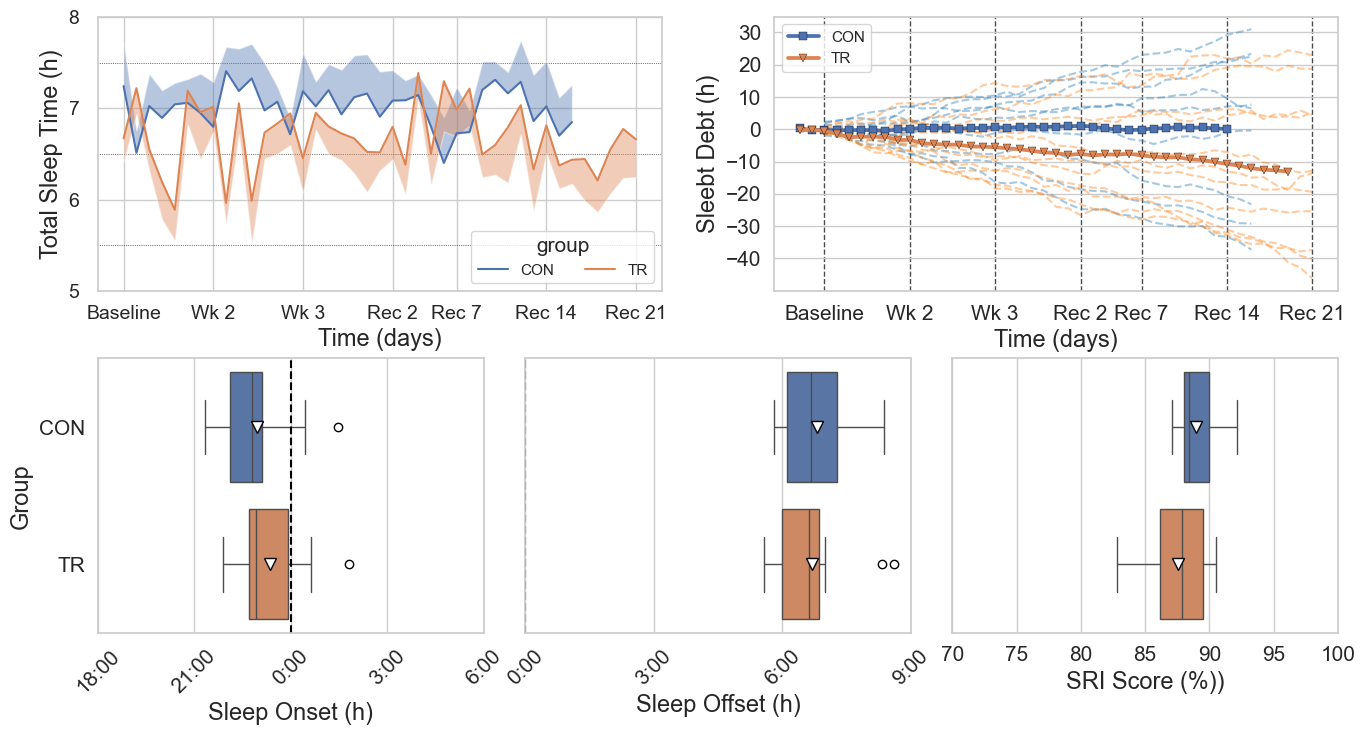

In [68]:
###This works for TST across time + Sleep duration box plots, above trying to limit lines to 1 errorbar each
from matplotlib.ticker import MultipleLocator

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# top left plot
top_left = plt.subplot2grid(shape=(20, 35), loc=(0, 0), colspan=16, rowspan=9)
#top right plot
top_right = plt.subplot2grid(shape=(20, 35), loc=(0, 19), colspan=16, rowspan=9)
# bottom left plot
bottom_left = plt.subplot2grid(shape=(20, 35), loc=(11, 0), colspan=11, rowspan=9)
#bottom middle plot
bottom_middle = plt.subplot2grid(shape=(20, 35), loc=(11, 12), colspan=11, rowspan=9)
# bottom right plot 
bottom_right = plt.subplot2grid(shape=(20, 35), loc=(11, 24), colspan=11, rowspan=9)

############# Top Left Figure: Total Sleep Time ##############################################################################

ax1= sns.lineplot(data=visuals_df, x='day_of_participation', y='tst_24_h', hue='train_cat', ax=top_left, errorbar=None)

ax1.fill_between(data=CON_visuals_df_grouped, x='day_of_participation',
                 y1='mean', y2='upper', where=CON_visuals_df_grouped['train_cat']=='CON', alpha=0.4)

ax1.fill_between(data=TR_visuals_df_grouped, x='day_of_participation',
                 y1='mean', y2='lower', where=TR_visuals_df_grouped['train_cat']=='TR', alpha=0.4)

############# Top Right Figure: Sleep Regularity Index ##############################################################################

ax2= sns.pointplot(data=visuals_df, x='day_of_participation', y='cum_sleep_debt_h',errorbar=None, markers=['s', 'v'],
                   markersize=6, ls=['solid', 'solid'], zorder=10, hue='train_cat', ax=top_right)
for line in ax2.lines:
    line.set_markeredgecolor('black')
    line.set_markeredgewidth(0.25)


for subject in CON_subjects:
    subject_data = CON_df[CON_df['subject'] == subject]
    # subject_data.loc[:,'cum_sleep_debt_7']= subject_data['cum_sleep_debt']/60
    sns.lineplot(data=subject_data, x='day_of_participation', y='cum_sleep_debt_h', color=palette[0],
                  ax=top_right, errorbar=None, alpha=0.4, ls='dashed')  

for subject in TR_subjects:
    subject_data = TR_df[TR_df['subject'] == subject]
    # subject_data.loc[:,'cum_sleep_debt_7']= subject_data['cum_sleep_debt']/60
    sns.lineplot(data=subject_data, x='day_of_participation', y='cum_sleep_debt_h', color=palette[1],
                  ax=top_right, errorbar=None, alpha=0.4, ls='dashed')  
    
# ax2.fill_between(data=CON_SRI_df_grouped, x='day_of_participation',
#                  y1='mean', y2='upper', where=CON_SRI_df_grouped['train_cat']=='CON', alpha=0.4)

# ax2.fill_between(data=TR_SRI_df_grouped, x='day_of_participation',
#                  y1='mean', y2='lower', where=TR_SRI_df_grouped['train_cat']=='TR', alpha=0.4)


# ax3= sns.boxplot(data=visuals_df, x='train_cat', y='main_sleep_epoch', hue='train_cat', ax=bottom_left)
ax3= sns.boxplot(data=visuals_df_two_grouped, x='main_sleep_epoch', y='train_cat', hue='train_cat',showmeans=True,
                 meanprops={"marker":"v", 'markersize':8, "markerfacecolor":"white", "markeredgecolor":"black"},
                 flierprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, ax=bottom_left)


# ax4= sns.boxplot(data=visuals_df, x='train_cat', y='main_wake_epoch', hue='train_cat', ax=bottom_middle)
ax4= sns.boxplot(data=visuals_df_two_grouped, x='main_wake_epoch', y='train_cat', hue='train_cat',showmeans=True,
                 meanprops={"marker":"v", 'markersize':8, "markerfacecolor":"white", "markeredgecolor":"black"},
                 flierprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, ax=bottom_middle)

ax5= sns.boxplot(data=visuals_df_two_grouped, x='SRI_score', y='train_cat', hue='train_cat', showmeans=True,
                 meanprops={"marker":"v", 'markersize':8, "markerfacecolor":"white", "markeredgecolor":"black"},
                 flierprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, ax=bottom_right)


######### Customize plots below

## x ticks
ax1.set_xticks(testing_days, testing_labels)
ax2.set_xticks(testing_days, testing_labels)
ax3.set_xticks(np.arange(-360, 361, 180), labels=['18:00', '21:00', '0:00','3:00','6:00'], rotation=45)
# ax3.set_xticks(np.arange(-360, 720, 180))
ax4.set_xticks(np.arange(0, 541, 180), labels=['0:00', '3:00', '6:00', '9:00'], rotation=45)
# ax4.set_xticks(np.arange(0, 721, 180))
ax5.set_xticks(np.arange(70,101, 5))


ax3.axvline(x=0, ymin=0, ymax=1, ls='--', color='black', label='Midnight')
ax4.axvline(x=0, ymin=0, ymax=1, ls='--', color='black', label='Midnight')
## y ticks
ax1.set_yticks(np.arange(5, 8.1, 1))
ax2.set_yticks(np.arange(-40,31, 10))

ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
# Optionally enable minor tick gridlines
ax1.grid(which='minor', linestyle=':', linewidth=0.5,color='black', alpha=1.0)
ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='inout')


# ax3.set_yticks(np.arange(-600, 1200, 600))
# ax4.set_yticks(np.arange(-600, 1200, 600))
# ax3.invert_yaxis()
# ax4.invert_yaxis()

## x labels
ax1.set_xlabel('Time (days)', fontsize=17)
ax2.set_xlabel('Time (days)', fontsize=17)
ax3.set_xlabel('Sleep Onset (h)', fontsize=17)
ax4.set_xlabel('Sleep Offset (h)', fontsize=17)
ax5.set_xlabel('SRI Score (%))', fontsize=17)

## y labels
ax1.set_ylabel('Total Sleep Time (h)', fontsize=17)
ax2.set_ylabel('Sleebt Debt (h)', fontsize=17)
ax3.set_ylabel('Group', fontsize=17)
ax4.set_ylabel(None)
ax4.set_yticks([])
ax5.set_ylabel(None)
ax5.set_yticks([])

#legends
ax1.legend(title='group', loc='lower right',ncols=2, title_fontsize=15)

# ax1.grid(axis='x', ls='--', color='black', alpha=0.7)
ax2.grid(axis='x', ls='--', color='black', alpha=0.7)

ax1.tick_params(axis='both', labelsize=14, direction='out')
ax1.tick_params(axis='y', direction='out')
ax2.tick_params(axis='both', labelsize=15)
ax3.tick_params(axis='both', labelsize=15)
ax4.tick_params(axis='both', labelsize=15)
ax5.tick_params(axis='both', labelsize=15)

# plt.tight_layout()
plt.show()


In [69]:
grouped_vis= visuals_df.groupby(['subject', 'train_cat'], observed=True, as_index=False)[['tst_24', 'SRI_score','main_sleep_epoch',
                                                                                          'main_wake_epoch',
                                                                                          'tst_absolute_var', 'sleep_efficiency']].mean()

grouped_vis.corr(numeric_only=True).round(3)

tst_24  SRI_score  main_sleep_epoch  main_wake_epoch  \
tst_24             1.000      0.040            -0.531           -0.002   
SRI_score          0.040      1.000            -0.338           -0.450   
main_sleep_epoch  -0.531     -0.338             1.000            0.815   
main_wake_epoch   -0.002     -0.450             0.815            1.000   
tst_absolute_var  -0.034     -0.693             0.522            0.559   
sleep_efficiency   0.127      0.326            -0.027           -0.126   

                  tst_absolute_var  sleep_efficiency  
tst_24                      -0.034             0.127  
SRI_score                   -0.693             0.326  
main_sleep_epoch             0.522            -0.027  
main_wake_epoch              0.559            -0.126  
tst_absolute_var             1.000            -0.122  
sleep_efficiency            -0.122             1.000

In [70]:
visuals_df_grouped_3df= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=True, as_index=False)['tst_24_h'].agg(aggfuncs)

visuals_df_grouped_3df.head()

visuals_df_grouped_3df['lower']= visuals_df_grouped_3df['mean'] - visuals_df_grouped_3df['sem']

visuals_df_grouped_3df['upper']= visuals_df_grouped_3df['mean'] + visuals_df_grouped_3df['sem']

visuals_df_grouped.head().round(3)

CON_visuals_df_grouped_3df= visuals_df_grouped_3df[visuals_df_grouped_3df['ot_status']=='CON'].copy()

AD_visuals_df_grouped_3df= visuals_df_grouped_3df[visuals_df_grouped_3df['ot_status']=='AD'].copy()

OR_visuals_df_grouped_3df= visuals_df_grouped_3df[visuals_df_grouped_3df['ot_status']=='OR'].copy()


In [71]:
box_plots_three_grouped = ['main_sleep_epoch', 'main_wake_epoch', 'sleep_onset_absolute_var', 'sleep_offset_absolute_var', 'SRI_score']

visuals_df_three_grouped= visuals_df.groupby(['subject', 'ot_status'], observed=True, as_index=False)[box_plots_two_grouped].mean()


visuals_df_three_grouped.head()

subject ot_status  main_sleep_epoch  main_wake_epoch  \
0  ORC_02   Control        -61.437500       398.750000   
1  ORC_04   Control        -77.028571       361.542857   
2  ORC_06   Control        -54.371429       400.571429   
3  ORC_12   Control        -71.638889       446.916667   
4  ORC_15   Control       -113.000000       411.892857   

   sleep_onset_absolute_var  sleep_offset_absolute_var  SRI_score  
0                 42.413793                  39.413793  89.973681  
1                 33.941176                  71.823529  87.086130  
2                 28.029412                  41.294118  92.128179  
3                 47.828571                  39.457143  88.968881  
4                 49.461538                  47.769231  87.286846

In [72]:
SRI_df_grouped_3= visuals_df.groupby(['ot_status', 'day_of_participation'], observed=True, as_index=False)['SRI_score'].agg(aggfuncs)

SRI_df_grouped_3.head()

SRI_df_grouped_3['lower']= SRI_df_grouped_3['mean'] - SRI_df_grouped_3['sem']

SRI_df_grouped_3['upper']= SRI_df_grouped_3['mean'] + SRI_df_grouped_3['sem']

SRI_df_grouped_3.head().round(3)

CON_SRI_df_grouped= SRI_df_grouped_3[SRI_df_grouped_3['ot_status']=='CON'].copy()

AD_SRI_df_grouped= SRI_df_grouped_3[SRI_df_grouped_3['ot_status']=='AD'].copy()

OR_SRI_df_grouped= SRI_df_grouped_3[SRI_df_grouped_3['ot_status']=='OR'].copy()


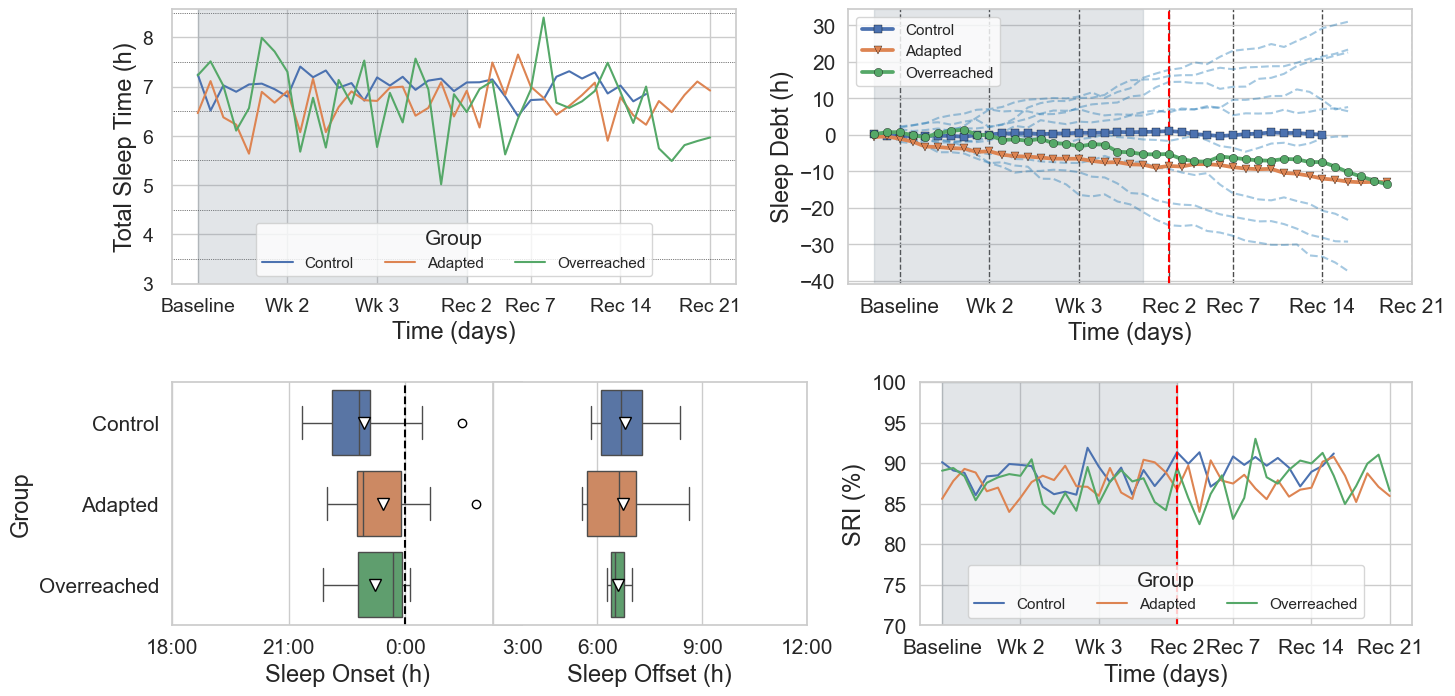

In [73]:
###This works for TST across time + Sleep duration box plots, above trying to limit lines to 1 errorbar each
from matplotlib.ticker import MultipleLocator

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# top left plot
top_left = plt.subplot2grid(shape=(20, 35), loc=(0, 0), colspan=16, rowspan=9)
#top right plot
top_right = plt.subplot2grid(shape=(20, 35), loc=(0, 19), colspan=16, rowspan=9)
# bottom left plot
bottom_left = plt.subplot2grid(shape=(20, 35), loc=(12, 0), colspan=10, rowspan=9)
#bottom middle plot
bottom_middle = plt.subplot2grid(shape=(20, 35), loc=(12, 9), colspan=9, rowspan=9)
# bottom right plot 
bottom_right = plt.subplot2grid(shape=(20, 35), loc=(12, 21), colspan=15, rowspan=9)

############# Top Left Figure: Total Sleep Time ##############################################################################

ax1 = sns.lineplot(data=visuals_df, x='day_of_participation', y='tst_24_h', hue='ot_status', ax=top_left, errorbar=None)

ax1.fill_between(data=CON_visuals_df_grouped_3df, x='day_of_participation',
                 y1='mean', y2='upper', where=CON_visuals_df_grouped_3df['ot_status']=='CON', alpha=0.4)

ax1.fill_between(data=AD_visuals_df_grouped_3df, x='day_of_participation',
                 y1='mean', y2='lower', where=AD_visuals_df_grouped_3df['ot_status']=='AD', alpha=0.4)

ax1.fill_between(data=OR_visuals_df_grouped_3df, x='day_of_participation',
                 y1='mean', y2='lower', where=OR_visuals_df_grouped_3df['ot_status']=='OR', alpha=0.4)

############# Top Right Figure: Sleep Regularity Index ##############################################################################

ax2= sns.pointplot(data=visuals_df, x='day_of_participation', y='cum_sleep_debt_h',errorbar=None, markers=['s', 'v', 'o'],
                   markersize=6, ls=['solid', 'solid', 'solid'], zorder=10, hue='ot_status', ax=top_right)
for line in ax2.lines:
    line.set_markeredgecolor('black')
    line.set_markeredgewidth(0.25)

for subject in CON_subjects:
    subject_data = CON_df[CON_df['subject'] == subject]
    # subject_data.loc[:,'cum_sleep_debt_7']= subject_data['cum_sleep_debt']/60
    sns.lineplot(data=subject_data, x='day_of_participation', y='cum_sleep_debt_h', color=palette[0],
                  ax=top_right, errorbar=None, alpha=0.4, ls='dashed')  

for subject in AD_subjects:
    subject_data = AD_df[AD_df['subject'] == subject]
    # subject_data.loc[:,'cum_sleep_debt_7']= subject_data['cum_sleep_debt']/60
    sns.lineplot(data=subject_data, x='day_of_participation', y='cum_sleep_debt_h', color=palette[1],
                  ax=top_right, errorbar=None, alpha=0.4, ls='dashed')  

for subject in OR_subjects:
    subject_data = OR_df[OR_df['subject'] == subject]
    # subject_data.loc[:,'cum_sleep_debt_7']= subject_data['cum_sleep_debt']/60
    sns.lineplot(data=subject_data, x='day_of_participation', y='cum_sleep_debt_h', color=palette[2],
                  ax=top_right, errorbar=None, alpha=0.4, ls='dashed')  
   
# ax2.fill_between(data=CON_SRI_df_grouped, x='day_of_participation',
#                  y1='mean', y2='upper', where=CON_SRI_df_grouped['train_cat']=='CON', alpha=0.4)

# ax2.fill_between(data=TR_SRI_df_grouped, x='day_of_participation',
#                  y1='mean', y2='lower', where=TR_SRI_df_grouped['train_cat']=='TR', alpha=0.4)

# ax3= sns.boxplot(data=visuals_df, x='train_cat', y='main_sleep_epoch', hue='train_cat', ax=bottom_left)
ax3= sns.boxplot(data=visuals_df_three_grouped, x='main_sleep_epoch', y='ot_status', hue='ot_status',showmeans=True,
                 meanprops={"marker":"v", 'markersize':8, "markerfacecolor":"white", "markeredgecolor":"black"},
                 flierprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, ax=bottom_left)

# ax4= sns.boxplot(data=visuals_df, x='train_cat', y='main_wake_epoch', hue='train_cat', ax=bottom_middle)
ax4= sns.boxplot(data=visuals_df_three_grouped, x='main_wake_epoch', y='ot_status', hue='ot_status',showmeans=True,
                 meanprops={"marker":"v", 'markersize':8, "markerfacecolor":"white", "markeredgecolor":"black"},
                 flierprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, ax=bottom_middle)

ax5= sns.lineplot(data=visuals_df, x='day_of_participation', y='SRI_score', hue='ot_status',errorbar=None, ax=bottom_right)

ax5.fill_between(data=CON_SRI_df_grouped, x='day_of_participation', y1=CON_SRI_df_grouped['mean'], y2=CON_SRI_df_grouped['upper'], alpha=0.5)
ax5.fill_between(data=AD_SRI_df_grouped, x='day_of_participation', y1=AD_SRI_df_grouped['mean'], y2=AD_SRI_df_grouped['lower'], alpha=0.5)
ax5.fill_between(data=OR_SRI_df_grouped, x='day_of_participation', y1=OR_SRI_df_grouped['mean'], y2=OR_SRI_df_grouped['lower'], alpha=0.5)

######### Customize plots below

## x ticks
ax1.set_xticks(testing_days, testing_labels)
ax2.set_xticks(testing_days, testing_labels)
ax3.set_xticks(np.arange(-360, 181, 180), labels=['18:00', '21:00', '0:00','3:00'])
# ax3.set_xticks(np.arange(-360, 720, 180))
ax4.set_xticks(np.arange(180, 721, 180), labels=['','6:00', '9:00', '12:00'])
ax5.set_xticks(testing_days, testing_labels)
ax5.set_yticks(np.arange(70,101, 5))


ax3.axvline(x=0, ymin=0, ymax=1, ls='--', color='black', label='Midnight')
# ax4.axvline(x=0, ymin=0, ymax=1, ls='--', color='black', label='Midnight')
## y ticks
ax1.set_yticks(np.arange(3, 8.1, 1))
ax2.set_yticks(np.arange(-40,31, 10))

ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
# Optionally enable minor tick gridlines
ax1.grid(which='minor', linestyle=':', linewidth=0.5,color='black', alpha=1.0)
ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='inout')


# ax3.set_yticks(np.arange(-600, 1200, 600))
# ax4.set_yticks(np.arange(-600, 1200, 600))
# ax3.invert_yaxis()
# ax4.invert_yaxis()

## x labels
ax1.set_xlabel('Time (days)', fontsize=17)
ax2.set_xlabel('Time (days)', fontsize=17)
ax3.set_xlabel('Sleep Onset (h)', fontsize=17)
ax4.set_xlabel('Sleep Offset (h)', fontsize=17)
ax5.set_xlabel('Time (days)', fontsize=17)

## y labels
ax1.set_ylabel('Total Sleep Time (h)', fontsize=17)
ax2.set_ylabel('Sleep Debt (h)', fontsize=17)
ax3.set_ylabel('Group', fontsize=17)
ax4.set_ylabel(None)
ax4.set_yticks([])
ax5.set_ylabel('SRI (%)', fontsize=17)
# ax5.set_yticks([])

#legends
ax1.legend(title='Group', loc='lower center',ncols=3, title_fontsize=15)
ax5.legend(title='Group', loc='lower center',ncols=3, title_fontsize=15)
# ax1.grid(axis='x', ls='--', color='black', alpha=0.7)
ax2.grid(axis='x', ls='--', color='black', alpha=0.7)

ax1.tick_params(axis='both', labelsize=14, direction='out')
ax1.tick_params(axis='y', direction='out')
ax2.tick_params(axis='both', labelsize=15)
ax3.tick_params(axis='both', labelsize=15)
ax4.tick_params(axis='both', labelsize=15)
ax5.tick_params(axis='both', labelsize=15)

# ax1.axvline(x=23, ymin=0, ymax=1, ls='--', color='red', label='end of training')
ax2.axvline(x=23, ymin=0, ymax=1, ls='--', color='red', label='end of training')
ax5.axvline(x=23, ymin=0, ymax=1, ls='--', color='red', label='end of training')

ax1.axvspan(xmin=2, xmax=23, color='slategrey', alpha=0.2)
ax2.axvspan(xmin=0, xmax=21, color='slategrey', alpha=0.2) ## why does this have a -2 for the days? data points are wrong, not x-ticks
ax5.axvspan(xmin=2, xmax=23, color='slategrey', alpha=0.2)
# plt.tight_layout()
plt.show()




In [74]:
box_plots_three_grouped = ['main_sleep_epoch', 'main_wake_epoch', 'sleep_onset_absolute_var', 'sleep_offset_absolute_var', 'SRI_score']

visuals_df_three_grouped_phase= visuals_df.groupby(['subject', 'ot_status', 'phase'], observed=True, as_index=False)[box_plots_three_grouped].mean()


visuals_df_three_grouped_phase.head()

subject ot_status     phase  main_sleep_epoch  main_wake_epoch  \
0  ORC_02   Control  Training        -65.263158       401.052632   
1  ORC_02   Control  Recovery        -55.846154       395.384615   
2  ORC_04   Control  Training        -92.142857       342.904762   
3  ORC_04   Control  Recovery        -54.357143       389.500000   
4  ORC_06   Control  Training        -59.952381       391.666667   

   sleep_onset_absolute_var  sleep_offset_absolute_var  SRI_score  
0                 37.411765                  28.235294  89.812435  
1                 49.500000                  55.250000  90.227067  
2                 37.950000                  85.300000  86.029121  
3                 28.214286                  52.571429  88.747143  
4                 26.350000                  37.600000  92.209292

In [75]:
pd.set_option('display.max_rows', None)

display(visuals_df.isna().sum())

Unnamed: 0                         0
subject                            0
visit                              0
day_of_participation               0
train_cat                          0
ot_status                          0
visit_date                         6
sleep_duration24                   0
tst_24                             0
sleep1_date_time24                50
wake1_date_time24                 50
sleep1_duration_dec               50
sleep2_date_time24               670
wake2_date_time24                672
sleep4_date_time24               772
wake4_date_time24                772
sleep2_duration_dec              674
sleep3_date_time24               769
wake3_date_time24                769
sleep3_duration_dec              769
fatigue_sleep_1                    0
sleepiness_sleep_1                 0
fatigue_wake_1                     0
sleepiness_wake_1                  0
sleep_q_1                          0
visit_day_of_week                  6
night_before                       6
v

In [76]:
# visuals_df.groupby(['subject', 'visit'], observed=True)['SRI_score'].mean().round(2)

In [77]:
visuals_df.groupby(['ot_status', 'day_of_participation'], observed=False, as_index=False)['main_sleep_epoch'].mean().round(2).tail(10)

### midnight sleep epoch == 0, so main_sleep_epoch of -34.67 == bedtime of ~ 11:25 pm (23:25)

ot_status  day_of_participation  main_sleep_epoch
113  Overreached                    33            -34.67
114  Overreached                    34            -92.00
115  Overreached                    35            -39.67
116  Overreached                    36            -57.50
117  Overreached                    37            -33.67
118  Overreached                    38             43.00
119  Overreached                    39             -7.00
120  Overreached                    40              6.33
121  Overreached                    41             15.00
122  Overreached                    42             31.50

## Run some statistics using pingouin statistics library

[Pinguoin documentation](https://pingouin-stats.org/build/html/index.html)

In [78]:
import pingouin as pg

### a statistics package built off of Pandas, Statsmodels, and a few other libraries. I think the syntax in pingouin is really simple to use

In [79]:
pg.corr(grouped_vis['tst_24'], grouped_vis['SRI_score']).round(3)

n     r          CI95%  p-val  BF10  power
pearson  20  0.04  [-0.41, 0.47]  0.866  0.28  0.053

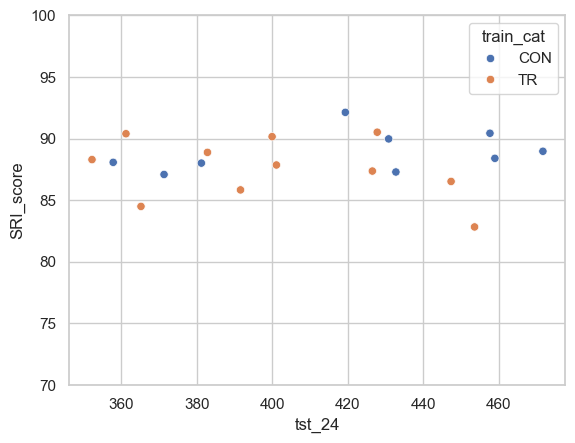

In [80]:
ax1= sns.scatterplot(data=grouped_vis, x='tst_24', y='SRI_score', hue='train_cat')

plt.yticks(np.arange(70, 101, 5))
# plt.xticks(np.arange(360, 601, 60))

plt.show()

In [81]:
visuals_df[['subject', 'day_of_participation','main_sleep_epoch']].sort_values('main_sleep_epoch').head()

subject  day_of_participation  main_sleep_epoch
714  ORE_24                    23            -314.0
288  ORC_27                     2            -273.0
294  ORC_27                     8            -257.0
225  ORC_21                    11            -245.0
170  ORC_15                    28            -238.0

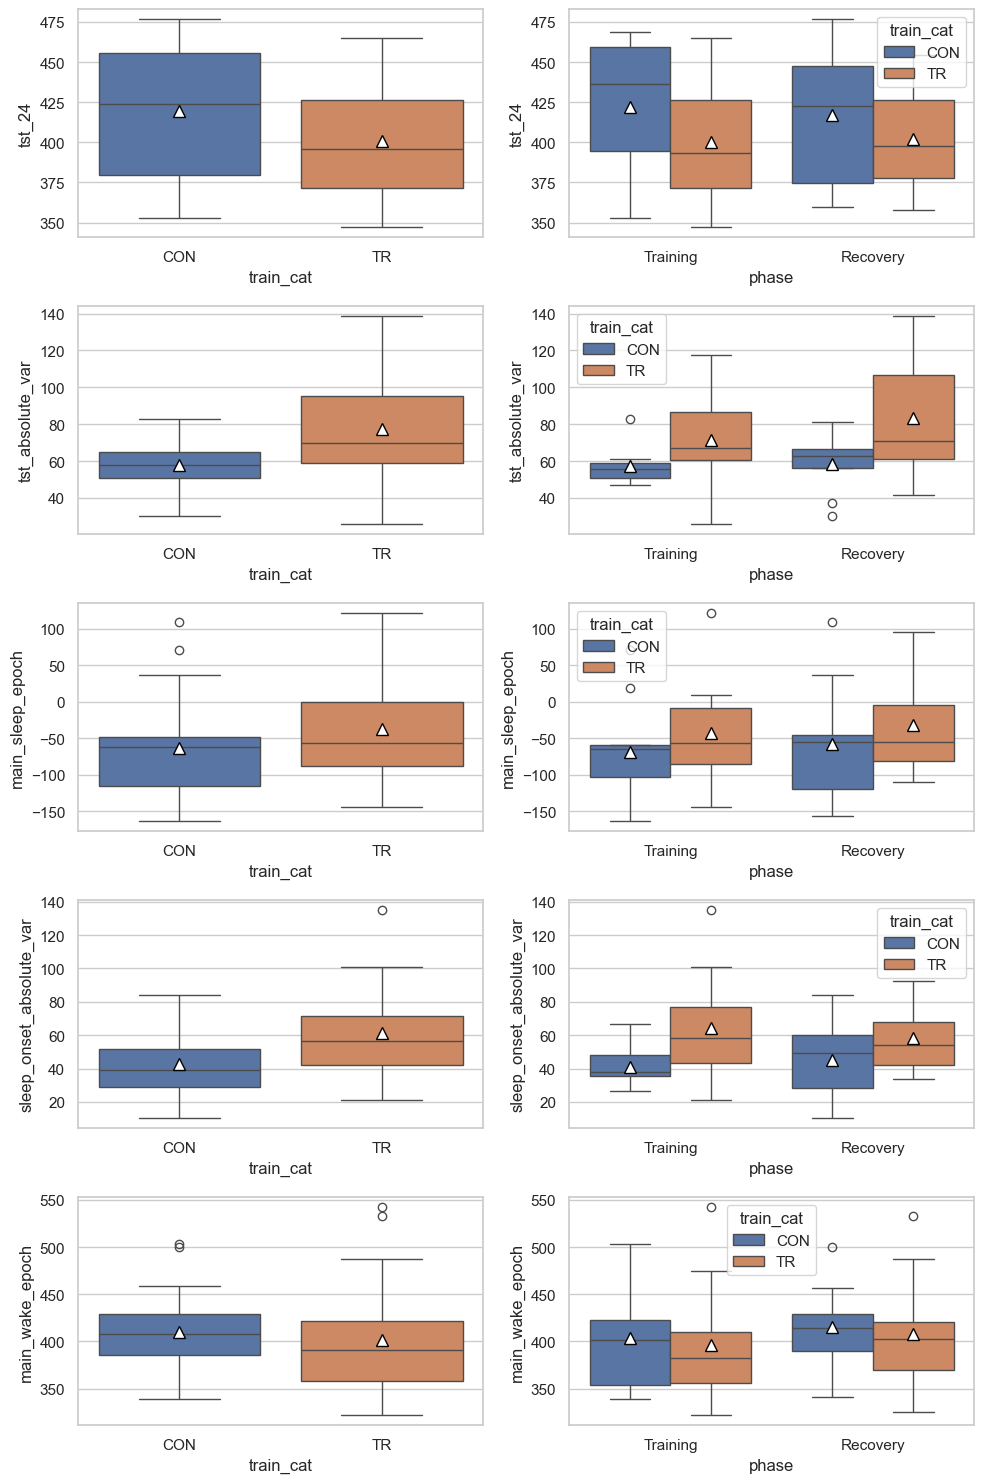

In [82]:
palette=sns.color_palette()

fig, ax= plt.subplots(5,2, figsize=(10,15))

ax1= sns.boxplot(data=tst_grouped, x='train_cat', y='tst_24', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[0,0])

ax2= sns.boxplot(data=tst_grouped, x='phase', y='tst_24', hue='train_cat',showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[0,1])

ax3= sns.boxplot(data=tst_grouped, x='train_cat', y='tst_absolute_var', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[1,0])

ax4= sns.boxplot(data=tst_grouped, x='phase', y='tst_absolute_var', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[1,1])

ax5= sns.boxplot(data=tst_grouped, x='train_cat', y='main_sleep_epoch', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'},ax=ax[2,0])

ax6= sns.boxplot(data=tst_grouped, x='phase', y='main_sleep_epoch', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'},ax=ax[2,1])

ax7= sns.boxplot(data=tst_grouped, x='train_cat', y='sleep_onset_absolute_var', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'},ax=ax[3,0])

ax8= sns.boxplot(data=tst_grouped, x='phase', y='sleep_onset_absolute_var', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'},ax=ax[3,1])

ax9= sns.boxplot(data=tst_grouped, x='train_cat', y='main_wake_epoch', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'},ax=ax[4,0])

ax10= sns.boxplot(data=tst_grouped, x='phase', y='main_wake_epoch', hue='train_cat', showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'},ax=ax[4,1])





### may have to do groupby for box plots to accurately show group differences

plt.tight_layout()
plt.show()

In [83]:
tst_grouped.dtypes

subject                        object
phase                        category
train_cat                    category
tst_24                        float64
SRI_score                     float64
tst_absolute_var              float64
main_sleep_epoch              float64
sleep_onset_absolute_var      float64
main_wake_epoch               float64
sleep_offset_absolute_var     float64
sleepiness_sleep_1            float64
sleepiness_wake_1             float64
fatigue_sleep_1               float64
fatigue_wake_1                float64
sleep_q_1                     float64
dtype: object

In [84]:
tst_grouped

subject     phase train_cat  tst_24  SRI_score  tst_absolute_var  \
0   ORC_02  Training       CON  436.59      89.81             50.62   
1   ORC_02  Recovery       CON  421.71      90.23             68.57   
2   ORC_04  Training       CON  369.18      86.03             51.71   
3   ORC_04  Recovery       CON  374.64      88.75             30.14   
4   ORC_06  Training       CON  415.50      92.21             47.29   
5   ORC_06  Recovery       CON  425.36      92.00             56.14   
6   ORC_12  Training       CON  468.55      88.92             56.29   
7   ORC_12  Recovery       CON  476.57      89.04             62.71   
8   ORC_15  Training       CON  439.14      87.47             55.76   
9   ORC_15  Recovery       CON  422.64      87.01             81.14   
10  ORC_20  Training       CON  394.77      88.61             61.05   
11  ORC_20  Recovery       CON  359.86      87.07             65.50   
12  ORC_21  Training       CON  464.00      88.92             49.48   
13  ORC_21  Recovery       CON  447.64      92.80             37.29   
14  ORC_22  Training       CON  352.59      86.20             82.76   
15  ORC_22  Recovery       CON  366.07      91.01             66.29   
16  ORC_27  Training       CON  459.55      88.34             59.14   
17  ORC_27  Recovery       CON  458.00      88.48             60.29   
18  ORE_01  Training        TR  356.73      91.34             26.05   
19  ORE_01  Recovery        TR  366.42      89.30             56.53   
20  ORE_03  Training        TR  347.45      87.56            117.38   
21  ORE_03  Recovery        TR  357.74      89.14             70.84   
22  ORE_05  Training        TR  429.14      89.42             55.14   
23  ORE_05  Recovery        TR  426.21      91.79             41.63   
24  ORE_09  Training        TR  453.00      82.90            100.10   
25  ORE_09  Recovery        TR  454.21      82.74            138.53   
26  ORE_10  Training        TR  404.18      87.83             81.00   
27  ORE_10  Recovery        TR  397.47      87.88             68.58   
28  ORE_11  Training        TR  465.14      86.52             72.67   
29  ORE_11  Recovery        TR  426.74      86.52             86.32   
30  ORE_18  Training        TR  393.55      86.36             67.19   
31  ORE_18  Recovery        TR  389.26      85.22             51.21   
32  ORE_19  Training        TR  423.68      88.40             66.57   
33  ORE_19  Recovery        TR  429.74      86.16            122.89   
34  ORE_23  Training        TR  372.59      86.70             66.14   
35  ORE_23  Recovery        TR  394.63      91.41             65.26   
36  ORE_24  Training        TR  371.05      84.20             92.71   
37  ORE_24  Recovery        TR  358.42      84.84             96.21   
38  ORE_25  Training        TR  382.50      91.01             41.05   
39  ORE_25  Recovery        TR  420.11      89.17            117.42   

    main_sleep_epoch  sleep_onset_absolute_var  main_wake_epoch  \
0             -65.26                     37.41           401.05   
1             -55.85                     49.50           395.38   
2             -92.14                     37.95           342.90   
3             -54.36                     28.21           389.50   
4             -59.95                     26.35           391.67   
5             -46.00                     30.43           413.93   
6             -59.18                     39.71           458.55   
7             -91.21                     60.00           428.64   
8            -102.80                     48.42           423.05   
9            -138.50                     52.29           384.00   
10             71.26                     35.53           503.00   
11            108.86                     84.00           500.57   
12           -163.00                     28.32           354.14   
13           -156.50                     18.50           341.50   
14             18.68                     48.27           423.00   
15             35.8

In [85]:
heat_map = tst_grouped.corr(method='spearman', numeric_only=True).round(2)
heatmap_labels= list(heat_map.columns)

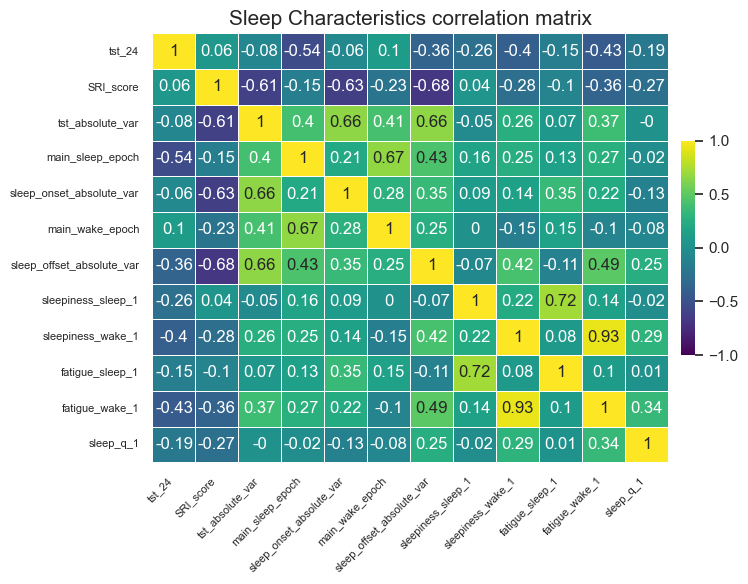

In [86]:
### Heat map with only lower half showing (removes redundancy, increases white space)

heat_map = tst_grouped.corr(method='spearman', numeric_only=True).round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(heat_map, dtype=bool))

# Create the heatmap with the mask
plt.figure(figsize=(8,6))  # Optional: Set figure size
ax1 = sns.heatmap(
    heat_map,
    vmin=-1,
    vmax=1,
    cmap='viridis',
    annot=True,
    # mask=mask,  # Apply the mask
    linewidths=0.5, # Optional: Add lines between cells for clarity
        cbar_kws={
        "shrink": 0.5,  # Reduce size of color bar
        "aspect": 15,   # Adjust thickness of color bar
        "pad": 0.02     # Move color bar closer to heatmap
    })

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=8
)

ax1.set_yticklabels(heatmap_labels,
    rotation=0,
    fontsize=8
)

ax1.set_title('Sleep Characteristics correlation matrix', fontsize=15)

plt.tight_layout()
plt.show()


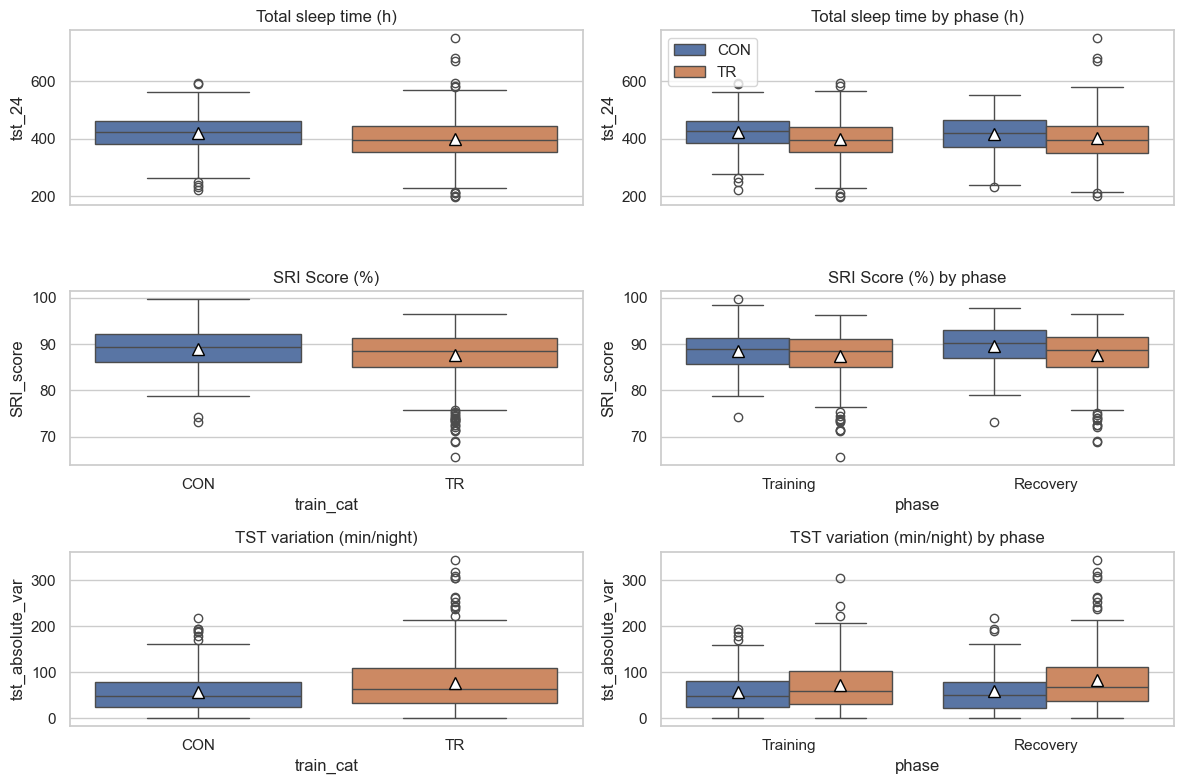

In [87]:
fig, ax= plt.subplots(3,2, figsize=(12,8))

ax1= sns.boxplot(data=visuals_df, x='train_cat', y='tst_24', hue='train_cat',showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[0,0])

ax2= sns.boxplot(data=visuals_df, x='phase', y='tst_24', hue='train_cat',showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[0,1])

ax3= sns.boxplot(data=visuals_df, x='train_cat', y='SRI_score', hue='train_cat',showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[1,0])

ax4= sns.boxplot(data=visuals_df, x='phase', y='SRI_score', hue='train_cat',showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[1,1])

ax5= sns.boxplot(data=visuals_df, x='train_cat', y='tst_absolute_var', hue='train_cat',showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[2,0])

ax6= sns.boxplot(data=visuals_df, x='phase', y='tst_absolute_var', hue='train_cat',showmeans=True,
                 meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'}, ax=ax[2,1])


ax1.set_xticks([])
ax2.set_xticks([])


ax1.set_xlabel(None)
ax2.set_xlabel(None)

#subplot titles
ax1.set_title('Total sleep time (h)')
ax2.set_title('Total sleep time by phase (h)')
ax3.set_title('SRI Score (%)')
ax4.set_title('SRI Score (%) by phase')
ax5.set_title('TST variation (min/night)')
ax6.set_title('TST variation (min/night) by phase')


# ax2.set_yticks(np.arange(0, 1060, 120))
ax2.legend(loc='upper left')
ax4.get_legend().remove()
ax6.get_legend().remove()


plt.tight_layout()
plt.show()

In [88]:
palette= sns.color_palette()

/var/folders/7d/370678cs0jzdr2slyl3k7m2w0000gn/T/ipykernel_81367/1772303179.py:25: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


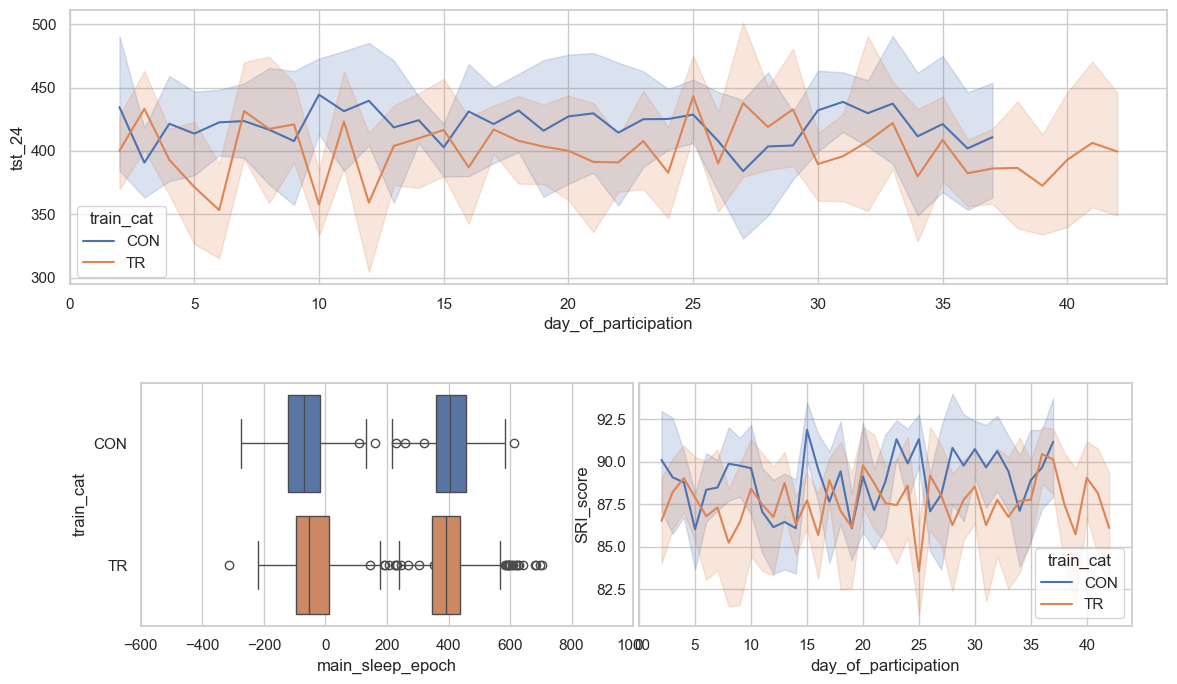

In [89]:
###This works for TST across time + Sleep duration box plots, above trying to limit lines to 1 errorbar each
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# Larger subplot spanning multiple columns and rows
top_plot = plt.subplot2grid(shape=(20, 35), loc=(0, 0), colspan=31, rowspan=9)

ax1= sns.lineplot(data=visuals_df, x='day_of_participation', y='tst_24', hue='train_cat', ax=top_plot)

# First smaller subplot below the larger subplot
left_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 2), colspan=14, rowspan=9)
# Second smaller subplot below the larger subplot, shifted to the right
right_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 16), colspan=14, rowspan=9)

ax2=sns.boxplot(data= visuals_df, x='main_sleep_epoch', y='train_cat', hue='train_cat', ax=left_plot)
ax3=sns.boxplot(data= visuals_df, x='main_wake_epoch', y='train_cat', hue='train_cat', ax=left_plot)

ax4= sns.lineplot(data=visuals_df, x='day_of_participation', y='SRI_score', hue='train_cat')
######### Customize plots below


ax3.set_xticks(np.arange(-600, 1200, 200))

plt.tight_layout()
plt.show()


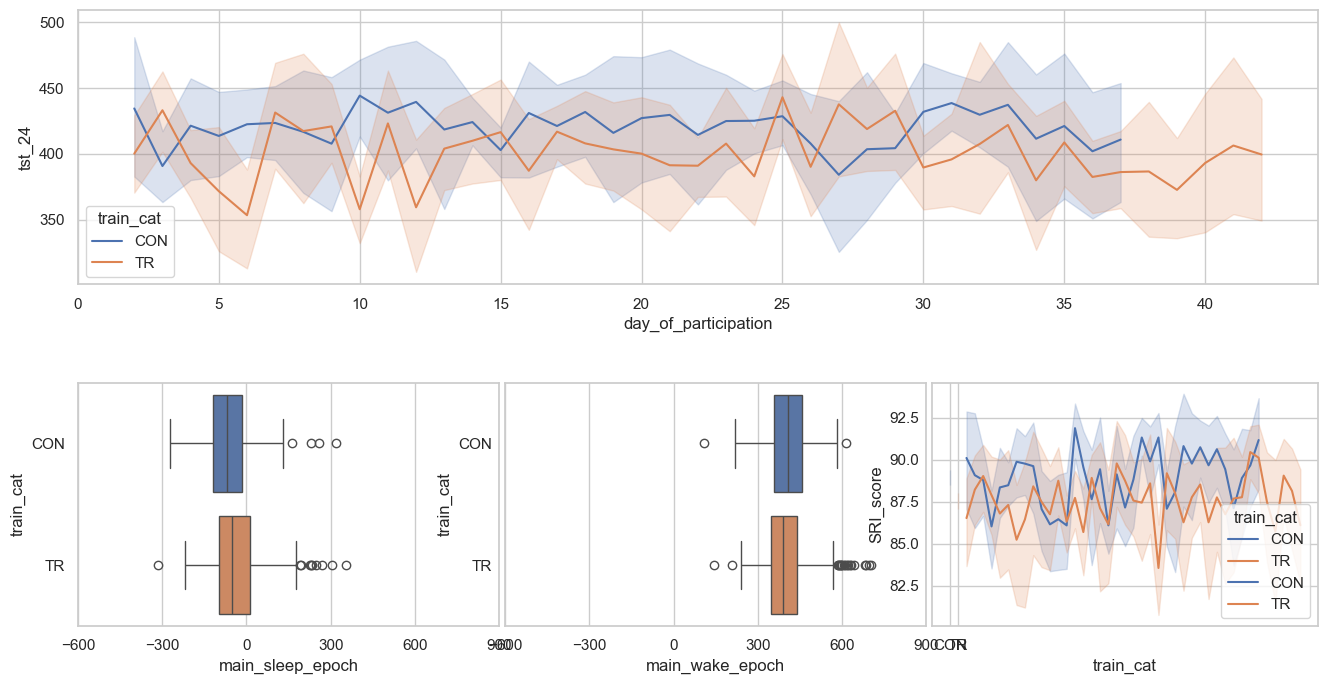

In [90]:
###This works for TST across time + Sleep duration box plots, above trying to limit lines to 1 errorbar each
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)

# Larger subplot spanning multiple columns and rows
top_plot = plt.subplot2grid(shape=(20, 35), loc=(0, 0), colspan=35, rowspan=9)

ax1= sns.lineplot(data=visuals_df, x='day_of_participation', y='tst_24', hue='train_cat', ax=top_plot)

# First smaller subplot below the larger subplot
left_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 0), colspan=12, rowspan=9)

# Second smaller subplot below the larger subplot, shifted to the right
middle_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 12), colspan=12, rowspan=9)


# third smaller subplot below the larger subplot, shifted to the right
right_plot = plt.subplot2grid(shape=(20, 35), loc=(12, 24), colspan=12, rowspan=9)



ax2=sns.boxplot(data= visuals_df, x='main_sleep_epoch', y='train_cat', hue='train_cat', ax=left_plot)

ax3=sns.boxplot(data= visuals_df, x='main_wake_epoch', y='train_cat', hue='train_cat', ax=middle_plot)

ax4= sns.lineplot(data=visuals_df, x='train_cat', y='SRI_score', hue='train_cat', ax=right_plot)



ax4= sns.lineplot(data=visuals_df, x='day_of_participation', y='SRI_score', hue='train_cat')
######### Customize plots below


ax2.set_xticks(np.arange(-600, 1200, 300))
ax3.set_xticks(np.arange(-600, 1200, 300))

# plt.tight_layout()
plt.show()


In [91]:
heatmap_labels= ['TST', 'SRI_score','TST variation', 'sleep_onset', 
                 'sleep_onset_AV', 'sleep offset', 'sleep offset_AV','Bedtime sleepiness', 'Waking sleepiness', 
                 'Bedtime fatigue', 'Waking fatigue', 'Sleep quality'
                ]

<Axes: >

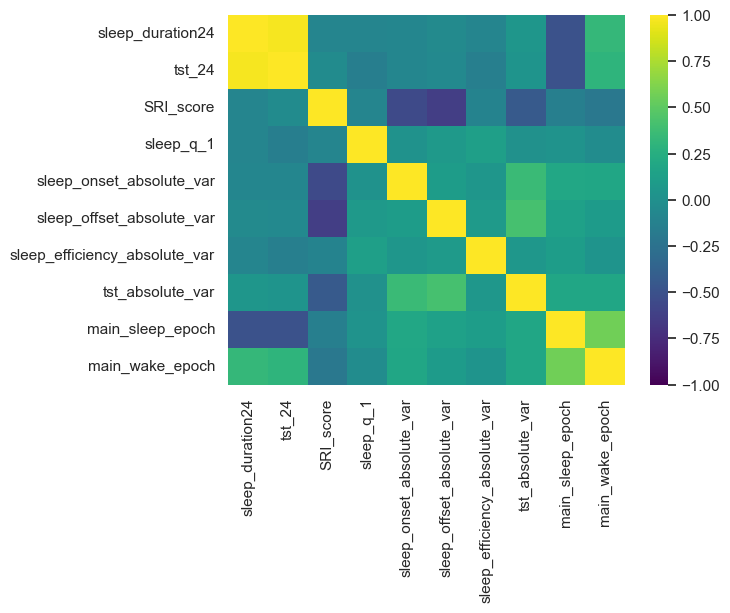

In [92]:
heat_map= visuals_df[['sleep_duration24','tst_24', 'SRI_score', 'sleep_q_1', 'sleep_onset_absolute_var',
           'sleep_offset_absolute_var', 'sleep_efficiency_absolute_var', 'tst_absolute_var', 'main_sleep_epoch', 'main_wake_epoch' ]].corr().round(3)

sns.heatmap(heat_map, vmin=-1, vmax=1, cmap='viridis')

In [93]:
visuals_df['over_7']= visuals_df['tst_24'].apply(lambda x: 'Yes' if x>420 else 'No')

visuals_df['over_7'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: over_7, dtype: object

In [94]:
visuals_df['sleep_debt_yes']= visuals_df['tst_24'].apply(lambda x: 'Yes' if x>420 else 'No')

visuals_df['sleep_debt_yes'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: sleep_debt_yes, dtype: object

In [95]:
visuals_df[['subject','over_7', 'tst_24']].head()

subject over_7  tst_24
0  ORC_02    Yes     539
1  ORC_02    Yes     456
2  ORC_02    Yes     462
3  ORC_02    Yes     431
4  ORC_02     No     381

In [96]:
OR_vis= visuals_df[visuals_df['ot_status']=='OR'].copy()
CON_vis= visuals_df[visuals_df['ot_status']=='CON'].copy()
AD_vis= visuals_df[visuals_df['ot_status']=='AD'].copy()

TR_vis= visuals_df[visuals_df['train_cat']=='TR'].copy()

In [97]:
palette = sns.color_palette()
color1 = palette[0]
color2 = palette[1]
color3 = palette[2]

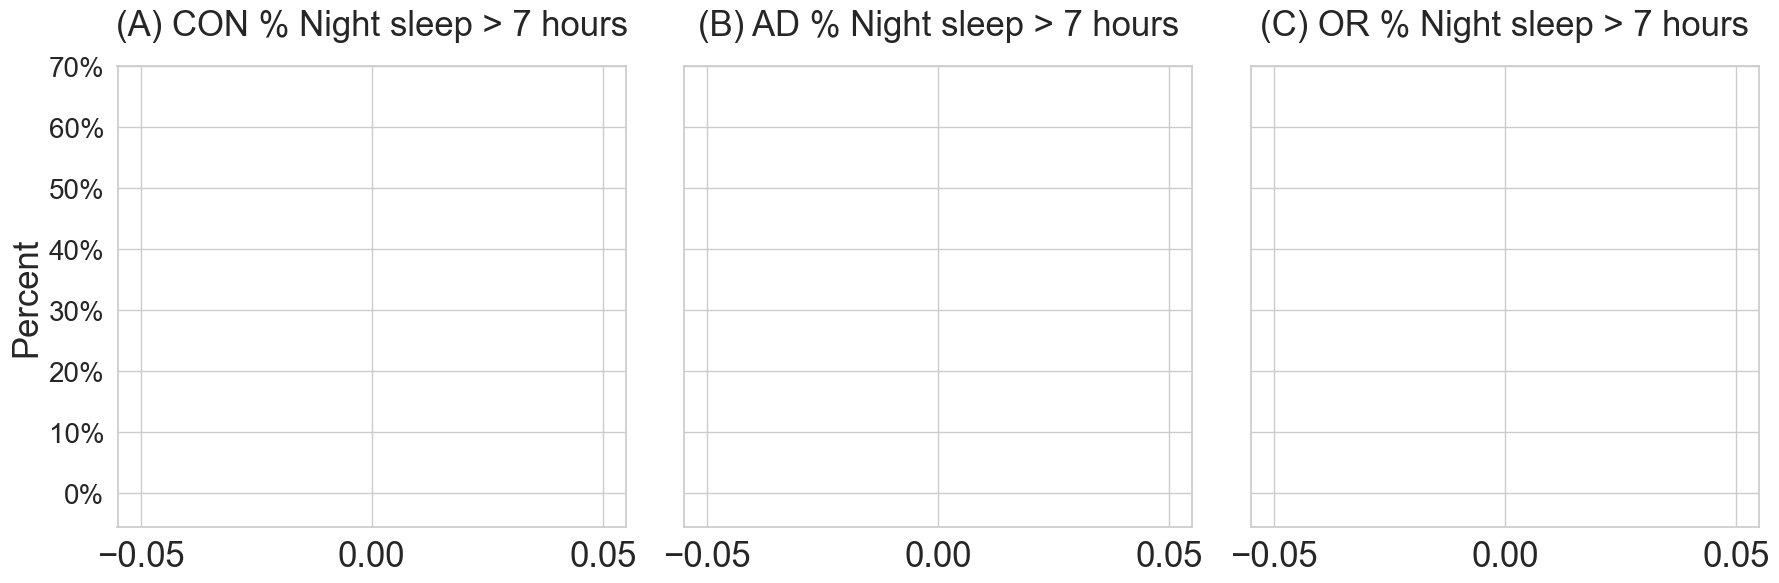

In [98]:
palette = sns.color_palette()
color1 = palette[0]
color2 = palette[1]
color3 = palette[2]

fig, ax= plt.subplots(1,3, sharey=True, sharex=True, figsize=(18,6))


ax1=sns.histplot(data=CON_vis, x='over_7', 
           stat='proportion', ax=ax[0], color=palette[0])

ax2=sns.histplot(data=AD_vis, x='over_7', 
           stat='proportion', ax=ax[1],color=palette[1])

ax3=sns.histplot(data=OR_vis, x='over_7', 
           stat='proportion', ax=ax[2],color=palette[2])


for axis in [ax1, ax2, ax3]:
    axis.tick_params(axis='both', labelsize=20)
    axis.tick_params(axis='x', labelsize=25)
    axis.set_xlabel('')

ax1.set_title('(A) CON % Night sleep > 7 hours', fontsize=25, y=1.05)
ax2.set_title('(B) AD % Night sleep > 7 hours', fontsize=25, y=1.05)
ax3.set_title('(C) OR % Night sleep > 7 hours', fontsize=25, y=1.05)


ax1.set_ylabel('Percent', fontsize=25)

y_vals=list(np.arange(0,71,10))
per_string= [f"{val}%" for val in y_vals]



ax1.set_yticks(np.arange(0,0.71, 0.1), labels=per_string)

    # Annotate each bar with its percentage value   ### can also adjust settings for annotate_vars function
def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Avoid annotating zero-height bars
            ax.annotate(f'{height:.1%}', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=20, color='black', 
                        xytext=(0, 10), textcoords='offset points')
  # Annotate the bars in each subplot
annotate_bars(ax1)
annotate_bars(ax2)
annotate_bars(ax3)          


plt.tight_layout()

# plt.savefig('percent over under 7-h sleep 5.23.24.png')
plt.show()

In [99]:
for val in visuals_df['tst_24']:
    if val > 420:
        visuals_df['over_7']=='yes'
    else:
        visuals_df['over_7']=='no'
        
visuals_df['over_7'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: over_7, dtype: object

In [100]:
three_order

['Control', 'Adapted', 'Overreached']

In [101]:
visuals_df['ot_status'].unique()

## the names of the ot_status values aren't aligned with the three_order values with name abbreviations

['Control', 'Adapted', 'Overreached']
Categories (3, object): ['Control' < 'Adapted' < 'Overreached']

<Axes: xlabel='night_before', ylabel='tst_24'>

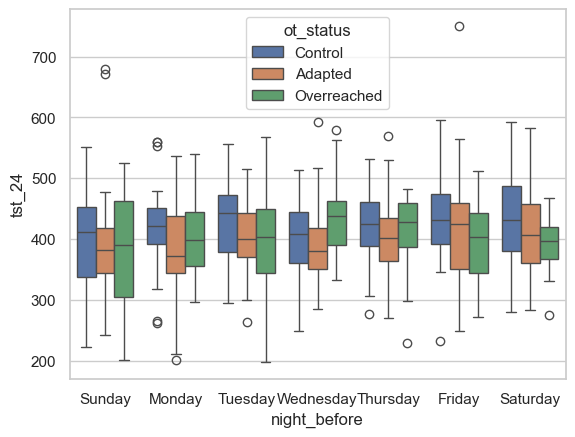

In [102]:
sns.boxplot(data=visuals_df, x='night_before', y='tst_24', hue='ot_status')

In [103]:
three_order = ['CON', 'AD', 'OR']

In [104]:
visuals_df.replace({'ot_status':{'Control':'CON', 'Adapted':'AD', 'Overreached':'OR'}}, inplace=True)

visuals_df['ot_status'].unique()

/var/folders/7d/370678cs0jzdr2slyl3k7m2w0000gn/T/ipykernel_81367/459698311.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  visuals_df.replace({'ot_status':{'Control':'CON', 'Adapted':'AD', 'Overreached':'OR'}}, inplace=True)


['CON', 'AD', 'OR']
Categories (3, object): ['CON' < 'AD' < 'OR']

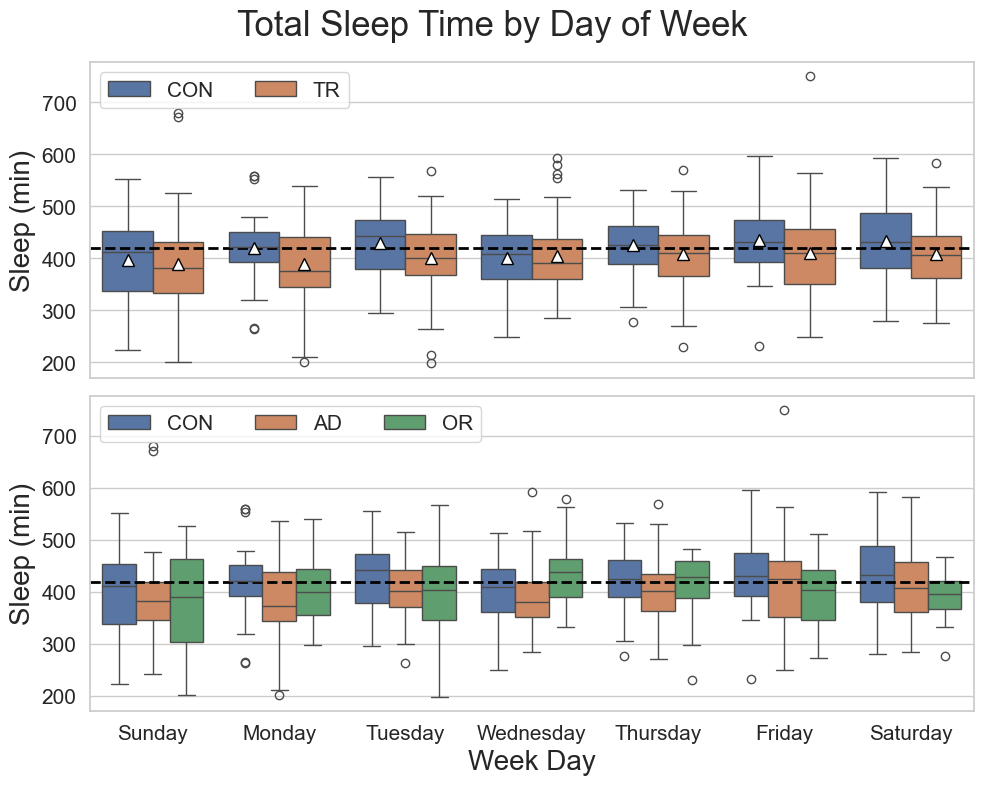

In [105]:
fig, ax= plt.subplots(2,1,sharex=True, figsize=(10,8))

sns.boxplot(data=visuals_df, x='night_before', y='tst_24', hue='train_cat',
            hue_order=two_order, ax=ax[0], showmeans=True, meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'})

sns.boxplot(data=visuals_df, x='night_before', y='tst_24', hue='ot_status', hue_order=three_order, ax=ax[1])
# ,showmeans=True, meanprops={'markerfacecolor':'white', 'markersize':9, 'markeredgecolor':'black'})

ax[0].legend(loc='upper left', ncols=3, fontsize=15)
ax[1].legend(loc='upper left', ncols=3, fontsize=15)

ax[0].axhline(y=420, xmin=0, xmax=1, lw='2', ls='--', color='black')
ax[1].axhline(y=420, xmin=0, xmax=1, lw='2', ls='--', color='black')

ax[0].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)

ax[1].set_xlabel('Week Day', fontsize=20)
ax[0].set_ylabel('Sleep (min)', fontsize=20)
ax[1].set_ylabel('Sleep (min)', fontsize=20)

plt.suptitle('Total Sleep Time by Day of Week', fontsize=25)

plt.tight_layout()
plt.show()

In [106]:
pg.mixed_anova(data=visuals_df, dv='tst_24', within='night_before', subject='subject',
               between='train_cat', correction='auto' ,effsize='np2')

Source            SS  DF1  DF2            MS         F     p-unc  \
0     train_cat  11480.014141    1   18  11480.014141  1.145357  0.298665   
1  night_before  13909.396206    6  108   2318.232701  2.627258  0.020398   
2   Interaction   4111.723842    6  108    685.287307  0.776638  0.589979   

   p-GG-corr       np2      eps sphericity   W-spher   p-spher  
0        NaN  0.059824      NaN        NaN       NaN       NaN  
1   0.043549  0.127368  0.61809      False  0.057522  0.000517  
2        NaN  0.041362      NaN        NaN       NaN       NaN

In [107]:
sleep_DoW_two_grp=pg.pairwise_tests(data=visuals_df, dv='tst_24', between='train_cat', within='night_before',
                  subject='subject', alpha=0.05, padjust='holm', effsize='eta-square')

sleep_DoW_two_grp[sleep_DoW_two_grp['p-unc']<=0.05]

Contrast night_before       A         B Paired Parametric         T  \
1  night_before            -  Sunday   Tuesday   True       True -2.691457   
3  night_before            -  Sunday  Thursday   True       True -3.415422   
4  night_before            -  Sunday    Friday   True       True -3.030016   
5  night_before            -  Sunday  Saturday   True       True -2.710910   
9  night_before            -  Monday    Friday   True       True -2.224318   

    dof alternative     p-unc    p-corr p-adjust    BF10  eta-square  
1  19.0   two-sided  0.014453  0.263322     holm   3.775    0.039547  
3  19.0   two-sided  0.002901  0.060930     holm  14.581    0.063773  
4  19.0   two-sided  0.006888  0.137758     holm     7.0    0.091038  
5  19.0   two-sided  0.013859  0.263322     holm   3.908    0.077044  
9  19.0   two-sided  0.038445  0.653567     holm   1.709    0.040544

In [108]:
pg.mixed_anova(data=visuals_df, dv='tst_24', within='visit_day_of_week', subject='subject',
               between='ot_status', correction='auto' ,effsize='np2').round(3)

Source         SS  DF1  DF2        MS      F  p-unc  p-GG-corr  \
0          ot_status  11497.076    2   17  5748.538  0.542  0.591        NaN   
1  visit_day_of_week  13909.396    6  102  2318.233  2.753  0.016      0.044   
2        Interaction  13532.203   12  102  1127.684  1.339  0.208        NaN   

     np2    eps sphericity  W-spher  p-spher  
0  0.060    NaN        NaN      NaN      NaN  
1  0.139  0.618      False    0.058    0.001  
2  0.136    NaN        NaN      NaN      NaN

In [109]:
visuals_df['subject']= visuals_df['subject'].astype('category')

In [110]:
# subject_counts = visuals_df['subject'].value_counts()
# print(subject_counts)


In [111]:
# visuals_df.info()

In [112]:
TR_df= visuals_df[visuals_df['train_cat']=='TR'].copy()

TR_df.head()

Unnamed: 0 subject visit  day_of_participation train_cat ot_status  \
324         325  ORE_01     2                     2        TR        AD   
325         326  ORE_01     3                     3        TR        AD   
326         327  ORE_01     4                     4        TR        AD   
327         328  ORE_01     5                     5        TR        AD   
328         329  ORE_01     6                     6        TR        AD   

    visit_date  sleep_duration24  tst_24  sleep1_date_time24  ...  \
324 2021-06-08               401     347 2021-06-07 22:12:00  ...   
325 2021-06-09               411     361 2021-06-08 22:23:00  ...   
326 2021-06-10               388     347 2021-06-09 22:50:00  ...   
327 2021-06-11               425     344 2021-06-10 22:54:00  ...   
328 2021-06-12               403     352 2021-06-11 22:55:00  ...   

    sleep_duration_24_h  wurss illness sleep_debt cum_sleep_debt  \
324            6.683333    NaN     NaN        -73            -73   
325            6.850000    NaN     NaN        -59           -132   
326            6.466667    0.0      no        -73           -205   
327            7.083333    1.0      no        -76           -281   
328            6.716667    0.0      no        -68           -349   

    cum_sleep_debt_h  group training_status over_7  sleep_debt_yes  
324        -1.216667     TR         Adapted     No              No  
325        -2.200000     TR         Adapted     No              No  
326        -3.416667     TR         Adapted     No              No  
327        -4.683333     TR         Adapted     No              No  
328        -5.816667     TR         Adapted     No              No  

[5 rows x 79 columns]

#Identify and isolate which TR subjects had negative sleep debt accumulation

In [113]:
exp_df= visuals_df[visuals_df['train_cat']=='TR'].copy()

In [114]:
# testing_days=[0,7,14, 21, 26, 33, 40] #Lines up x-axis with plots from
testing_days=[2,9,16, 23, 28, 35, 42] #Actual days_of_participation in excel for performance visits
testing_labels= ['Baseline', 'Wk 2', 'Wk 3', 'Rec 2', 'Rec 7', 'Rec 14', 'Rec 21']

con_testing_days=[2,9,16, 23, 30, 37, 42] #Actual days_of_participation in excel for performance visits
con_testing_labels= ['Baseline', 'Wk 2', 'Wk 3', 'Wk 4', 'Wk 5 ', 'Wk 6', " "]

In [115]:
visuals_df['group']=visuals_df['train_cat'].copy()
visuals_df['training_status']= visuals_df['ot_status'].copy()

In [116]:
#make dfs for each training group to individually call as needed

con_df= visuals_df[visuals_df['ot_status']=='Con'].copy().reset_index(drop=True)
TR_df= visuals_df[visuals_df['ot_status']=='TR'].copy().reset_index(drop=True)

AD_df=visuals_df[visuals_df['ot_status']=='AD'].copy().reset_index(drop=True)
OR_df=visuals_df[visuals_df['ot_status']=='OR'].copy().reset_index(drop=True)


OR_df.head()

Unnamed: 0 subject visit  day_of_participation train_cat ot_status  \
0         366  ORE_03     2                     2        TR        OR   
1         367  ORE_03     3                     3        TR        OR   
2         368  ORE_03     4                     4        TR        OR   
3         369  ORE_03     5                     5        TR        OR   
4         370  ORE_03     6                     6        TR        OR   

  visit_date  sleep_duration24  tst_24  sleep1_date_time24  ...  \
0 2021-09-10               428     387 2021-09-09 23:03:00  ...   
1 2021-09-11               377     352 2021-09-11 00:14:00  ...   
2 2021-09-12               449     409 2021-09-12 00:28:00  ...   
3 2021-09-13               258     228 2021-09-13 01:49:00  ...   
4 2021-09-14               327     297 2021-09-14 00:52:00  ...   

  sleep_duration_24_h  wurss illness sleep_debt cum_sleep_debt  \
0            7.133333    9.0      no        -33            -33   
1            6.283333    6.0      no        -68           -101   
2            7.483333   17.0      no        -11           -112   
3            4.300000   11.0      no       -192           -304   
4            5.450000    4.0      no       -123           -427   

  cum_sleep_debt_h  group training_status over_7  sleep_debt_yes  
0        -0.550000     TR              OR     No              No  
1        -1.683333     TR              OR     No              No  
2        -1.866667     TR              OR     No              No  
3        -5.066667     TR              OR     No              No  
4        -7.116667     TR              OR     No              No  

[5 rows x 79 columns]

In [117]:
#Frequency distribution of sleeping over vs. under hours

In [118]:
visuals_df['7H']= visuals_df["tst_24"].apply(lambda x: 'No' if x < 420 else 'Yes')

visuals_df.head()

Unnamed: 0 subject visit  day_of_participation train_cat ot_status  \
0           0  ORC_02     2                     2       CON       CON   
1           1  ORC_02     3                     3       CON       CON   
2           2  ORC_02     4                     4       CON       CON   
3           3  ORC_02     5                     5       CON       CON   
4           4  ORC_02     6                     6       CON       CON   

  visit_date  sleep_duration24  tst_24  sleep1_date_time24  ... wurss  \
0 2021-06-23               598     539                 NaT  ...   4.0   
1 2021-06-24               485     456                 NaT  ...   NaN   
2 2021-06-25               494     462 2021-06-24 14:00:00  ...   NaN   
3 2021-06-26               468     431 2021-06-25 12:00:00  ...   NaN   
4 2021-06-27               413     381 2021-06-26 23:04:00  ...   NaN   

   illness sleep_debt cum_sleep_debt cum_sleep_debt_h group  training_status  \
0       no        119            119         1.983333   CON              CON   
1      NaN         36            155         2.583333   CON              CON   
2      NaN         42            197         3.283333   CON              CON   
3      NaN         11            208         3.466667   CON              CON   
4      NaN        -39            169         2.816667   CON              CON   

  over_7 sleep_debt_yes   7H  
0    Yes            Yes  Yes  
1    Yes            Yes  Yes  
2    Yes            Yes  Yes  
3    Yes            Yes  Yes  
4     No             No   No  

[5 rows x 80 columns]

In [119]:
visuals_df.groupby(['group', '7H'], observed=False).describe()

Unnamed: 0                                                   \
               count        mean    min     25%    50%     75%    max   
group 7H                                                                
CON   No       154.0  156.805195    4.0   66.25  170.0  252.25  314.0   
      Yes      170.0  166.600000    0.0  105.25  156.5  240.75  324.0   
TR    No       281.0  549.213523  325.0  405.00  567.0  675.00  773.0   
      Yes      170.0  551.300000  350.0  462.25  540.5  634.50  775.0   

                      day_of_participation             ... cum_sleep_debt  \
                  std                count       mean  ...            max   
group 7H                                               ...                  
CON   No    93.418174                154.0  19.474026  ...         1445.0   
      Yes   94.754394                170.0  19.523529  ...         1860.0   
TR    No   141.159348                281.0  22.088968  ...         1428.0   
      Yes  110.531789                170.0  21.852941  ...         1469.0   

                      cum_sleep_debt_h                                  \
                  std            count      mean        min        25%   
group 7H                                                                 
CON   No   766.447487            154.0 -7.090584 -37.300000 -17.445833   
      Yes  603.986785            170.0  6.951765 -29.983333   0.783333   
TR    No   826.127788            281.0 -9.970107 -46.316667 -18.833333   
      Yes  775.650017            170.0 -0.924706 -37.450000  -8.800000   

                                                      
                50%        75%        max        std  
group 7H                                              
CON   No  -4.733333   1.066667  24.083333  12.774125  
      Yes  6.716667  13.216667  31.000000  10.066446  
TR    No  -9.600000  -0.966667  23.800000  13.768796  
      Yes  1.308333   5.745833  24.483333  12.927500  

[4 rows x 536 columns]

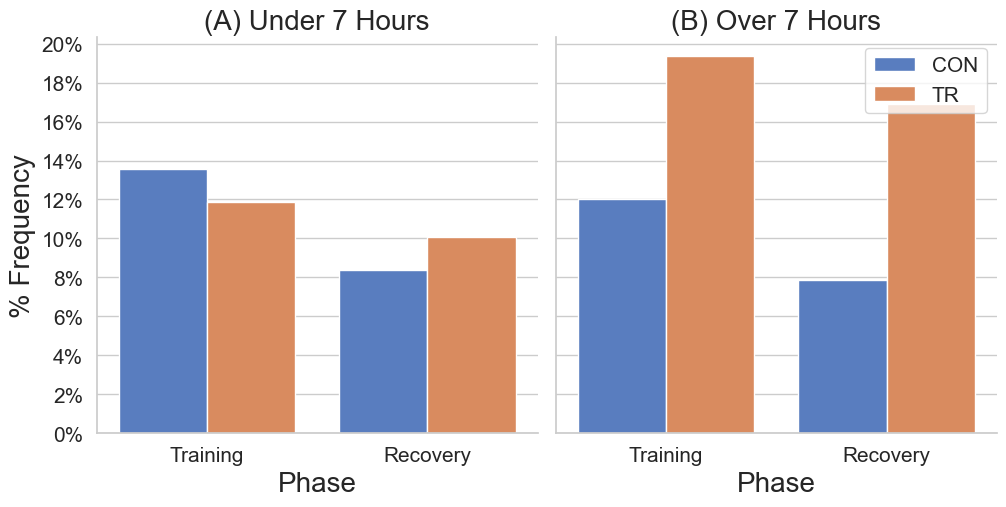

In [120]:
sns.set_palette('muted')
sns.set_style('whitegrid')

ax = sns.catplot(data=visuals_df, kind='count', x='phase', hue='group', hue_order=two_order, 
                 col='7H', stat='percent', legend=None)

ax.set_xticklabels(fontsize=15)
ax.tick_params(axis='both', labelsize=15)


y_ticks_values = np.arange(0, 21, 2)
y_ticks_labels = [f"{value}%" for value in y_ticks_values]

plt.yticks(ticks=np.arange(0,21, 2), labels=y_ticks_labels)

subplot_titles=['(A) Under 7 Hours', '(B) Over 7 Hours']

for i, title in enumerate(subplot_titles):
    ax.axes[0][i].set_title(title, fontsize=20)
    ax.axes[0][i].set_xlabel('Phase', fontsize=20)
    ax.axes[0][i].set_ylabel('% Frequency', fontsize=20)

plt.legend(labels=two_order, loc='upper right', fontsize=15)

plt.show()


In [121]:
#Create confidence interval for Con WURSS to add as bar
from scipy.stats import t
# Number of samples
con_n = 9

# Degrees of freedom
con_dof = con_n - 1
# Confidence level (95% in this case)
confidence_level = 0.95

# Calculate the margin of error
con_WURSS_95CI = t.ppf((1 + confidence_level) / 2, con_dof) * (5.395518/ (con_n**0.5)) #Con WURSS STD

con_WURSS_95CI_upper= 2.576923+ con_WURSS_95CI

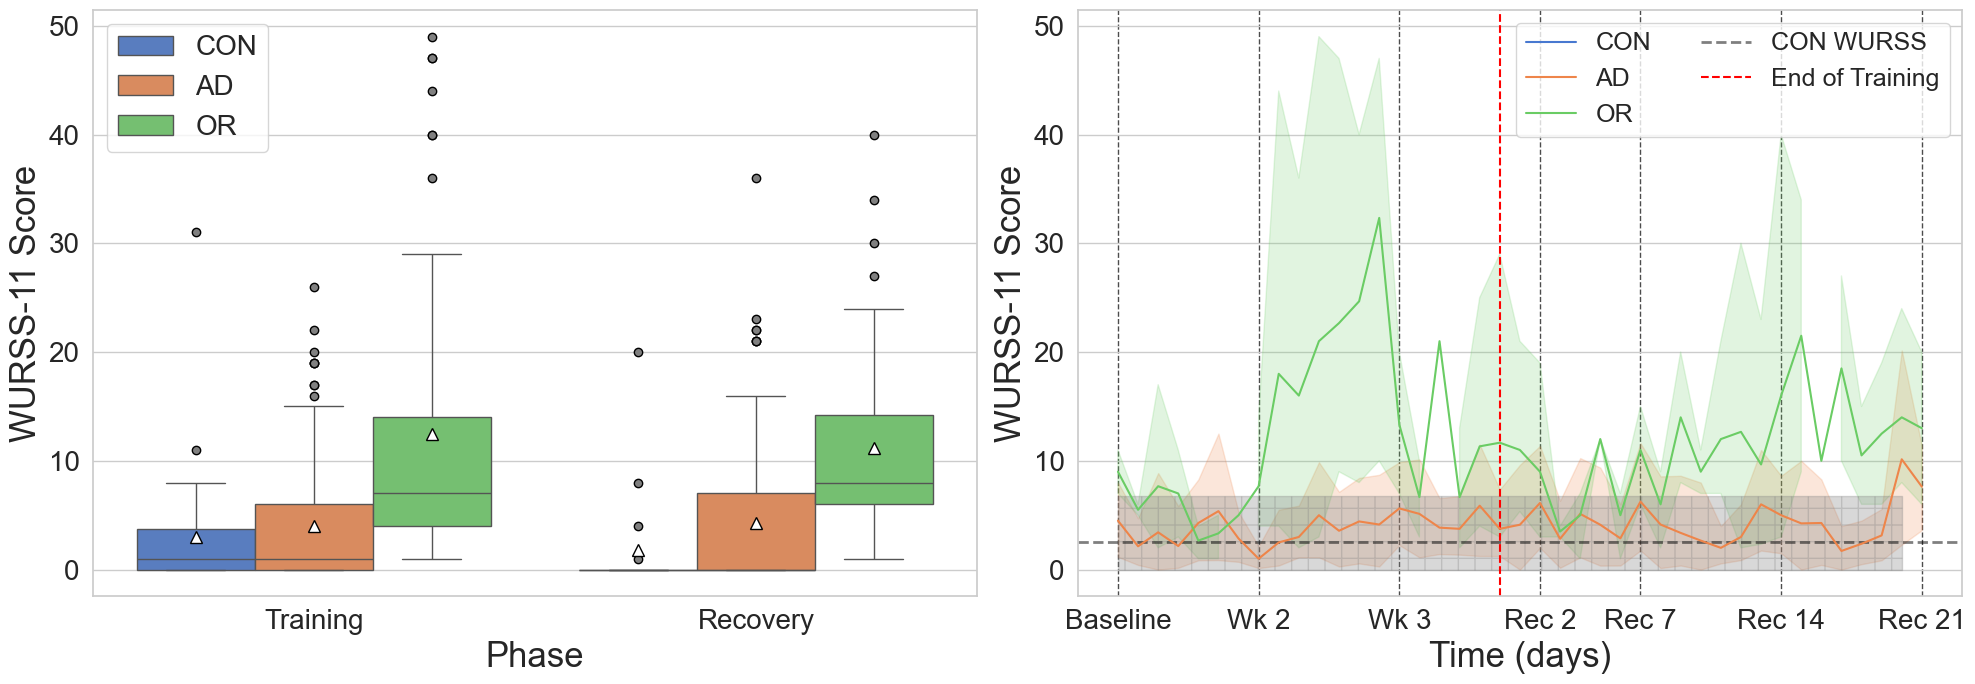

In [122]:
#Create confidence interval for Con WURSS to add as bar
from scipy.stats import t
# Number of samples
con_n = 9

# Degrees of freedom
con_dof = con_n - 1
# Confidence level (95% in this case)
confidence_level = 0.95

# Calculate the margin of error
con_WURSS_95CI = t.ppf((1 + confidence_level) / 2, con_dof) * (5.395518/ (con_n**0.5)) #Con WURSS STD

con_WURSS_95CI_upper= 2.576923+ con_WURSS_95CI

######## Separate cell ################################################


fig, ax= plt.subplots(1,2, figsize=(20,7))

sns.boxplot(data=visuals_df, x='phase', y='wurss',
                 hue='training_status', hue_order=three_order,showmeans=True,
                 meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":8},
                 flierprops={"marker":"o", "markerfacecolor":"grey", "markeredgecolor":"black"}, ax=ax[0])

sns.lineplot(x='day_of_participation', y='wurss', hue='ot_status',
                 errorbar=('ci', 95), data=exp_df,ax=ax[1],zorder=10)


ax[1].set_xticks(testing_days, testing_labels)

ax[0].set_xlabel('Phase', fontsize=25)
ax[0].set_ylabel('WURSS-11 Score', fontsize=25)

ax[1].set_xlabel('Time (days)', fontsize=25)
ax[1].set_ylabel('WURSS-11 Score', fontsize=25)

ax[1].axhline(y=2.58, color='black', ls='--', lw=2, label='CON WURSS', alpha=0.5)
ax[1].fill_between(x=range(2,42), y1=con_WURSS_95CI_upper, y2=0, color='grey', alpha=0.3, hatch='+')


ax[1].axvline(x=21, ymin=0, ymax=1, ls='--', color='red', label='End of Training')
ax[1].grid(axis='x', ls='--', color='black', alpha=0.7)

ax[0].legend(loc='upper left', fontsize=20)
ax[1].legend(loc='upper right', fontsize=18, ncol=2)

ax[0].tick_params(axis='both', labelsize=20)
ax[1].tick_params(axis='both', labelsize=20)



plt.tight_layout()
plt.show()

In [123]:
visuals_df_grouped= visuals_df.groupby(['subject', 'phase', 'train_cat', 'ot_status'], observed=False, as_index=False)['wurss'].mean()

In [124]:
visuals_df_grouped.groupby(['ot_status', 'phase'], observed=False)['wurss'].agg(['mean', 'std']).round(1)

mean  std
ot_status phase              
CON       Training   2.9  3.4
          Recovery   2.0  3.4
AD        Training   4.0  4.9
          Recovery   4.5  4.7
OR        Training  12.7  6.8
          Recovery  10.7  7.1

In [125]:
visuals_df_BL= visuals_df[visuals_df['day_of_participation']==2].copy()

visuals_df_BL_grouped= visuals_df_BL.groupby(['subject','ot_status'], observed=False, as_index=False)['wurss'].mean()
visuals_df_BL_grouped

visuals_df_BL_grouped.groupby(['ot_status'], observed=False)['wurss'].agg(['mean', 'std']).round(2)

mean   std
ot_status            
CON         3.0  3.39
AD          4.5  4.68
OR          9.0  2.00

In [126]:
pg.kruskal(data= visuals_df_BL_grouped, dv='wurss', between='ot_status').round(3)

Source  ddof1     H  p-unc
Kruskal  ot_status      2  3.78  0.151

In [127]:
pg.kruskal(data= visuals_df_grouped, dv='wurss', between='ot_status').round(3)

Source  ddof1       H  p-unc
Kruskal  ot_status      2  11.728  0.003